In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing the Dataset 
df=pd.read_excel("/Users/yareshvijayasundaram/Desktop/Updated CV/Customer Churn Data.xlsx",sheet_name = 'Data for DSBA')

In [3]:
df.head()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      20000      1      4        3.0              6.0   Debit Card  Female   
1      20001      1      0        1.0              8.0          UPI    Male   
2      20002      1      0        1.0             30.0   Debit Card    Male   
3      20003      1      0        3.0             15.0   Debit Card    Male   
4      20004      1      0        1.0             12.0  Credit Card    Male   

   Service_Score Account_user_count account_segment  CC_Agent_Score  \
0            3.0                  3           Super             2.0   
1            3.0                  4    Regular Plus             3.0   
2            2.0                  4    Regular Plus             3.0   
3            2.0                  4           Super             5.0   
4            2.0                  3    Regular Plus             5.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9          1.0             11   
1         Single             7          1.0             15   
2         Single             6          1.0             14   
3         Single             8          0.0             23   
4         Single             3          0.0             11   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5   159.93       Mobile  
1                       0                    0    120.9       Mobile  
2                       0                    3      NaN       Mobile  
3                       0                    3   134.07       Mobile  
4                       1                    3    129.6       Mobile

In [4]:
df.tail()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  \
11255      31255      0     10        1.0             34.0  Credit Card   
11256      31256      0     13        1.0             19.0  Credit Card   
11257      31257      0      1        1.0             14.0   Debit Card   
11258      31258      0     23        3.0             11.0  Credit Card   
11259      31259      0      8        1.0             22.0  Credit Card   

      Gender  Service_Score Account_user_count account_segment  \
11255   Male            3.0                  2           Super   
11256   Male            3.0                  5             HNI   
11257   Male            3.0                  2           Super   
11258   Male            4.0                  5           Super   
11259   Male            3.0                  2           Super   

       CC_Agent_Score Marital_Status rev_per_month  Complain_ly  \
11255             1.0        Married             9          0.0   
11256             5.0        Married             7          0.0   
11257             4.0        Married             7          1.0   
11258             4.0        Married             7          0.0   
11259             3.0        Married             5          0.0   

      rev_growth_yoy coupon_used_for_payment Day_Since_CC_connect cashback  \
11255             19                       1                    4   153.71   
11256             16                       1                    8   226.91   
11257             22                       1                    4   191.42   
11258             16                       2                    9    179.9   
11259             13                       2                    3   175.04   

      Login_device  
11255     Computer  
11256       Mobile  
11257       Mobile  
11258     Computer  
11259       Mobile

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [6]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 11260 
The number of columns (variables) is 19


In [7]:
df.describe().T

count          mean          std      min       25%  \
AccountID        11260.0  25629.500000  3250.626350  20000.0  22814.75   
Churn            11260.0      0.168384     0.374223      0.0      0.00   
City_Tier        11148.0      1.653929     0.915015      1.0      1.00   
CC_Contacted_LY  11158.0     17.867091     8.853269      4.0     11.00   
Service_Score    11162.0      2.902526     0.725584      0.0      2.00   
CC_Agent_Score   11144.0      3.066493     1.379772      1.0      2.00   
Complain_ly      10903.0      0.285334     0.451594      0.0      0.00   

                     50%       75%      max  
AccountID        25629.5  28444.25  31259.0  
Churn                0.0      0.00      1.0  
City_Tier            1.0      3.00      3.0  
CC_Contacted_LY     16.0     23.00    132.0  
Service_Score        3.0      3.00      5.0  
CC_Agent_Score       3.0      4.00      5.0  
Complain_ly          0.0      1.00      1.0

In [8]:
df.describe(include='all').T

count  unique         top    freq       mean  \
AccountID                11260.0     NaN         NaN     NaN    25629.5   
Churn                    11260.0     NaN         NaN     NaN   0.168384   
Tenure                   11158.0    38.0         1.0  1351.0        NaN   
City_Tier                11148.0     NaN         NaN     NaN   1.653929   
CC_Contacted_LY          11158.0     NaN         NaN     NaN  17.867091   
Payment                    11151       5  Debit Card    4587        NaN   
Gender                     11152       4        Male    6328        NaN   
Service_Score            11162.0     NaN         NaN     NaN   2.902526   
Account_user_count       11148.0     7.0         4.0  4569.0        NaN   
account_segment            11163       7       Super    4062        NaN   
CC_Agent_Score           11144.0     NaN         NaN     NaN   3.066493   
Marital_Status             11048       3     Married    5860        NaN   
rev_per_month            11158.0    59.0         3.0  1746.0        NaN   
Complain_ly              10903.0     NaN         NaN     NaN   0.285334   
rev_growth_yoy           11260.0    20.0        14.0  1524.0        NaN   
coupon_used_for_payment  11260.0    20.0         1.0  4373.0        NaN   
Day_Since_CC_connect     10903.0    24.0         3.0  1816.0        NaN   
cashback                 10789.0  5693.0      155.62    10.0        NaN   
Login_device               11039       3      Mobile    7482        NaN   

                                std      min       25%      50%       75%  \
AccountID                3250.62635  20000.0  22814.75  25629.5  28444.25   
Churn                      0.374223      0.0       0.0      0.0       0.0   
Tenure                          NaN      NaN       NaN      NaN       NaN   
City_Tier                  0.915015      1.0       1.0      1.0       3.0   
CC_Contacted_LY            8.853269      4.0      11.0     16.0      23.0   
Payment                         NaN      NaN       NaN      NaN       NaN   
Gender                          NaN      NaN       NaN      NaN       NaN   
Service_Score              0.725584      0.0       2.0      3.0       3.0   
Account_user_count              NaN      NaN       NaN      NaN       NaN   
account_segment                 NaN      NaN       NaN      NaN       NaN   
CC_Agent_Score             1.379772      1.0       2.0      3.0       4.0   
Marital_Status                  NaN      NaN       NaN      NaN       NaN   
rev_per_month                   NaN      NaN       NaN      NaN       NaN   
Complain_ly                0.451594      0.0       0.0      0.0       1.0   
rev_growth_yoy                  NaN      NaN       NaN      NaN       NaN   
coupon_used_for_payment         NaN      NaN       NaN      NaN       NaN   
Day_Since_CC_connect            NaN      NaN       NaN      NaN       NaN   
cashback                        NaN      NaN       NaN      NaN       NaN   
Login_device                    NaN      NaN       NaN      NaN       NaN   

                             max  
AccountID                31259.0  
Churn                        1.0  
Tenure                       NaN  
City_Tier                    3.0  
CC_Contacted_LY            132.0  
Payment                      NaN  
Gender                       NaN  
Service_Score                5.0  
Account_user_count           NaN  
account_segment              NaN  
CC_Agent_Score               5.0  
Marital_Status               NaN  
rev_per_month                NaN  
Complain_ly                  1.0  
rev_growth_yoy               NaN  
coupon_used_for_payment      NaN  
Day_Since_CC_connect         NaN  
cashback                     NaN  
Login_device                 NaN

In [9]:
#checking for Duplicates 
df.duplicated().sum()

0

In [10]:
#Checking for Missing Values
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

# Data Pre-processing:

In [11]:
df['Churn'].unique()

array([1, 0])

In [12]:
df['Churn'].value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

In [13]:
df['Churn'].value_counts(normalize = True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

# Checking Tenure

In [14]:
df['Tenure'].unique()

array([4, 0, 2, 13, 11, '#', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

In [15]:
df['Tenure'] = df['Tenure'].replace('#',np.NaN)
df['Tenure'].unique()

array([ 4.,  0.,  2., 13., 11., nan,  9., 99., 19., 20., 14.,  8., 26.,
       18.,  5., 30.,  7.,  1., 23.,  3., 29.,  6., 28., 24., 25., 16.,
       10., 15., 22., 27., 12., 21., 17., 50., 60., 31., 51., 61.])

In [16]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

# Checking City_Tier

In [17]:
df['City_Tier'].unique()

array([ 3.,  1., nan,  2.])

# Checking CC_Contacted_LY

In [18]:
df['CC_Contacted_LY'].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  nan,  34.,   5.,   4., 126.,
         7.,  36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43.,
       129.])

# Checking Payment

In [19]:
df['Payment'].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet',
       nan], dtype=object)

In [20]:
df['Payment'].value_counts()

Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

# Checking Gender

In [21]:
df['Gender'].unique()

array(['Female', 'Male', 'F', nan, 'M'], dtype=object)

In [22]:
df['Gender']=df['Gender'].replace(to_replace='M',value='Male')
df['Gender']=df['Gender'].replace(to_replace='F',value='Female')

In [23]:
df['Gender'].unique()

array(['Female', 'Male', nan], dtype=object)

# Checking Service_Score

In [24]:
df['Service_Score'].unique()

array([ 3.,  2.,  1., nan,  0.,  4.,  5.])

# Checking Account_user_count¶

In [25]:
df['Account_user_count'].unique()

array([3, 4, nan, 5, 2, '@', 1, 6], dtype=object)

In [26]:
df['Account_user_count'] = df['Account_user_count'].replace('@',np.NaN)
df['Account_user_count'].unique()

array([ 3.,  4., nan,  5.,  2.,  1.,  6.])

# Checking account_segment

In [27]:
df['account_segment'].unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', 'Regular +', nan,
       'Super Plus', 'Super +'], dtype=object)

In [28]:
df['account_segment'].value_counts()

Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: account_segment, dtype: int64

In [29]:
df['account_segment']=df['account_segment'].replace(to_replace='Regular +',value='Regular Plus')
df['account_segment']=df['account_segment'].replace(to_replace='Super +',value='Super Plus')

In [30]:
df['account_segment'].value_counts()

Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64

# Checking CC_Agent_Score

In [31]:
df['CC_Agent_Score'].unique()

array([ 2.,  3.,  5.,  4., nan,  1.])

# Checking - Marital_Status¶

In [32]:
df['Marital_Status'].unique()

array(['Single', 'Divorced', 'Married', nan], dtype=object)

# Checking - rev_per_month

In [33]:
df['rev_per_month'].unique()

array([9, 7, 6, 8, 3, 2, 4, 10, 1, 5, '+', 130, nan, 19, 139, 102, 120,
       138, 127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133,
       129, 107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125,
       14, 13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109,
       100, 103], dtype=object)

In [34]:
df['rev_per_month'] = df['rev_per_month'].replace('+',np.NaN)

In [35]:
df['rev_per_month'].unique()

array([  9.,   7.,   6.,   8.,   3.,   2.,   4.,  10.,   1.,   5.,  nan,
       130.,  19., 139., 102., 120., 138., 127., 123., 124., 116.,  21.,
       126., 134., 113., 114., 108., 140., 133., 129., 107., 118.,  11.,
       105.,  20., 119., 121., 137., 110.,  22., 101., 136., 125.,  14.,
        13.,  12., 115.,  23., 122., 117., 131., 104.,  15.,  25., 135.,
       111., 109., 100., 103.])

# Checking Complain_ly

In [36]:
df['Complain_ly'].unique()

array([ 1.,  0., nan])

# Checking rev_growth_yoy

In [37]:
df['rev_growth_yoy'].unique()

array([11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26,
       '$', 4, 27, 28], dtype=object)

In [38]:
df['rev_growth_yoy'] = df['rev_growth_yoy'].replace('$',np.NaN)

In [39]:
df['rev_growth_yoy'].unique()

array([11., 15., 14., 23., 22., 16., 12., 13., 17., 18., 24., 19., 20.,
       21., 25., 26., nan,  4., 27., 28.])

# Checking coupon_used_for_payment

In [40]:
df['coupon_used_for_payment'].unique()

array([1, 0, 4, 2, 9, 6, 11, 7, 12, 10, 5, 3, 13, 15, 8, '#', '$', 14,
       '*', 16], dtype=object)

In [41]:
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('#',np.NaN)
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('$',np.NaN)
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('*',np.NaN)

In [42]:
df['coupon_used_for_payment'].unique()

array([ 1.,  0.,  4.,  2.,  9.,  6., 11.,  7., 12., 10.,  5.,  3., 13.,
       15.,  8., nan, 14., 16.])

# Checking Day_Since_CC_connect

In [43]:
df['Day_Since_CC_connect'].unique()

array([5, 0, 3, 7, 2, 1, 8, 6, 4, 15, nan, 11, 10, 9, 13, 12, 17, 16, 14,
       30, '$', 46, 18, 31, 47], dtype=object)

In [44]:
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].replace('$',np.NaN)

In [45]:
df['Day_Since_CC_connect'].unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15., nan, 11., 10.,
        9., 13., 12., 17., 16., 14., 30., 46., 18., 31., 47.])

# Checking cashback

In [46]:
df['cashback'].unique()

array([159.93, 120.9, nan, ..., 227.36, 226.91, 191.42], dtype=object)

In [47]:
unique_values = df['cashback'].unique().tolist()
print(unique_values)

[159.93, 120.9, nan, 134.07, 129.6, 139.19, 120.86000000000001, 122.93, 126.83000000000001, 295.45, 153.81, 134.41, 133.88, 196.19, 120.72999999999999, 129.26, 157.44, 160.74, 149.63, 161.72, 203.12, 116.75, 206.5, 142, 172.95, 123.06, 123.47999999999999, 189.98, 143.19, 1974, 133.46, 208.55, 122.31, 123.22999999999999, 120.24000000000001, 127.13, 194.39, 125.66, 299.26, 124.50999999999999, 194.19, 186.86, 130.38, 130.58, 123.25, 120.88, 130.72, 150.06, 142.57, 125, 111.02000000000001, 204.53, 122.88, 139.29, 123.11000000000001, 131.4, 144.5, 127.56, 290.33, 287.22, 195.47, 237.33999999999997, 299.99, 122.78999999999999, 159.16, 120.88999999999999, 267.92, 135.64, 144.25, 152.65, 165.53, 162.61, 142.98, 168.04, 138.15, 127.41, 166.73, 176.39, 123.28, 121.53, 148.76, 193.96, 204, 184.74, 199.81, 224.89999999999998, 126.57, 235.91000000000003, 166.96, 120.58000000000001, 188.65, 159.4, 159.14, 126.22, 221.85000000000002, 206.08999999999997, 143.45, 121.77000000000001, 0, 179.18, 187.89, 

In [48]:
df['cashback'] = df['cashback'].replace('$',np.NaN)

# Checking Login_device

In [49]:
df['Login_device'].unique()

array(['Mobile', 'Computer', '&&&&', nan], dtype=object)

In [50]:
df['Login_device'] = df['Login_device'].replace('&&&&',np.NaN)

In [51]:
df['Login_device'].unique()

array(['Mobile', 'Computer', nan], dtype=object)

In [52]:
df.describe(include='all').T

count unique           top  freq       mean  \
AccountID                11260.0    NaN           NaN   NaN    25629.5   
Churn                    11260.0    NaN           NaN   NaN   0.168384   
Tenure                   11042.0    NaN           NaN   NaN  11.025086   
City_Tier                11148.0    NaN           NaN   NaN   1.653929   
CC_Contacted_LY          11158.0    NaN           NaN   NaN  17.867091   
Payment                    11151      5    Debit Card  4587        NaN   
Gender                     11152      2          Male  6704        NaN   
Service_Score            11162.0    NaN           NaN   NaN   2.902526   
Account_user_count       10816.0    NaN           NaN   NaN   3.692862   
account_segment            11163      5  Regular Plus  4124        NaN   
CC_Agent_Score           11144.0    NaN           NaN   NaN   3.066493   
Marital_Status             11048      3       Married  5860        NaN   
rev_per_month            10469.0    NaN           NaN   NaN   6.362594   
Complain_ly              10903.0    NaN           NaN   NaN   0.285334   
rev_growth_yoy           11257.0    NaN           NaN   NaN  16.193391   
coupon_used_for_payment  11257.0    NaN           NaN   NaN   1.790619   
Day_Since_CC_connect     10902.0    NaN           NaN   NaN   4.633187   
cashback                 10787.0    NaN           NaN   NaN  196.23637   
Login_device               10500      2        Mobile  7482        NaN   

                                std      min       25%      50%       75%  \
AccountID                3250.62635  20000.0  22814.75  25629.5  28444.25   
Churn                      0.374223      0.0       0.0      0.0       0.0   
Tenure                    12.879782      0.0       2.0      9.0      16.0   
City_Tier                  0.915015      1.0       1.0      1.0       3.0   
CC_Contacted_LY            8.853269      4.0      11.0     16.0      23.0   
Payment                         NaN      NaN       NaN      NaN       NaN   
Gender                          NaN      NaN       NaN      NaN       NaN   
Service_Score              0.725584      0.0       2.0      3.0       3.0   
Account_user_count         1.022976      1.0       3.0      4.0       4.0   
account_segment                 NaN      NaN       NaN      NaN       NaN   
CC_Agent_Score             1.379772      1.0       2.0      3.0       4.0   
Marital_Status                  NaN      NaN       NaN      NaN       NaN   
rev_per_month             11.909686      1.0       3.0      5.0       7.0   
Complain_ly                0.451594      0.0       0.0      0.0       1.0   
rev_growth_yoy             3.757721      4.0      13.0     15.0      19.0   
coupon_used_for_payment    1.969551      0.0       1.0      1.0       2.0   
Day_Since_CC_connect       3.697637      0.0       2.0      3.0       8.0   
cashback                 178.660514      0.0    147.21   165.25    200.01   
Login_device                    NaN      NaN       NaN      NaN       NaN   

                             max  
AccountID                31259.0  
Churn                        1.0  
Tenure                      99.0  
City_Tier                    3.0  
CC_Contacted_LY            132.0  
Payment                      NaN  
Gender                       NaN  
Service_Score                5.0  
Account_user_count           6.0  
account_segment              NaN  
CC_Agent_Score               5.0  
Marital_Status               NaN  
rev_per_month              140.0  
Complain_ly                  1.0  
rev_growth_yoy              28.0  
coupon_used_for_payment     16.0  
Day_Since_CC_connect        47.0  
cashback                  1997.0  
Login_device                 NaN

In [53]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

# Imputing Null Values 

In [54]:
# For numerical columns
df['Tenure'] = df['Tenure'].replace(np.nan, df['Tenure'].median())
df['CC_Contacted_LY'] = df['CC_Contacted_LY'].replace(np.nan, df['CC_Contacted_LY'].median())
df['rev_per_month'] = df['rev_per_month'].replace(np.nan, df['rev_per_month'].median())
df['rev_growth_yoy'] = df['rev_growth_yoy'].replace(np.nan, df['rev_growth_yoy'].median())
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace(np.nan, df['coupon_used_for_payment'].median())
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].replace(np.nan, df['Day_Since_CC_connect'].median())
df['cashback'] = df['cashback'].replace(np.nan, df['cashback'].median())

# For categorical columns
df['City_Tier'] = df['City_Tier'].replace(np.nan, df['City_Tier'].mode()[0])
df['Payment'] = df['Payment'].fillna(df['Payment'].mode()[0])
df['Gender'] = df['Gender'].replace(np.nan, df['Gender'].mode()[0])
df['Service_Score'] = df['Service_Score'].replace(np.nan, df['Service_Score'].mode()[0])
df['account_segment'] = df['account_segment'].replace(np.nan, df['account_segment'].mode()[0])
df['CC_Agent_Score'] = df['CC_Agent_Score'].replace(np.nan, df['CC_Agent_Score'].mode()[0])
df['Marital_Status'] = df['Marital_Status'].replace(np.nan, df['Marital_Status'].mode()[0])
df['Complain_ly'] = df['Complain_ly'].replace(np.nan, df['Complain_ly'].mode()[0])
df['Login_device'] = df['Login_device'].replace(np.nan, df['Login_device'].mode()[0])
df['Account_user_count'] = df['Account_user_count'].replace(np.nan, df['Account_user_count'].mode()[0])

In [55]:
df.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [56]:
df.dtypes

AccountID                    int64
Churn                        int64
Tenure                     float64
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count         float64
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                   float64
Login_device                object
dtype: object

# UNIVARIATE: Continuous Variables

In [57]:
# Continuous Variables
#continuous_vars = ['Tenure', 'CC_Contacted_LY','rev_per_month', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback', 'rev_growth_yoy']

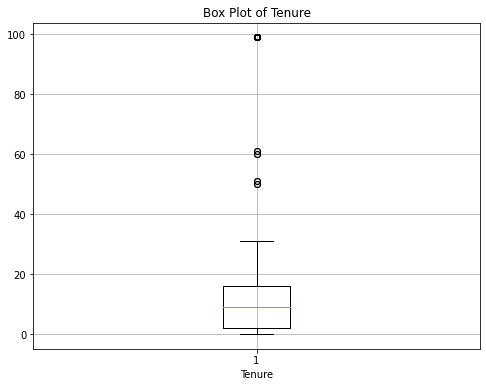

In [58]:
# Plot box plot for 'Tenure'
plt.figure(figsize=(8, 6))
plt.boxplot(df['Tenure'])
plt.xlabel('Tenure')
plt.title('Box Plot of Tenure')
plt.grid(True)
plt.show()

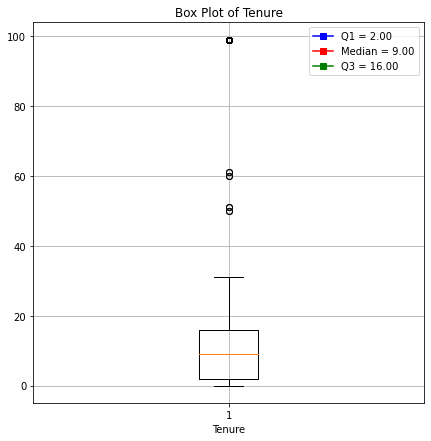

In [59]:
# Calculate percentiles
percentiles = np.percentile(df['Tenure'], [25, 50, 75])
q1, median, q3 = percentiles

# Plot box plot for 'Tenure'
plt.figure(figsize=(7, 7))
boxplot = plt.boxplot(df['Tenure'])
plt.xlabel('Tenure')
plt.title('Box Plot of Tenure')

# Create a legend with the percentile values
plt.legend(handles=[
    boxplot['medians'][0],
    plt.Line2D([], [], color='blue', marker='s', label=f'Q1 = {q1:.2f}'),
    plt.Line2D([], [], color='red', marker='s', label=f'Median = {median:.2f}'),
    plt.Line2D([], [], color='green', marker='s', label=f'Q3 = {q3:.2f}')
])
plt.grid(True)
plt.show()


In [60]:
df['Tenure'].median()

9.0

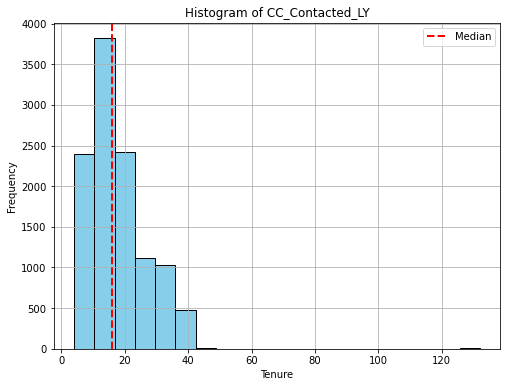

In [61]:
#CC_Contacted_LY

median_value = df['CC_Contacted_LY'].median()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['CC_Contacted_LY'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Histogram of CC_Contacted_LY')

plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label='Median')

plt.grid(True)
plt.legend()
plt.show()

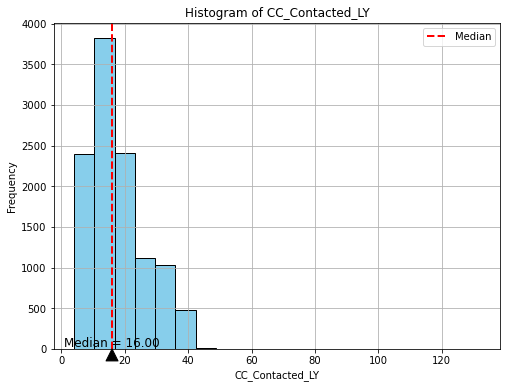

In [62]:
# Calculate the median
median_value = df['CC_Contacted_LY'].median()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['CC_Contacted_LY'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('CC_Contacted_LY')
plt.ylabel('Frequency')
plt.title('Histogram of CC_Contacted_LY')

# Adding a vertical dashed line for the median
plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label='Median')

# Annotate the median value on the graph
plt.annotate(f'Median = {median_value:.2f}', 
             xy=(median_value, 0), 
             xytext=(median_value, 30), 
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12,
             horizontalalignment='center')

plt.grid(True)
plt.legend()
plt.show()

In [63]:
median_value

16.0

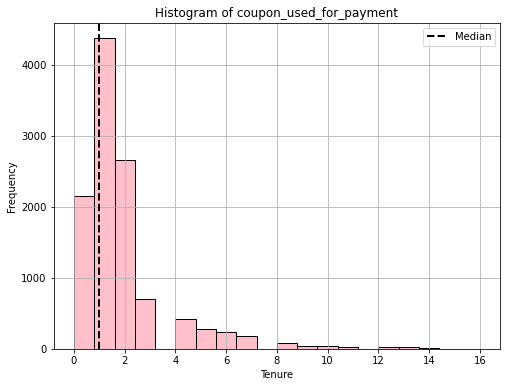

In [64]:
#coupon_used_for_payment

median_value = df['coupon_used_for_payment'].median()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['coupon_used_for_payment'], bins=20, color='pink', edgecolor='black')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Histogram of coupon_used_for_payment')

plt.axvline(median_value, color='black', linestyle='dashed', linewidth=2, label='Median')

plt.grid(True)
plt.legend()
plt.show()

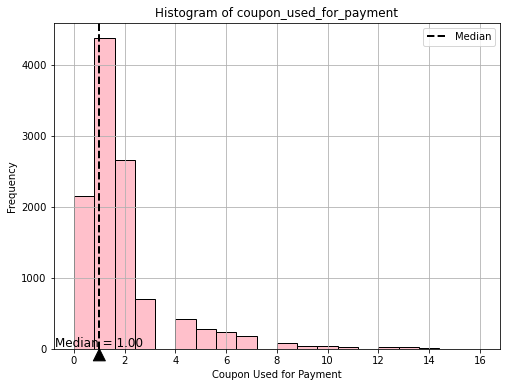

In [65]:

# Calculate the median
median_value = df['coupon_used_for_payment'].median()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['coupon_used_for_payment'], bins=20, color='pink', edgecolor='black')
plt.xlabel('Coupon Used for Payment')
plt.ylabel('Frequency')
plt.title('Histogram of coupon_used_for_payment')

# Adding a vertical dashed line for the median
plt.axvline(median_value, color='black', linestyle='dashed', linewidth=2, label='Median')

# Annotate the median value on the graph
plt.annotate(f'Median = {median_value:.2f}', 
             xy=(median_value, 0), 
             xytext=(median_value, 30), 
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12,
             horizontalalignment='center')

plt.grid(True)
plt.legend()
plt.show()

In [66]:
median_value 

1.0

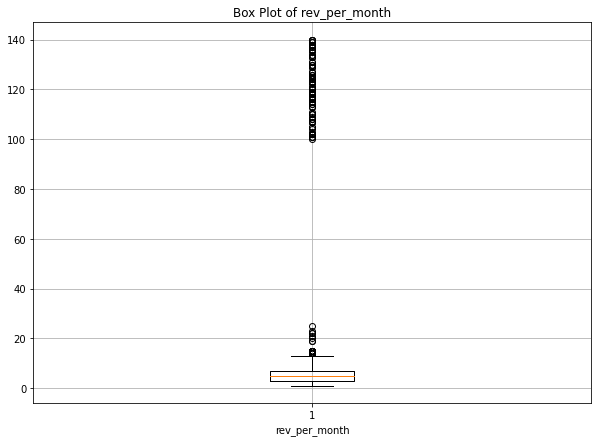

In [67]:
# Plot box plot for 'rev_per_month'
plt.figure(figsize=(10, 7))
plt.boxplot(df['rev_per_month'])
plt.xlabel('rev_per_month')
plt.title('Box Plot of rev_per_month')
plt.grid(True)
plt.show()

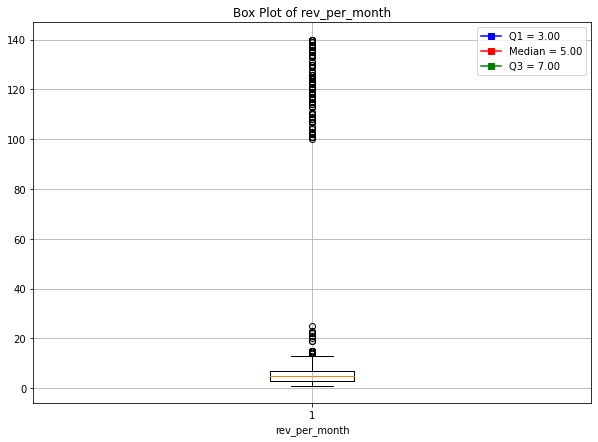

In [68]:
# Calculate percentiles
percentiles = np.percentile(df['rev_per_month'], [25, 50, 75])
q1, median, q3 = percentiles

# Plot box plot for 'rev_per_month'
plt.figure(figsize=(10, 7))
boxplot = plt.boxplot(df['rev_per_month'])
plt.xlabel('rev_per_month')
plt.title('Box Plot of rev_per_month')

plt.legend(handles=[
    boxplot['medians'][0],
    plt.Line2D([], [], color='blue', marker='s', label=f'Q1 = {q1:.2f}'),
    plt.Line2D([], [], color='red', marker='s', label=f'Median = {median:.2f}'),
    plt.Line2D([], [], color='green', marker='s', label=f'Q3 = {q3:.2f}')
])
plt.grid(True)
plt.show()


In [69]:
df['rev_per_month'].median()

5.0

In [70]:
df['rev_per_month'].mean()

6.266873889875666

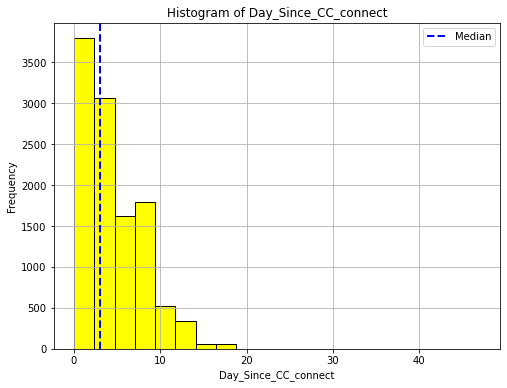

In [71]:
#Day_Since_CC_connect
median_value = df['Day_Since_CC_connect'].median()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Day_Since_CC_connect'], bins=20, color='yellow', edgecolor='black')
plt.xlabel('Day_Since_CC_connect')
plt.ylabel('Frequency')
plt.title('Histogram of Day_Since_CC_connect')

plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label='Median')

plt.grid(True)
plt.legend()
plt.show()

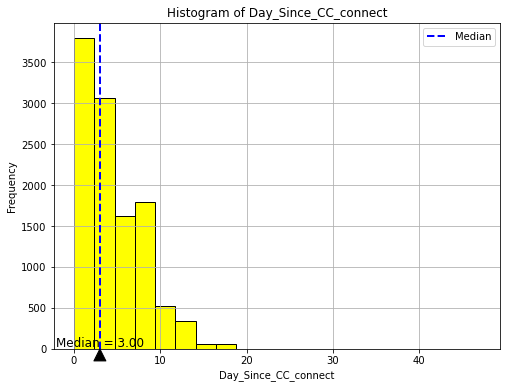

In [72]:
# Calculate the median
median_value = df['Day_Since_CC_connect'].median()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Day_Since_CC_connect'], bins=20, color='yellow', edgecolor='black')
plt.xlabel('Day_Since_CC_connect')
plt.ylabel('Frequency')
plt.title('Histogram of Day_Since_CC_connect')

# Adding a vertical dashed line for the median
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label='Median')

# Annotate the median value on the graph
plt.annotate(f'Median = {median_value:.2f}', 
             xy=(median_value, 0), 
             xytext=(median_value, 30), 
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12,
             horizontalalignment='center')

plt.grid(True)
plt.legend()
plt.show()

In [73]:
median_value

3.0

In [74]:
df['Day_Since_CC_connect'].max()

47.0

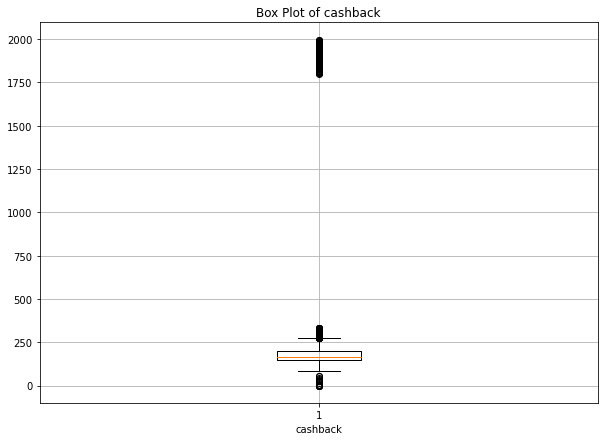

In [75]:
#cashback
plt.figure(figsize=(10, 7))
plt.boxplot(df['cashback'])
plt.xlabel('cashback')
plt.title('Box Plot of cashback')
plt.grid(True)
plt.show()

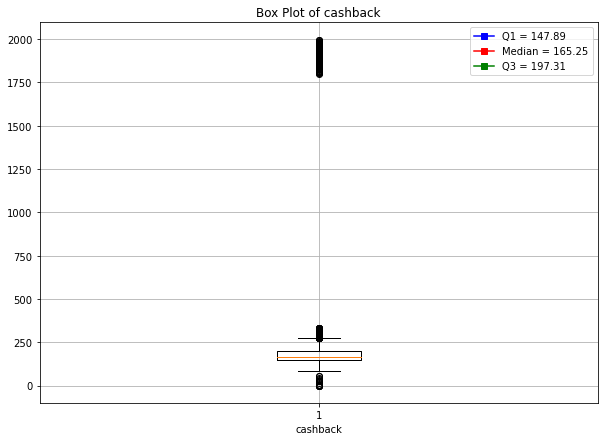

In [76]:
# Calculate percentiles
percentiles = np.percentile(df['cashback'], [25, 50, 75])
q1, median, q3 = percentiles

# Plot box plot for 'cashback'
plt.figure(figsize=(10, 7))
boxplot = plt.boxplot(df['cashback'])
plt.xlabel('cashback')
plt.title('Box Plot of cashback')

# Create a legend with the percentile values
plt.legend(handles=[
    boxplot['medians'][0],
    plt.Line2D([], [], color='blue', marker='s', label=f'Q1 = {q1:.2f}'),
    plt.Line2D([], [], color='red', marker='s', label=f'Median = {median:.2f}'),
    plt.Line2D([], [], color='green', marker='s', label=f'Q3 = {q3:.2f}')
])
plt.grid(True)
plt.show()

In [77]:
df['cashback'].median()

165.25

In [78]:
df['cashback'].max()

1997.0

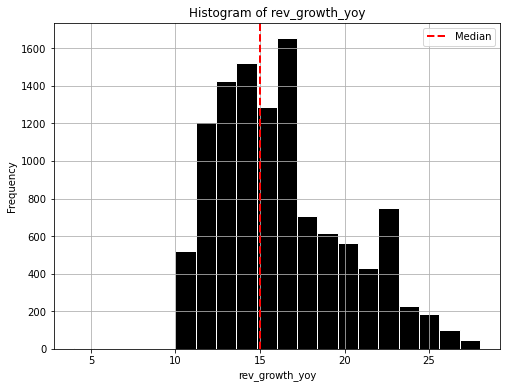

In [79]:
#rev_growth_yoy
median_value = df['rev_growth_yoy'].median()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['rev_growth_yoy'], bins=20, color='black', edgecolor='white')
plt.xlabel('rev_growth_yoy')
plt.ylabel('Frequency')
plt.title('Histogram of rev_growth_yoy')

plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label='Median')

plt.grid(True)
plt.legend()
plt.show()

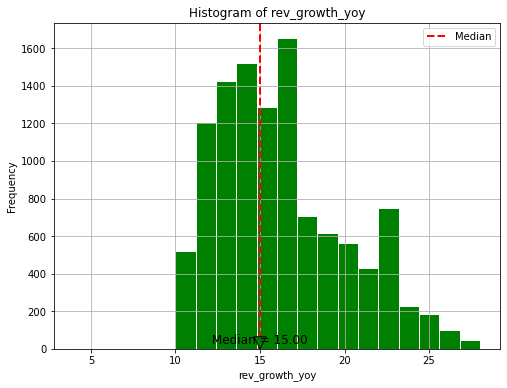

In [80]:
# Calculate the median
median_value = df['rev_growth_yoy'].median()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['rev_growth_yoy'], bins=20, color='green', edgecolor='white')
plt.xlabel('rev_growth_yoy')
plt.ylabel('Frequency')
plt.title('Histogram of rev_growth_yoy')

# Adding a vertical dashed line for the median
plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label='Median')

# Annotate the median value on the graph
plt.annotate(f'Median = {median_value:.2f}', 
             xy=(median_value, 0), 
             xytext=(median_value, 30), 
             arrowprops=dict(facecolor='green', shrink=0.05),
             fontsize=12,
             horizontalalignment='center')

plt.grid(True)
plt.legend()
plt.show()

In [81]:
median_value

15.0

In [82]:
df['rev_growth_yoy'].max()

28.0

# UNIVARIATE - Categorical Variables

In [83]:
# Categorical Variables
#categorical_vars = ['City_Tier', 'Payment', 'Gender', 'Service_Score', 'account_segment', 'CC_Agent_Score', 'Marital_Status', 'Complain_ly', 'Login_device', 'Account_user_count', 'Churn']

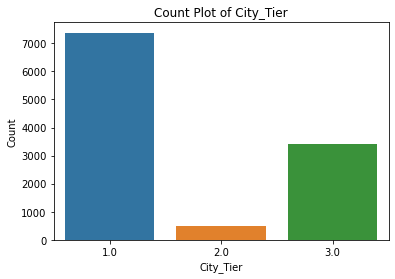

In [84]:
#City_Tier
sns.countplot(x='City_Tier', data=df)
plt.xlabel('City_Tier')
plt.ylabel('Count')
plt.title('Count Plot of City_Tier')
plt.show()

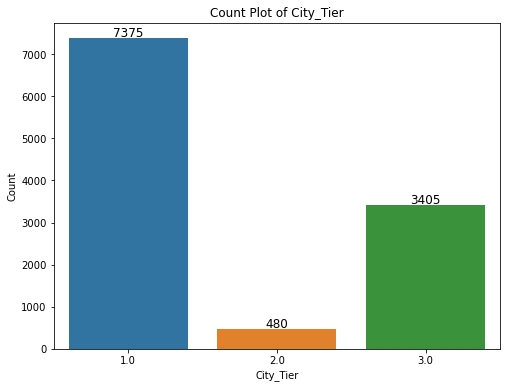

In [85]:
# Create a count plot for 'City_Tier'
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='City_Tier', data=df)
plt.xlabel('City_Tier')
plt.ylabel('Count')
plt.title('Count Plot of City_Tier')

# Adding value counts to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


In [86]:
df['City_Tier'].value_counts()

1.0    7375
3.0    3405
2.0     480
Name: City_Tier, dtype: int64

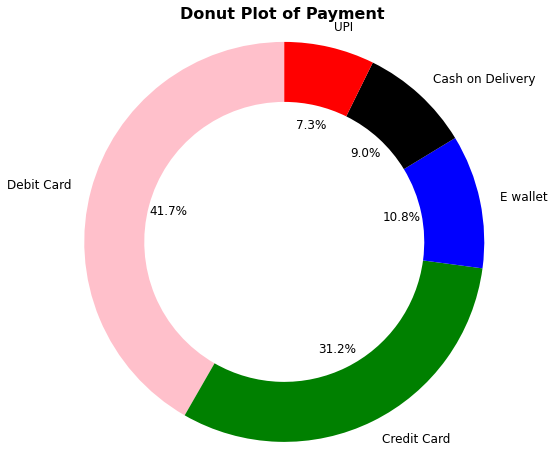

In [87]:
#Payment

payment_counts = df['Payment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, colors=['pink', 'green', 'blue', 'black', 'red'],
        wedgeprops=dict(width=0.3), autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})

centre_circle = plt.Circle((0, 0), 0.6, color='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.title('Donut Plot of Payment', fontsize=16, weight='bold')
plt.axis('equal')
plt.show()


In [88]:
df['Payment'].value_counts(normalize=True)

Debit Card          0.417052
Credit Card         0.311812
E wallet            0.108082
Cash on Delivery    0.090053
UPI                 0.073002
Name: Payment, dtype: float64

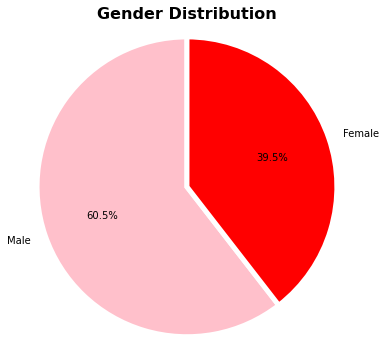

In [89]:
#Gender
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))


plt.pie(gender_counts, labels=gender_counts.index, colors=['pink', 'Red'], autopct='%1.1f%%', startangle=90,
        wedgeprops={'linewidth': 5, 'edgecolor': 'white'})
plt.title('Gender Distribution', fontsize=16, weight='bold')
plt.axis('equal')
plt.show()

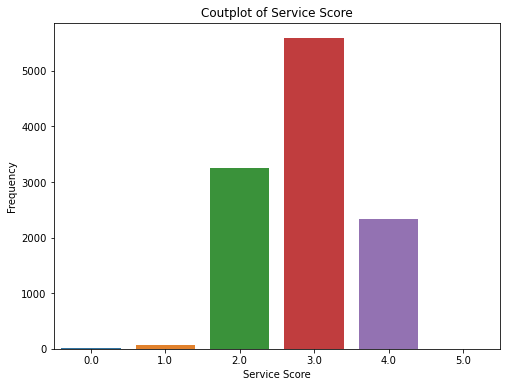

In [90]:
#Service_Score
plt.figure(figsize=(8, 6))
sns.countplot(x='Service_Score', data=df)
plt.xlabel('Service Score')
plt.ylabel('Frequency')
plt.title('Coutplot of Service Score')
plt.show()

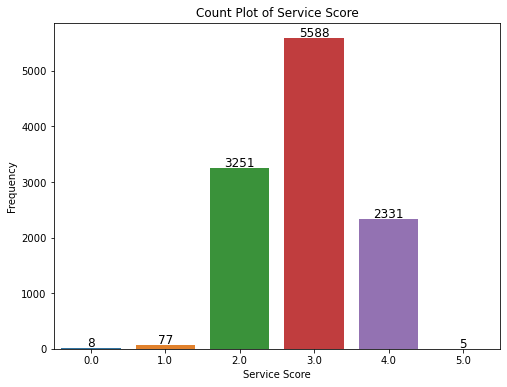

In [91]:
# Create a count plot for 'Service_Score'
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Service_Score', data=df)
plt.xlabel('Service Score')
plt.ylabel('Frequency')
plt.title('Count Plot of Service Score')

# Adding value counts to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


In [92]:
df['Service_Score'].value_counts()

3.0    5588
2.0    3251
4.0    2331
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64

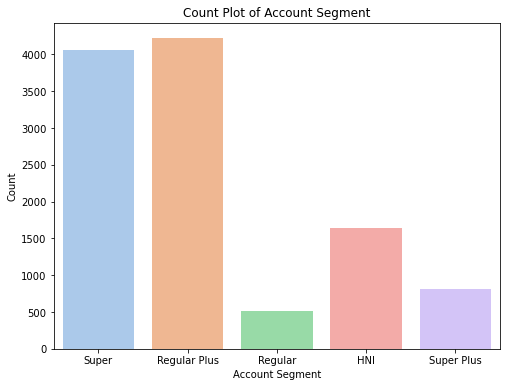

In [93]:
#Account Segment 
plt.figure(figsize=(8, 6))
sns.countplot(x='account_segment', data=df, palette='pastel')
plt.xlabel('Account Segment')
plt.ylabel('Count')
plt.title('Count Plot of Account Segment')
plt.show()

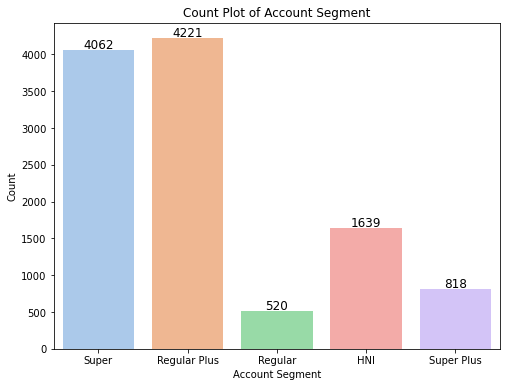

In [94]:
# Create a count plot for 'Account Segment'
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='account_segment', data=df, palette='pastel')
plt.xlabel('Account Segment')
plt.ylabel('Count')
plt.title('Count Plot of Account Segment')

# Adding value counts to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [95]:
df['account_segment'].value_counts()

Regular Plus    4221
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64

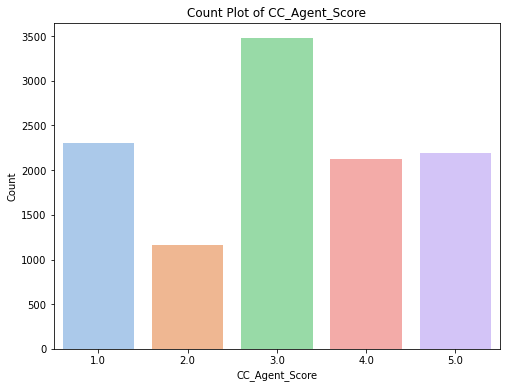

In [96]:
#CC_Agent_Score

plt.figure(figsize=(8, 6))
sns.countplot(x='CC_Agent_Score', data=df, palette='pastel')
plt.xlabel('CC_Agent_Score')
plt.ylabel('Count')
plt.title('Count Plot of CC_Agent_Score')
plt.show()

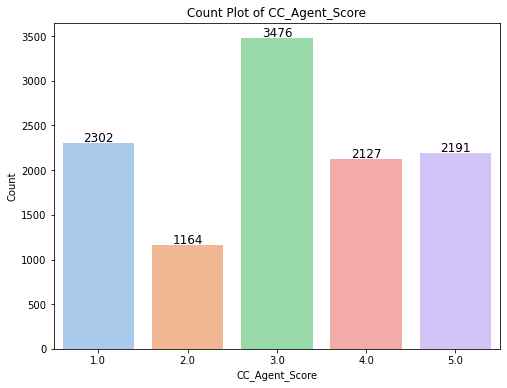

In [97]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='CC_Agent_Score', data=df, palette='pastel')
plt.xlabel('CC_Agent_Score')
plt.ylabel('Count')
plt.title('Count Plot of CC_Agent_Score')

# Adding value counts to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [98]:
df['CC_Agent_Score'].value_counts()

3.0    3476
1.0    2302
5.0    2191
4.0    2127
2.0    1164
Name: CC_Agent_Score, dtype: int64

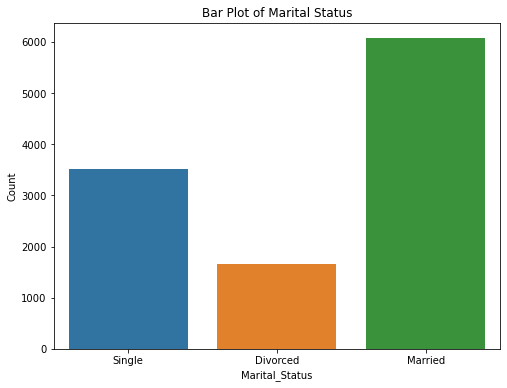

In [99]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital_Status', data=df)
plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.title('Bar Plot of Marital Status')
plt.show()

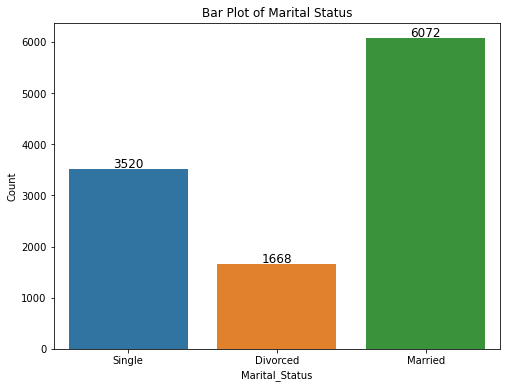

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a count plot for 'Marital_Status'
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Marital_Status', data=df)
plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.title('Bar Plot of Marital Status')

# Adding value counts to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


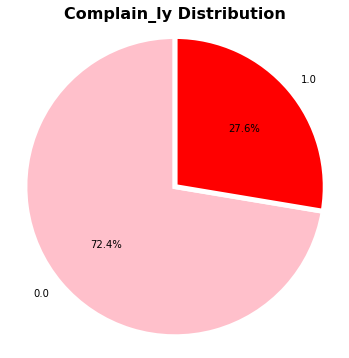

In [101]:
#Complain_ly
Complain_ly_counts = df['Complain_ly'].value_counts()
plt.figure(figsize=(6, 6))


plt.pie(Complain_ly_counts, labels=Complain_ly_counts.index, colors=['pink', 'Red'], autopct='%1.1f%%', startangle=90,
        wedgeprops={'linewidth': 5, 'edgecolor': 'white'})
plt.title('Complain_ly Distribution', fontsize=16, weight='bold')
plt.axis('equal')
plt.show()

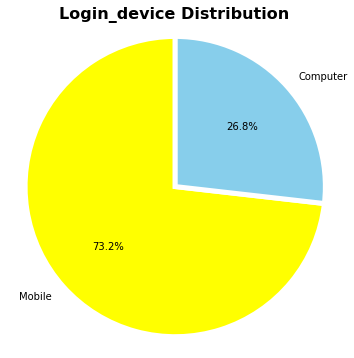

In [102]:
#'Login_device'
Login_device_counts = df['Login_device'].value_counts()
plt.figure(figsize=(6, 6))


plt.pie(Login_device_counts, labels=Login_device_counts.index, colors=['yellow', 'skyblue'], autopct='%1.1f%%', startangle=90,
        wedgeprops={'linewidth': 5, 'edgecolor': 'white'})
plt.title('Login_device Distribution', fontsize=16, weight='bold')
plt.axis('equal')
plt.show()

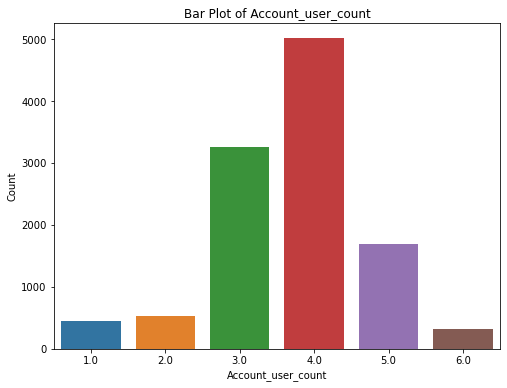

In [103]:
#'Account_user_count'

plt.figure(figsize=(8, 6))
sns.countplot(x='Account_user_count', data=df)
plt.xlabel('Account_user_count')
plt.ylabel('Count')
plt.title('Bar Plot of Account_user_count')
plt.show()

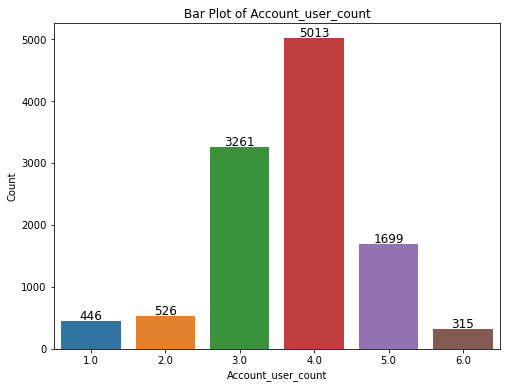

In [104]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Account_user_count', data=df)
plt.xlabel('Account_user_count')
plt.ylabel('Count')
plt.title('Bar Plot of Account_user_count')

# Adding value counts to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [105]:
df['Account_user_count'].value_counts()

4.0    5013
3.0    3261
5.0    1699
2.0     526
1.0     446
6.0     315
Name: Account_user_count, dtype: int64

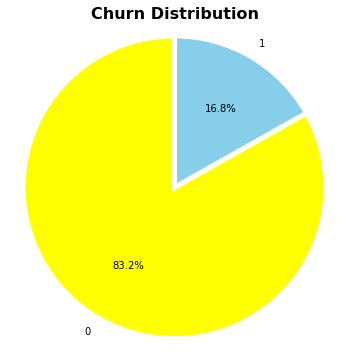

In [106]:
#Churn
Churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(6, 6))


plt.pie(Churn_counts, labels=Churn_counts.index, colors=['yellow', 'skyblue'], autopct='%1.1f%%', startangle=90,
        wedgeprops={'linewidth': 5, 'edgecolor': 'white'})
plt.title('Churn Distribution', fontsize=16, weight='bold')
plt.axis('equal')
plt.show()

# BIVARIATE:

In [107]:
# Categorical Variables
#categorical_vars = ['City_Tier', 'Payment', 'Gender', 'Service_Score', 'account_segment', 'CC_Agent_Score', 'Marital_Status', 'Complain_ly', 'Login_device', 'Account_user_count', 'Churn']
# Continuous Variables
#continuous_vars = ['Tenure', 'CC_Contacted_LY','rev_per_month', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback', 'rev_growth_yoy']

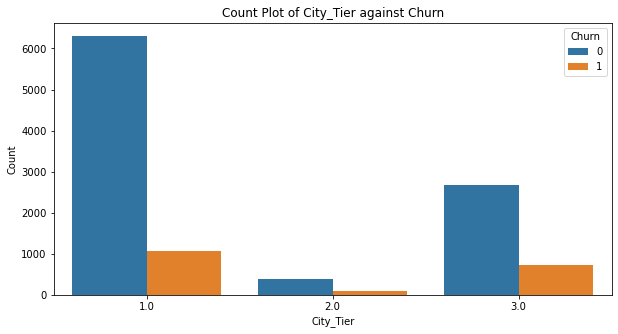

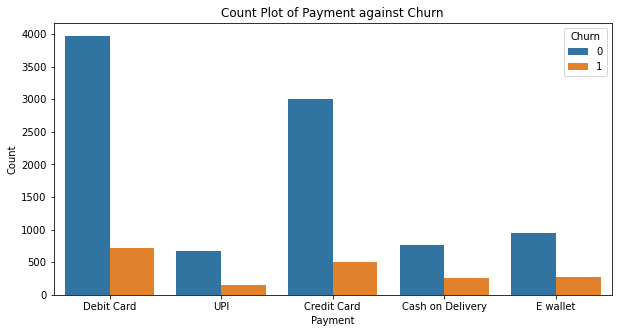

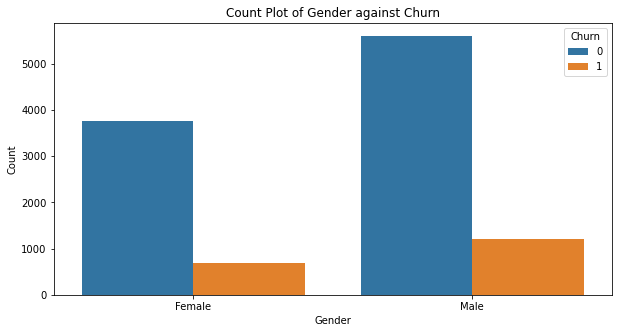

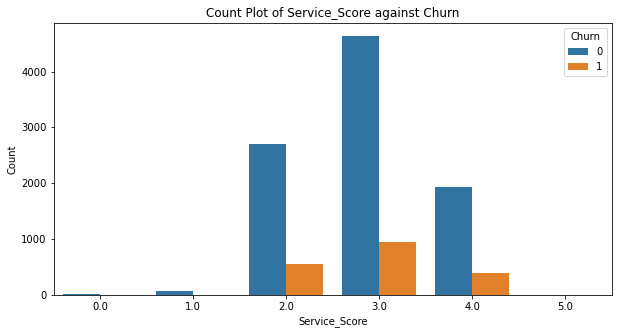

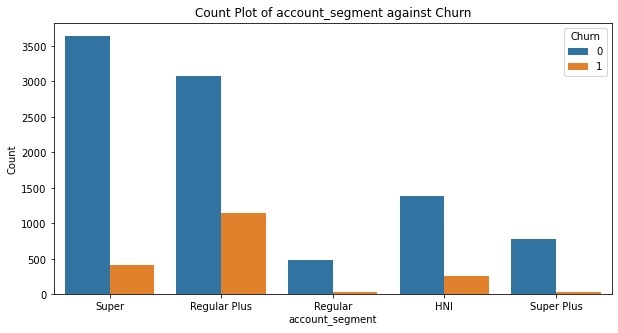

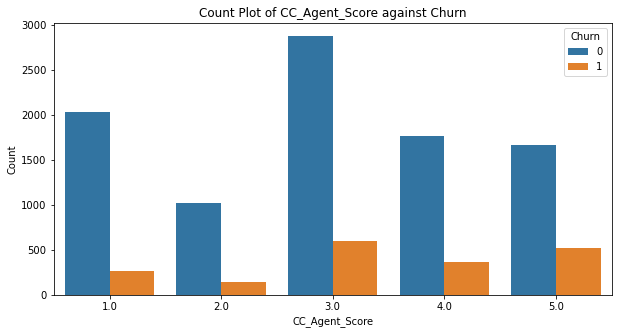

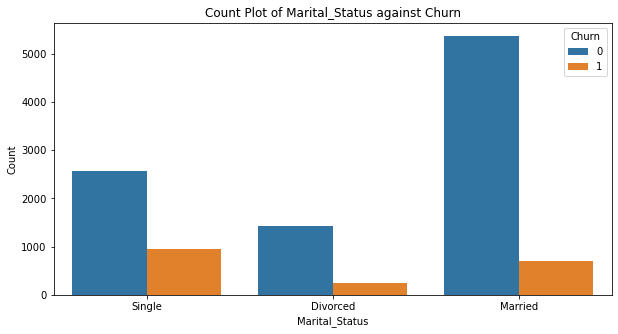

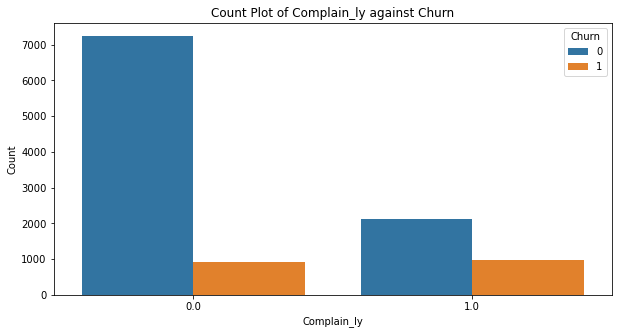

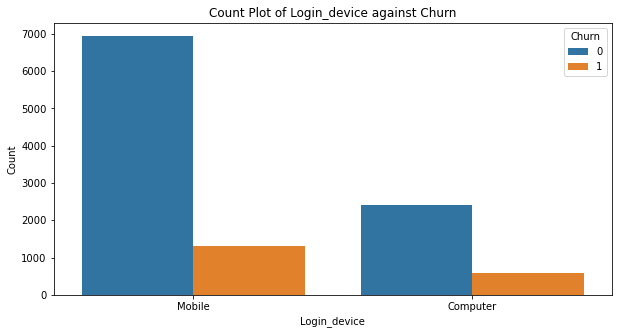

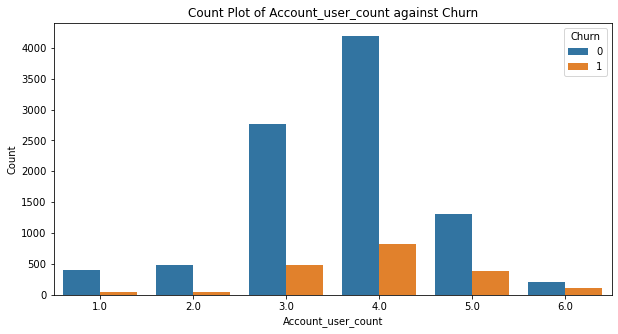

In [108]:

# Categorical Variables
categorical_vars = ['City_Tier', 'Payment', 'Gender', 'Service_Score', 'account_segment', 'CC_Agent_Score', 'Marital_Status', 'Complain_ly', 'Login_device', 'Account_user_count']
# Continuous Variables
continuous_vars = ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback', 'rev_growth_yoy']

cat_vars_with_target = categorical_vars + ['Churn']

for var in categorical_vars:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=var, hue='Churn', data=df)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'Count Plot of {var} against Churn')
    plt.show()



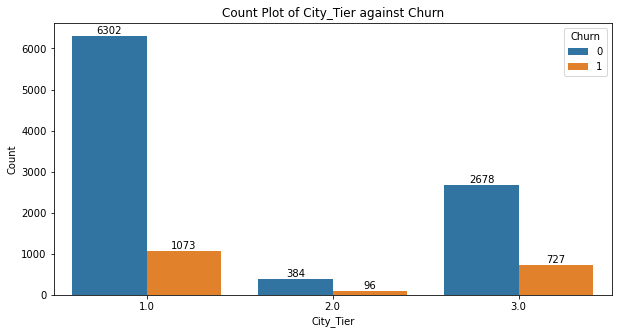

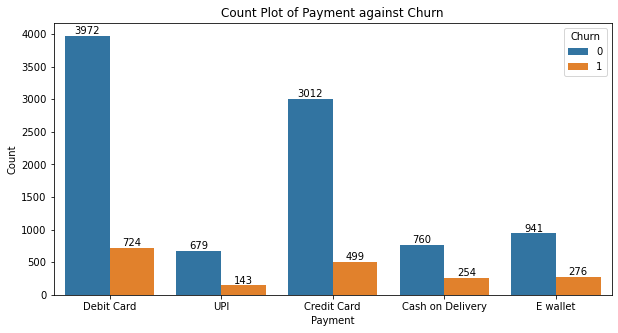

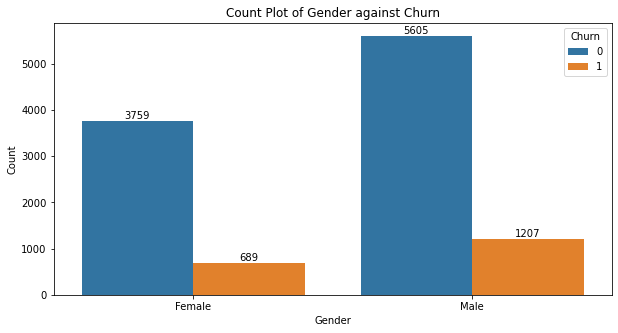

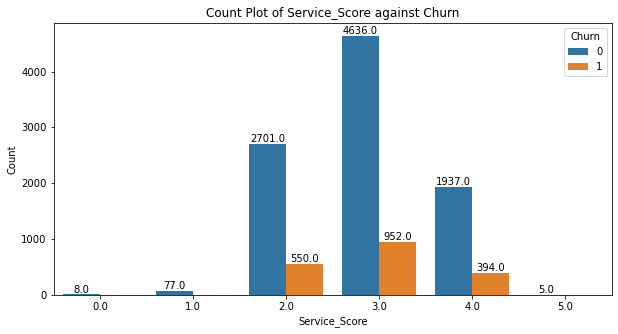

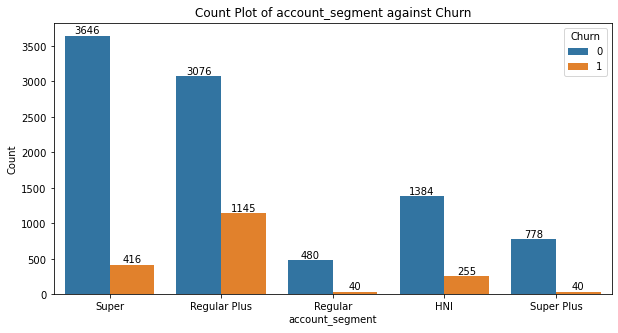

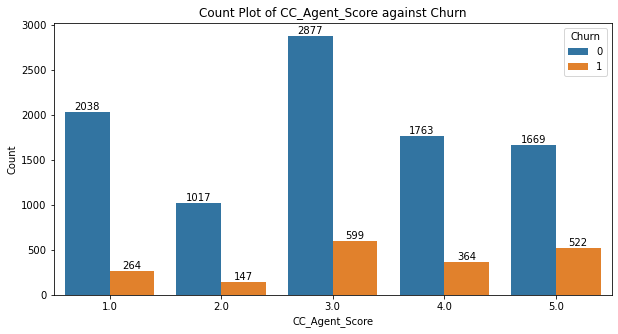

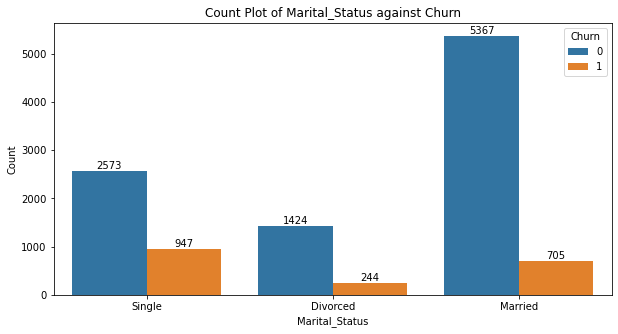

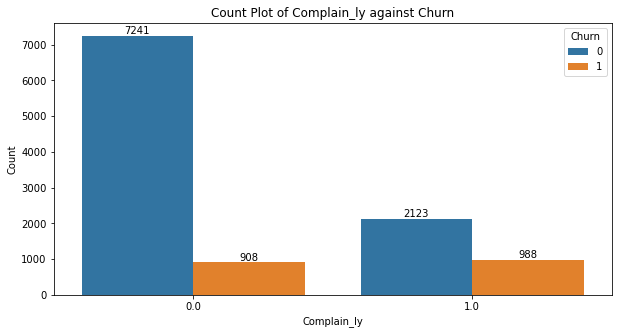

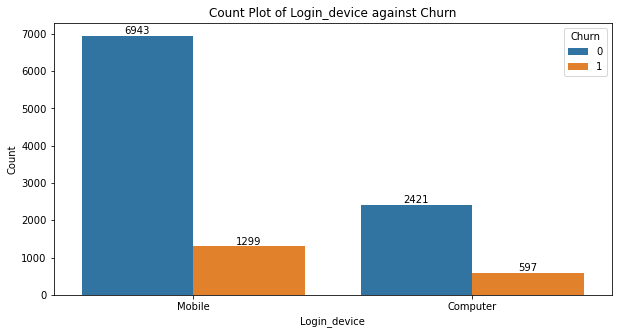

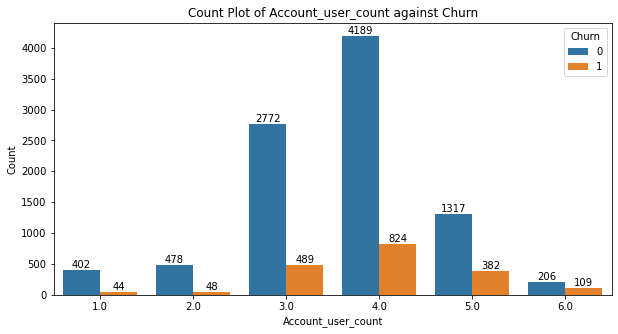

In [109]:
# Add 'Churn' to categorical variables
cat_vars_with_target = categorical_vars + ['Churn']

for var in categorical_vars:
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x=var, hue='Churn', data=df)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'Count Plot of {var} against Churn')

    # Adding value counts to the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.legend(title='Churn', loc='upper right')
    plt.show()

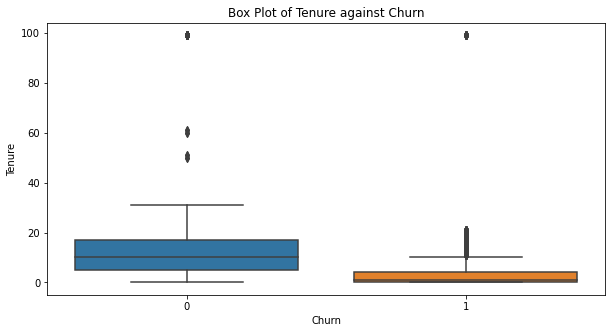

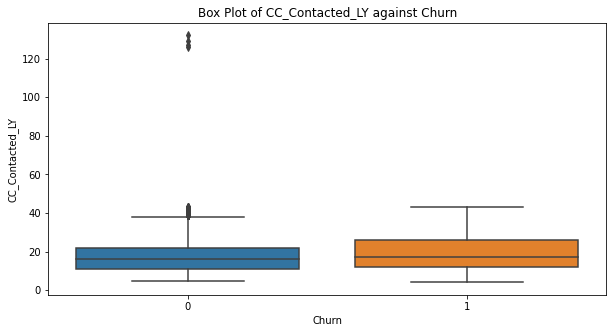

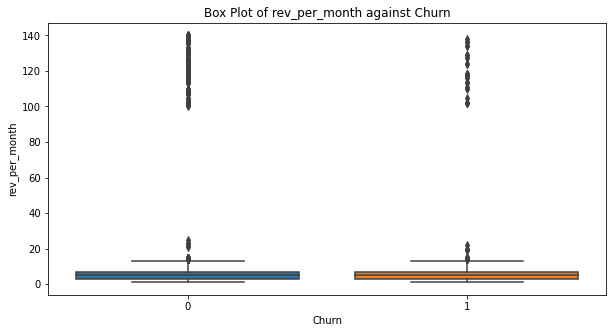

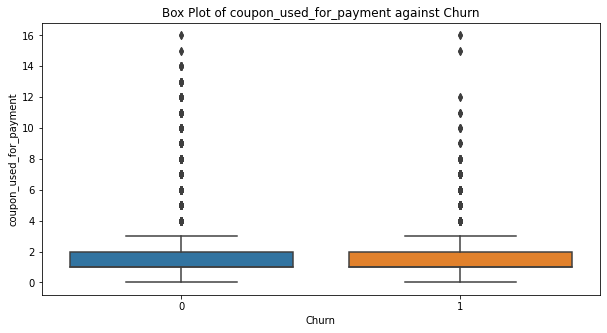

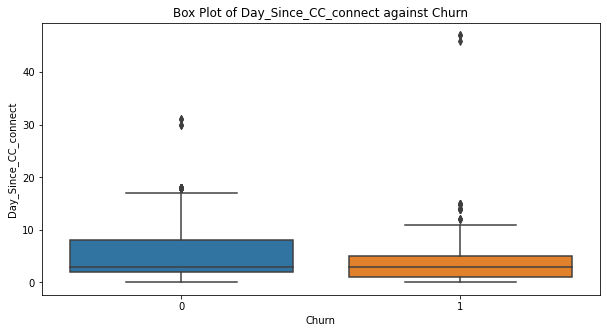

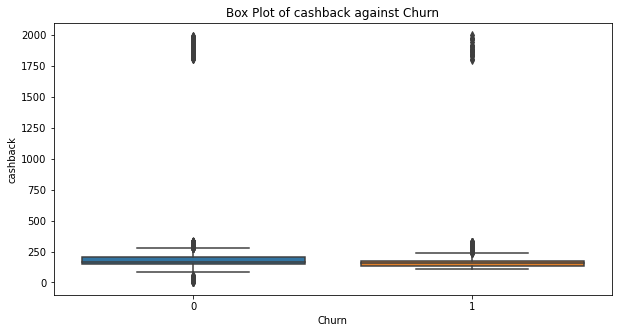

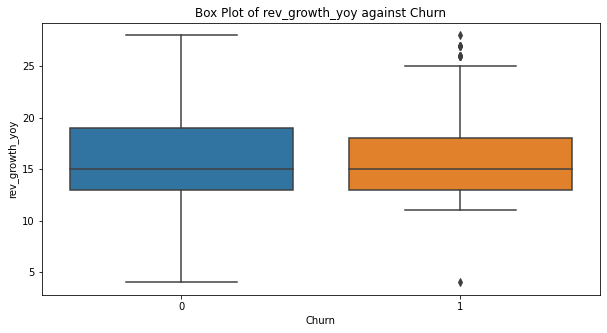

In [110]:

cont_vars_with_target = continuous_vars + ['Churn']

for var in continuous_vars:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Churn', y=var, data=df)
    plt.xlabel('Churn')
    plt.ylabel(var)
    plt.title(f'Box Plot of {var} against Churn')
    plt.show()

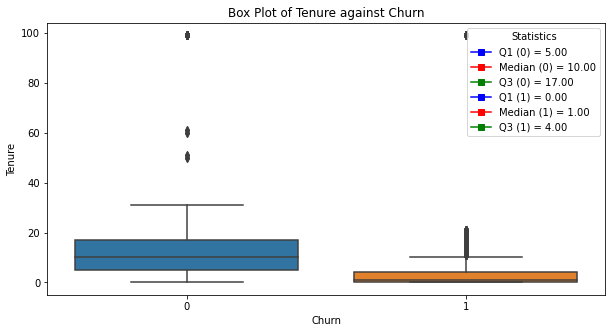

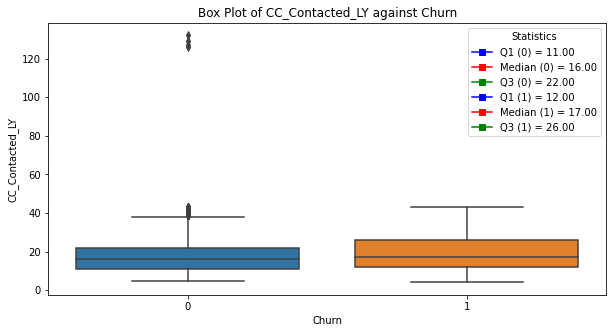

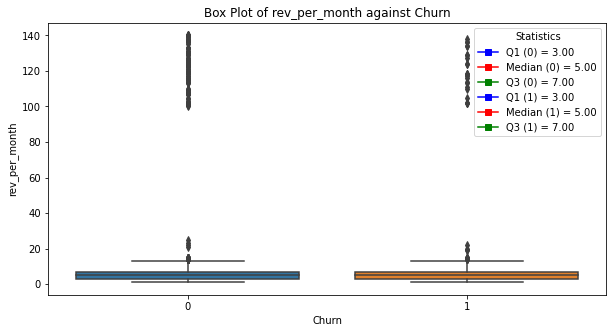

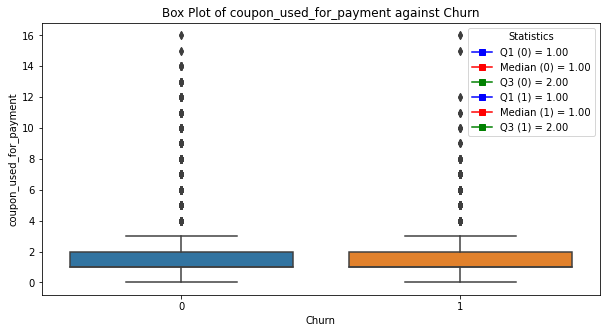

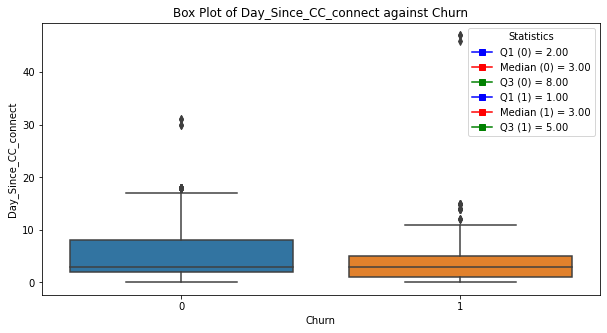

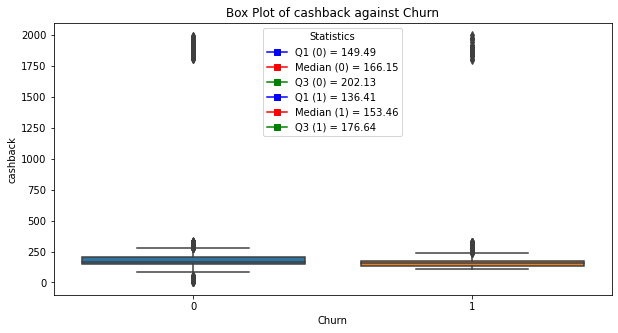

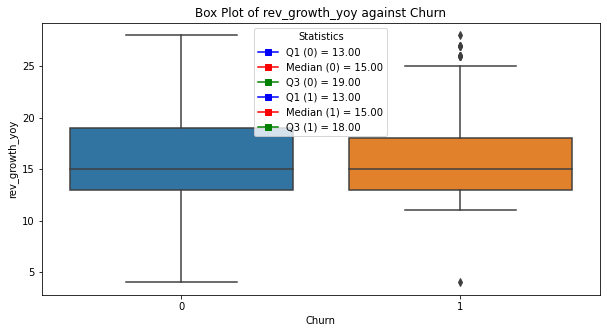

In [111]:
# Add 'Churn' to continuous variables
cont_vars_with_target = continuous_vars + ['Churn']

for var in continuous_vars:
    plt.figure(figsize=(10, 5))
    ax = sns.boxplot(x='Churn', y=var, data=df)
    plt.xlabel('Churn')
    plt.ylabel(var)
    plt.title(f'Box Plot of {var} against Churn')

    # Calculate Q1, median, and Q3 for both Churn categories (0 and 1)
    q1_0 = df[df['Churn'] == 0][var].quantile(0.25)
    median_0 = df[df['Churn'] == 0][var].median()
    q3_0 = df[df['Churn'] == 0][var].quantile(0.75)

    q1_1 = df[df['Churn'] == 1][var].quantile(0.25)
    median_1 = df[df['Churn'] == 1][var].median()
    q3_1 = df[df['Churn'] == 1][var].quantile(0.75)

    # Add Q1, median, and Q3 values to the legend
    plt.legend(title='Statistics',
               handles=[
                   plt.Line2D([], [], color='blue', marker='s', label=f'Q1 (0) = {q1_0:.2f}'),
                   plt.Line2D([], [], color='red', marker='s', label=f'Median (0) = {median_0:.2f}'),
                   plt.Line2D([], [], color='green', marker='s', label=f'Q3 (0) = {q3_0:.2f}'),
                   plt.Line2D([], [], color='blue', marker='s', label=f'Q1 (1) = {q1_1:.2f}'),
                   plt.Line2D([], [], color='red', marker='s', label=f'Median (1) = {median_1:.2f}'),
                   plt.Line2D([], [], color='green', marker='s', label=f'Q3 (1) = {q3_1:.2f}')
               ])

    plt.show()


In [112]:
pd.options.display.max_columns = None

In [113]:
df.head()

AccountID  Churn  Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      20000      1     4.0        3.0              6.0   Debit Card  Female   
1      20001      1     0.0        1.0              8.0          UPI    Male   
2      20002      1     0.0        1.0             30.0   Debit Card    Male   
3      20003      1     0.0        3.0             15.0   Debit Card    Male   
4      20004      1     0.0        1.0             12.0  Credit Card    Male   

   Service_Score  Account_user_count account_segment  CC_Agent_Score  \
0            3.0                 3.0           Super             2.0   
1            3.0                 4.0    Regular Plus             3.0   
2            2.0                 4.0    Regular Plus             3.0   
3            2.0                 4.0           Super             5.0   
4            2.0                 3.0    Regular Plus             5.0   

  Marital_Status  rev_per_month  Complain_ly  rev_growth_yoy  \
0         Single            9.0          1.0            11.0   
1         Single            7.0          1.0            15.0   
2         Single            6.0          1.0            14.0   
3         Single            8.0          0.0            23.0   
4         Single            3.0          0.0            11.0   

   coupon_used_for_payment  Day_Since_CC_connect  cashback Login_device  
0                      1.0                   5.0    159.93       Mobile  
1                      0.0                   0.0    120.90       Mobile  
2                      0.0                   3.0    165.25       Mobile  
3                      0.0                   3.0    134.07       Mobile  
4                      1.0                   3.0    129.60       Mobile

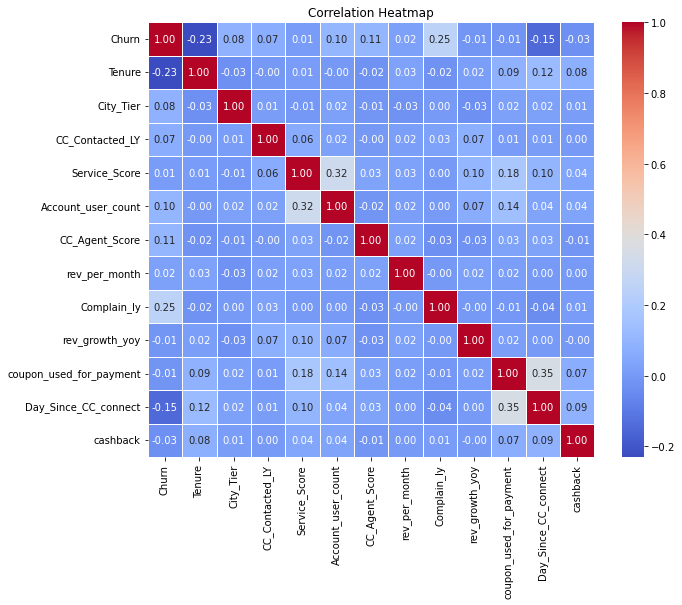

In [114]:
df_numeric = df.drop('AccountID', axis=1)
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

<Figure size 720x576 with 0 Axes>

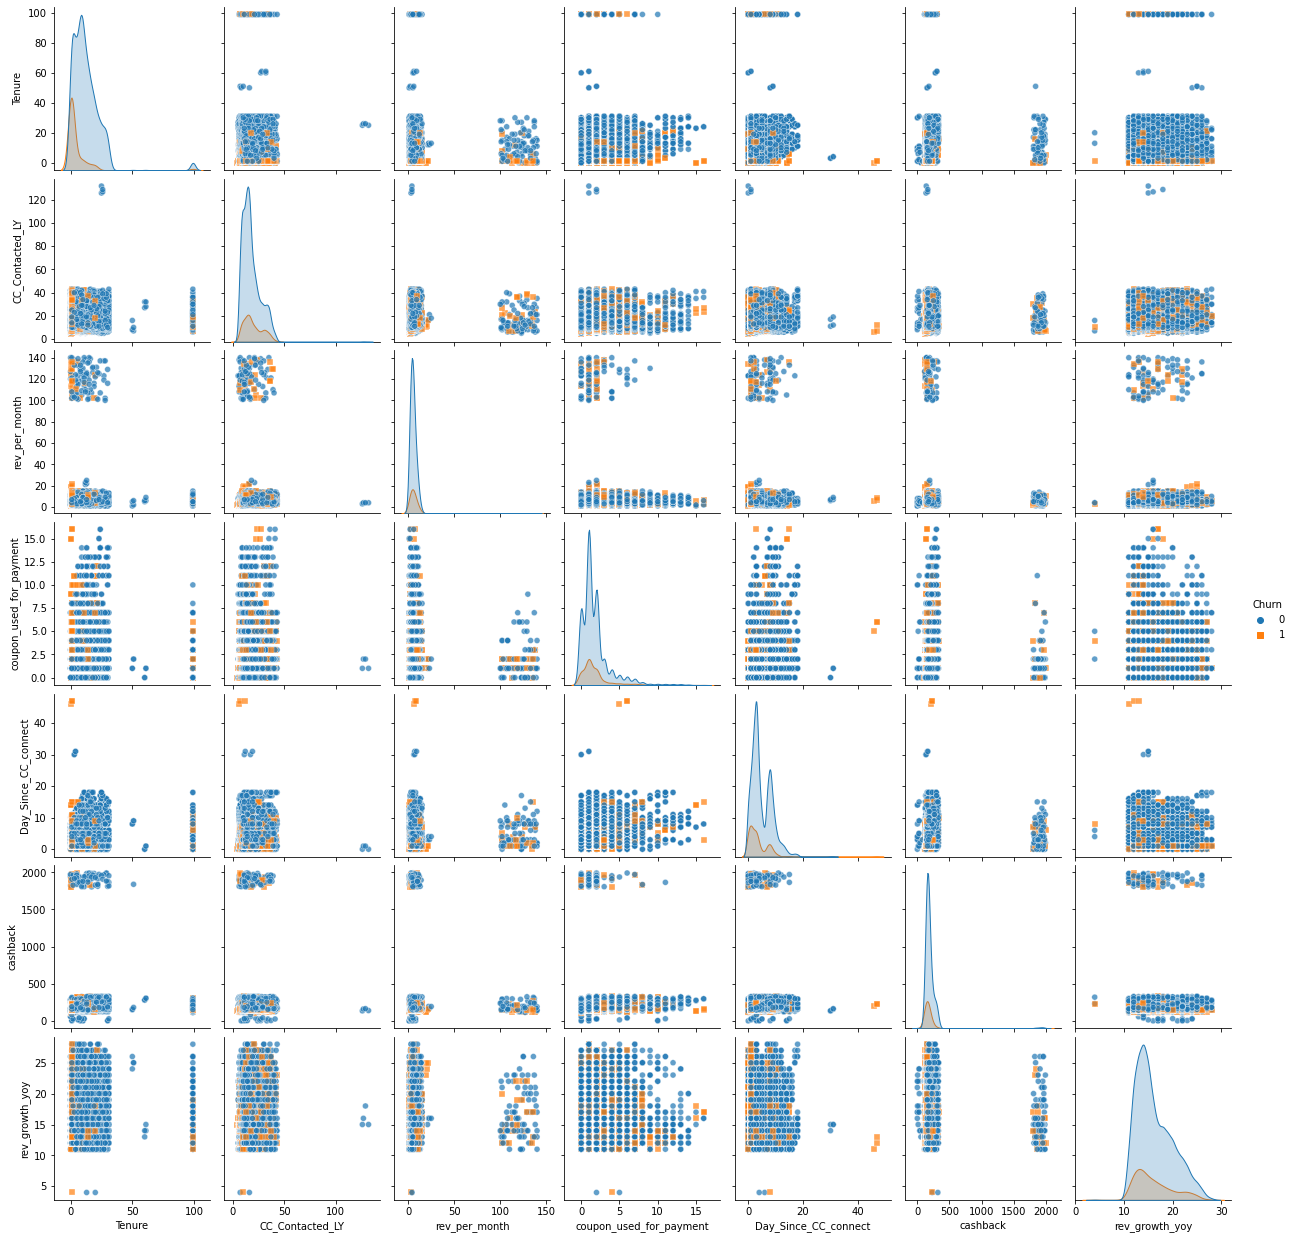

In [115]:
variables = ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback', 'rev_growth_yoy']


plt.figure(figsize=(10, 8))
sns.pairplot(df, vars=variables, hue='Churn', diag_kind='kde', markers=["o", "s"], plot_kws={'alpha': 0.7})
plt.show()

# Treating Outliers: Numerical Variable 

In [116]:
df1 = df.drop(['AccountID','Churn','City_Tier','Payment','Gender','Service_Score','account_segment','CC_Agent_Score','Marital_Status','Complain_ly','Login_device','Account_user_count', 'coupon_used_for_payment'], axis=1)
df_y = df[['Churn','City_Tier','Payment','Gender','Service_Score','account_segment','CC_Agent_Score','Marital_Status','Complain_ly','Login_device','Account_user_count']]
df2=df[['coupon_used_for_payment']]

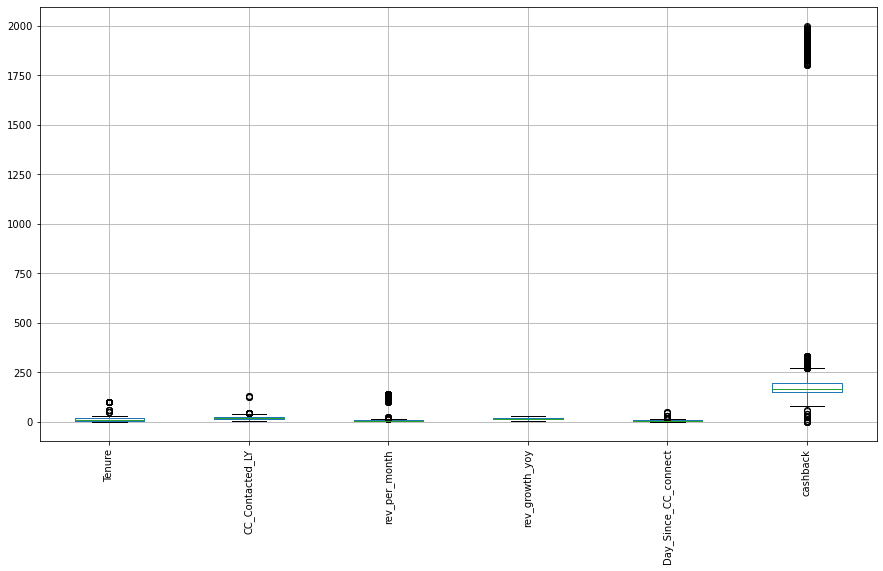

In [117]:
df1.boxplot(figsize=(15,8))
plt.xticks(rotation=90)
plt.show();

In [118]:
data_transformed = np.log(df1 + 1)

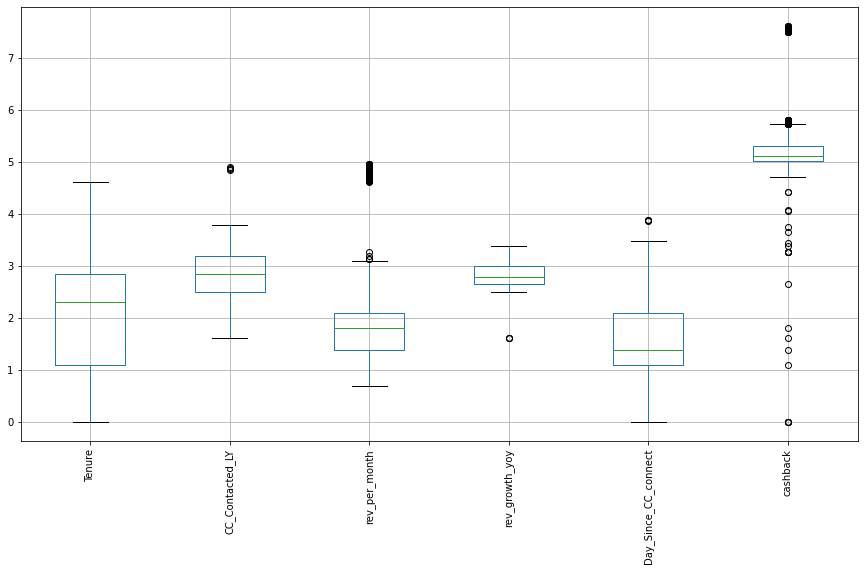

In [119]:
data_transformed.boxplot(figsize=(15,8))
plt.xticks(rotation=90)
plt.show();

In [120]:
concatenated_df = pd.concat([data_transformed, df2], axis=1)

In [121]:
concatenated_df.head()

Tenure  CC_Contacted_LY  rev_per_month  rev_growth_yoy  \
0  1.609438         1.945910       2.302585        2.484907   
1  0.000000         2.197225       2.079442        2.772589   
2  0.000000         3.433987       1.945910        2.708050   
3  0.000000         2.772589       2.197225        3.178054   
4  0.000000         2.564949       1.386294        2.484907   

   Day_Since_CC_connect  cashback  coupon_used_for_payment  
0              1.791759  5.080969                      1.0  
1              0.000000  4.803201                      0.0  
2              1.386294  5.113493                      0.0  
3              1.386294  4.905793                      0.0  
4              1.386294  4.872139                      1.0

In [122]:
Q1 = concatenated_df.quantile(0.25)
Q3 = concatenated_df.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [123]:
((concatenated_df > UL) | (concatenated_df < LL)).sum()

Tenure                        0
CC_Contacted_LY               4
rev_per_month               109
rev_growth_yoy                3
Day_Since_CC_connect          3
cashback                    404
coupon_used_for_payment    1380
dtype: int64

In [124]:
((concatenated_df > UL) | (concatenated_df < LL)).sum().sum()

1903

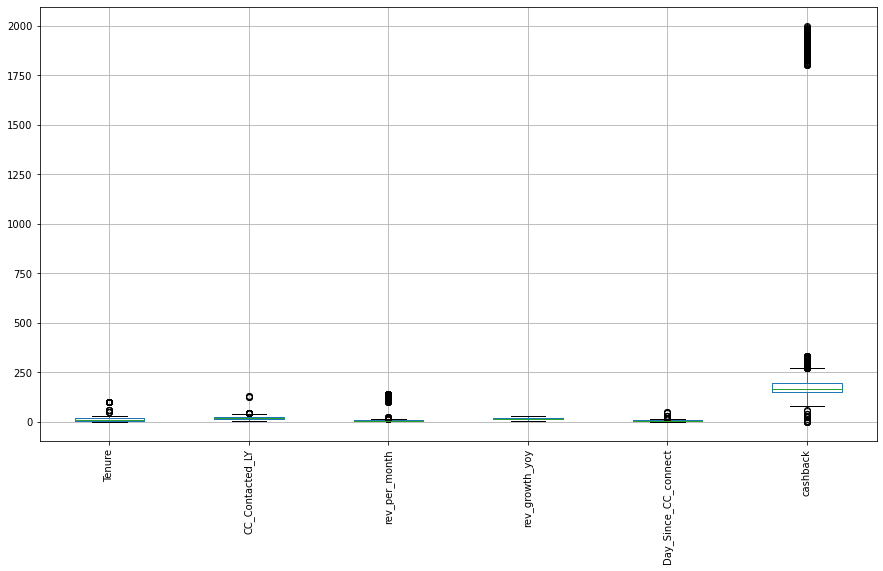

In [125]:
df1.boxplot(figsize=(15,8))
plt.xticks(rotation=90)
plt.show();

In [126]:
def remove_outlier(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

In [127]:
for column in concatenated_df.columns:
    lower_limit, upper_limit = remove_outlier(concatenated_df[column])
    concatenated_df[column] = np.where(concatenated_df[column] > upper_limit, upper_limit, concatenated_df[column])
    concatenated_df[column] = np.where(concatenated_df[column] < lower_limit, lower_limit, concatenated_df[column])

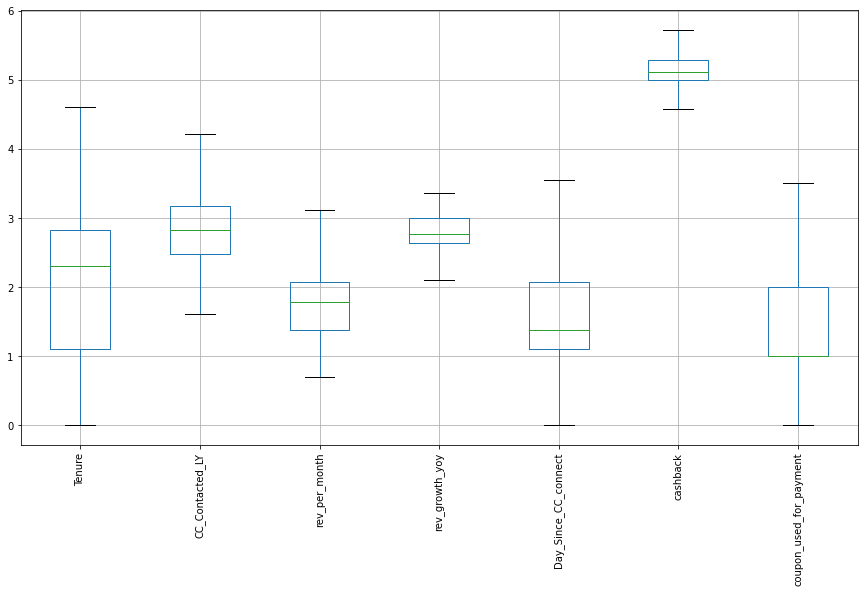

In [128]:
concatenated_df.boxplot(figsize=(15,8))
plt.xticks(rotation=90)
plt.show();

In [129]:
df=pd.concat([concatenated_df, df_y], axis = 1)

In [130]:
df.head(50)

Tenure  CC_Contacted_LY  rev_per_month  rev_growth_yoy  \
0   1.609438         1.945910       2.302585        2.484907   
1   0.000000         2.197225       2.079442        2.772589   
2   0.000000         3.433987       1.945910        2.708050   
3   0.000000         2.772589       2.197225        3.178054   
4   0.000000         2.564949       1.386294        2.484907   
5   0.000000         3.135494       1.098612        3.135494   
6   1.098612         2.484907       1.609438        2.708050   
7   0.000000         1.945910       1.386294        2.833213   
8   2.639057         2.302585       1.098612        2.708050   
9   0.000000         3.465736       1.098612        2.564949   
10  1.609438         2.944439       1.098612        2.564949   
11  2.484907         1.945910       2.397895        2.639057   
12  2.302585         2.484907       1.098612        2.639057   
13  0.000000         2.772589       0.693147        2.890372   
14  2.302585         2.772589       1.098612        2.833213   
15  2.302585         2.564949       1.791759        3.135494   
16  0.000000         2.564949       1.098612        2.944439   
17  4.605170         2.484907       1.098612        2.484907   
18  0.000000         2.639057       1.098612        3.218876   
19  2.995732         3.044522       1.791759        2.944439   
20  0.000000         2.564949       1.791759        2.944439   
21  3.044522         3.401197       1.098612        2.564949   
22  0.000000         3.367296       1.098612        2.995732   
23  0.000000         3.295837       1.609438        2.484907   
24  2.708050         2.708050       1.386294        2.772589   
25  0.000000         2.772589       2.197225        3.135494   
26  2.197225         1.945910       1.098612        2.639057   
27  3.295837         2.564949       1.386294        3.044522   
28  2.944439         2.772589       2.302585        2.944439   
29  1.791759         2.708050       1.098612        2.708050   
30  1.098612         1.945910       1.098612        2.639057   
31  0.000000         2.639057       1.386294        2.890372   
32  3.433987         2.772589       1.791759        3.044522   
33  2.639057         2.397895       2.197225        2.484907   
34  2.079442         2.197225       2.079442        2.944439   
35  0.000000         3.258097       1.098612        3.218876   
36  0.000000         2.772589       2.079442        2.944439   
37  0.693147         3.332205       1.098612        2.484907   
38  3.433987         3.433987       1.791759        2.833213   
39  0.000000         2.302585       1.098612        2.772589   
40  3.178054         2.890372       1.609438        2.772589   
41  2.708050         3.044522       1.791759        2.564949   
42  1.386294         2.484907       1.386294        2.564949   
43  2.484907         1.945910       1.791759        3.135494   
44  1.791759         2.564949       1.609438        3.044522   
45  0.000000         3.178054       0.693147        2.833213   
46  0.000000         1.945910       0.693147        3.091042   
47  2.302585         2.302585       1.791759        2.564949   
48  1.386294         2.772589       1.098612        2.484907   
49  2.944439         2.397895       1.791759        2.484907   

    Day_Since_CC_connect  cashback  coupon_used_for_payment  Churn  City_Tier  \
0               1.791759  5.080969                      1.0      1        3.0   
1               0.000000  4.803201                      0.0      1        1.0   
2               1.386294  5.113493                      0.0      1        1.0   
3               1.386294  4.905793                      0.0      1        3.0   
4               1.386294  4.872139                      1.0      1        1.0   
5               2.079442  4.942999                      3.5      1        1.0   
6               0.000000  4.802873                      0.0      1        3.0   
7               0.000000  4.819717                      2.0      1        1.0   
8           

In [131]:
df.shape

(11260, 18)

In [132]:
df_y.head()

Churn  City_Tier      Payment  Gender  Service_Score account_segment  \
0      1        3.0   Debit Card  Female            3.0           Super   
1      1        1.0          UPI    Male            3.0    Regular Plus   
2      1        1.0   Debit Card    Male            2.0    Regular Plus   
3      1        3.0   Debit Card    Male            2.0           Super   
4      1        1.0  Credit Card    Male            2.0    Regular Plus   

   CC_Agent_Score Marital_Status  Complain_ly Login_device  Account_user_count  
0             2.0         Single          1.0       Mobile                 3.0  
1             3.0         Single          1.0       Mobile                 4.0  
2             3.0         Single          1.0       Mobile                 4.0  
3             5.0         Single          0.0       Mobile                 4.0  
4             5.0         Single          0.0       Mobile                 3.0

# Encoding: 

In [133]:
df['account_segment'].unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', 'Super Plus'],
      dtype=object)

In [134]:
df['Payment'].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet'],
      dtype=object)

In [135]:
#ordinal encoding - Account Segment 
df['account_segment'] = df['account_segment'].replace('Regular','1')
df['account_segment'] = df['account_segment'].replace('Regular Plus','2')
df['account_segment'] = df['account_segment'].replace('Super','3')
df['account_segment'] = df['account_segment'].replace('Super Plus','4')
df['account_segment'] = df['account_segment'].replace('HNI','5')

In [136]:
#one-Hot encoding for catogrical variables 
df_encoded = pd.get_dummies(df, columns=['Payment', 'Gender', 'Marital_Status', 'Login_device'])

In [137]:
df_encoded.head()

Tenure  CC_Contacted_LY  rev_per_month  rev_growth_yoy  \
0  1.609438         1.945910       2.302585        2.484907   
1  0.000000         2.197225       2.079442        2.772589   
2  0.000000         3.433987       1.945910        2.708050   
3  0.000000         2.772589       2.197225        3.178054   
4  0.000000         2.564949       1.386294        2.484907   

   Day_Since_CC_connect  cashback  coupon_used_for_payment  Churn  City_Tier  \
0              1.791759  5.080969                      1.0      1        3.0   
1              0.000000  4.803201                      0.0      1        1.0   
2              1.386294  5.113493                      0.0      1        1.0   
3              1.386294  4.905793                      0.0      1        3.0   
4              1.386294  4.872139                      1.0      1        1.0   

   Service_Score account_segment  CC_Agent_Score  Complain_ly  \
0            3.0               3             2.0          1.0   
1            3.0               2             3.0          1.0   
2            2.0               2             3.0          1.0   
3            2.0               3             5.0          0.0   
4            2.0               2             5.0          0.0   

   Account_user_count  Payment_Cash on Delivery  Payment_Credit Card  \
0                 3.0                         0                    0   
1                 4.0                         0                    0   
2                 4.0                         0                    0   
3                 4.0                         0                    0   
4                 3.0                         0                    1   

   Payment_Debit Card  Payment_E wallet  Payment_UPI  Gender_Female  \
0                   1                 0            0              1   
1                   0                 0            1              0   
2                   1                 0            0              0   
3                   1                 0            0              0   
4                   0                 0            0              0   

   Gender_Male  Marital_Status_Divorced  Marital_Status_Married  \
0            0                        0                       0   
1            1                        0                       0   
2            1                        0                       0   
3            1                        0                       0   
4            1                        0                       0   

   Marital_Status_Single  Login_device_Computer  Login_device_Mobile  
0                      1                      0                    1  
1                      1                      0                    1  
2                      1                      0                    1  
3                      1                      0                    1  
4                      1                      0                    1

In [138]:
df_encoded.shape

(11260, 26)

# Changing the Data-type 

In [139]:
df_encoded.dtypes

Tenure                      float64
CC_Contacted_LY             float64
rev_per_month               float64
rev_growth_yoy              float64
Day_Since_CC_connect        float64
cashback                    float64
coupon_used_for_payment     float64
Churn                         int64
City_Tier                   float64
Service_Score               float64
account_segment              object
CC_Agent_Score              float64
Complain_ly                 float64
Account_user_count          float64
Payment_Cash on Delivery      uint8
Payment_Credit Card           uint8
Payment_Debit Card            uint8
Payment_E wallet              uint8
Payment_UPI                   uint8
Gender_Female                 uint8
Gender_Male                   uint8
Marital_Status_Divorced       uint8
Marital_Status_Married        uint8
Marital_Status_Single         uint8
Login_device_Computer         uint8
Login_device_Mobile           uint8
dtype: object

In [140]:
#Changing Data Type 
df_encoded['account_segment'] = df['account_segment'].astype('float64')

In [141]:
df_encoded= df_encoded.astype('float64')
df_encoded.dtypes

Tenure                      float64
CC_Contacted_LY             float64
rev_per_month               float64
rev_growth_yoy              float64
Day_Since_CC_connect        float64
cashback                    float64
coupon_used_for_payment     float64
Churn                       float64
City_Tier                   float64
Service_Score               float64
account_segment             float64
CC_Agent_Score              float64
Complain_ly                 float64
Account_user_count          float64
Payment_Cash on Delivery    float64
Payment_Credit Card         float64
Payment_Debit Card          float64
Payment_E wallet            float64
Payment_UPI                 float64
Gender_Female               float64
Gender_Male                 float64
Marital_Status_Divorced     float64
Marital_Status_Married      float64
Marital_Status_Single       float64
Login_device_Computer       float64
Login_device_Mobile         float64
dtype: object

In [142]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    11260 non-null  float64
 1   CC_Contacted_LY           11260 non-null  float64
 2   rev_per_month             11260 non-null  float64
 3   rev_growth_yoy            11260 non-null  float64
 4   Day_Since_CC_connect      11260 non-null  float64
 5   cashback                  11260 non-null  float64
 6   coupon_used_for_payment   11260 non-null  float64
 7   Churn                     11260 non-null  float64
 8   City_Tier                 11260 non-null  float64
 9   Service_Score             11260 non-null  float64
 10  account_segment           11260 non-null  float64
 11  CC_Agent_Score            11260 non-null  float64
 12  Complain_ly               11260 non-null  float64
 13  Account_user_count        11260 non-null  float64
 14  Paymen

In [143]:
df_encoded.describe().T

count      mean       std       min       25%  \
Tenure                    11260.0  1.999383  1.077982  0.000000  1.098612   
CC_Contacted_LY           11260.0  2.834198  0.451154  1.609438  2.484907   
rev_per_month             11260.0  1.732260  0.479471  0.693147  1.386294   
rev_growth_yoy            11260.0  2.822070  0.209452  2.104045  2.639057   
Day_Since_CC_connect      11260.0  1.489933  0.715825  0.000000  1.098612   
cashback                  11260.0  5.163506  0.244601  4.573272  5.003208   
coupon_used_for_payment   11260.0  1.475311  1.102248  0.000000  1.000000   
Churn                     11260.0  0.168384  0.374223  0.000000  0.000000   
City_Tier                 11260.0  1.647425  0.912763  1.000000  1.000000   
Service_Score             11260.0  2.903375  0.722476  0.000000  2.000000   
account_segment           11260.0  2.896536  1.097214  1.000000  2.000000   
CC_Agent_Score            11260.0  3.065808  1.372663  1.000000  2.000000   
Complain_ly               11260.0  0.276288  0.447181  0.000000  0.000000   
Account_user_count        11260.0  3.704973  1.004383  1.000000  3.000000   
Payment_Cash on Delivery  11260.0  0.090053  0.286271  0.000000  0.000000   
Payment_Credit Card       11260.0  0.311812  0.463254  0.000000  0.000000   
Payment_Debit Card        11260.0  0.417052  0.493093  0.000000  0.000000   
Payment_E wallet          11260.0  0.108082  0.310497  0.000000  0.000000   
Payment_UPI               11260.0  0.073002  0.260151  0.000000  0.000000   
Gender_Female             11260.0  0.395027  0.488878  0.000000  0.000000   
Gender_Male               11260.0  0.604973  0.488878  0.000000  0.000000   
Marital_Status_Divorced   11260.0  0.148135  0.355250  0.000000  0.000000   
Marital_Status_Married    11260.0  0.539254  0.498479  0.000000  0.000000   
Marital_Status_Single     11260.0  0.312611  0.463578  0.000000  0.000000   
Login_device_Computer     11260.0  0.268028  0.442952  0.000000  0.000000   
Login_device_Mobile       11260.0  0.731972  0.442952  0.000000  0.000000   

                               50%       75%       max  
Tenure                    2.302585  2.833213  4.605170  
CC_Contacted_LY           2.833213  3.178054  4.217775  
rev_per_month             1.791759  2.079442  3.119162  
rev_growth_yoy            2.772589  2.995732  3.367296  
Day_Since_CC_connect      1.386294  2.079442  3.550685  
cashback                  5.113493  5.289831  5.719767  
coupon_used_for_payment   1.000000  2.000000  3.500000  
Churn                     0.000000  0.000000  1.000000  
City_Tier                 1.000000  3.000000  3.000000  
Service_Score             3.000000  3.000000  5.000000  
account_segment           3.000000  3.000000  5.000000  
CC_Agent_Score            3.000000  4.000000  5.000000  
Complain_ly               0.000000  1.000000  1.000000  
Account_user_count        4.000000  4.000000  6.000000  
Payment_Cash on Delivery  0.000000  0.000000  1.000000  
Payment_Credit Card       0.000000  1.000000  1.000000  
Payment_Debit Card        0.000000  1.000000  1.000000  
Payment_E wallet          0.000000  0.000000  1.000000  
Payment_UPI               0.000000  0.000000  1.000000  
Gender_Female             0.000000  1.000000  1.000000  
Gender_Male               1.000000  1.000000  1.000000  
Marital_Status_Divorced   0.000000  0.000000  1.000000  
Marital_Status_Married    1.000000  1.000000  1.000000  
Marital_Status_Single     0.000000  1.000000  1.000000  
Login_device_Computer     0.000000  1.000000  1.000000  
Login_device_Mobile       1.000000  1.000000  1.000000

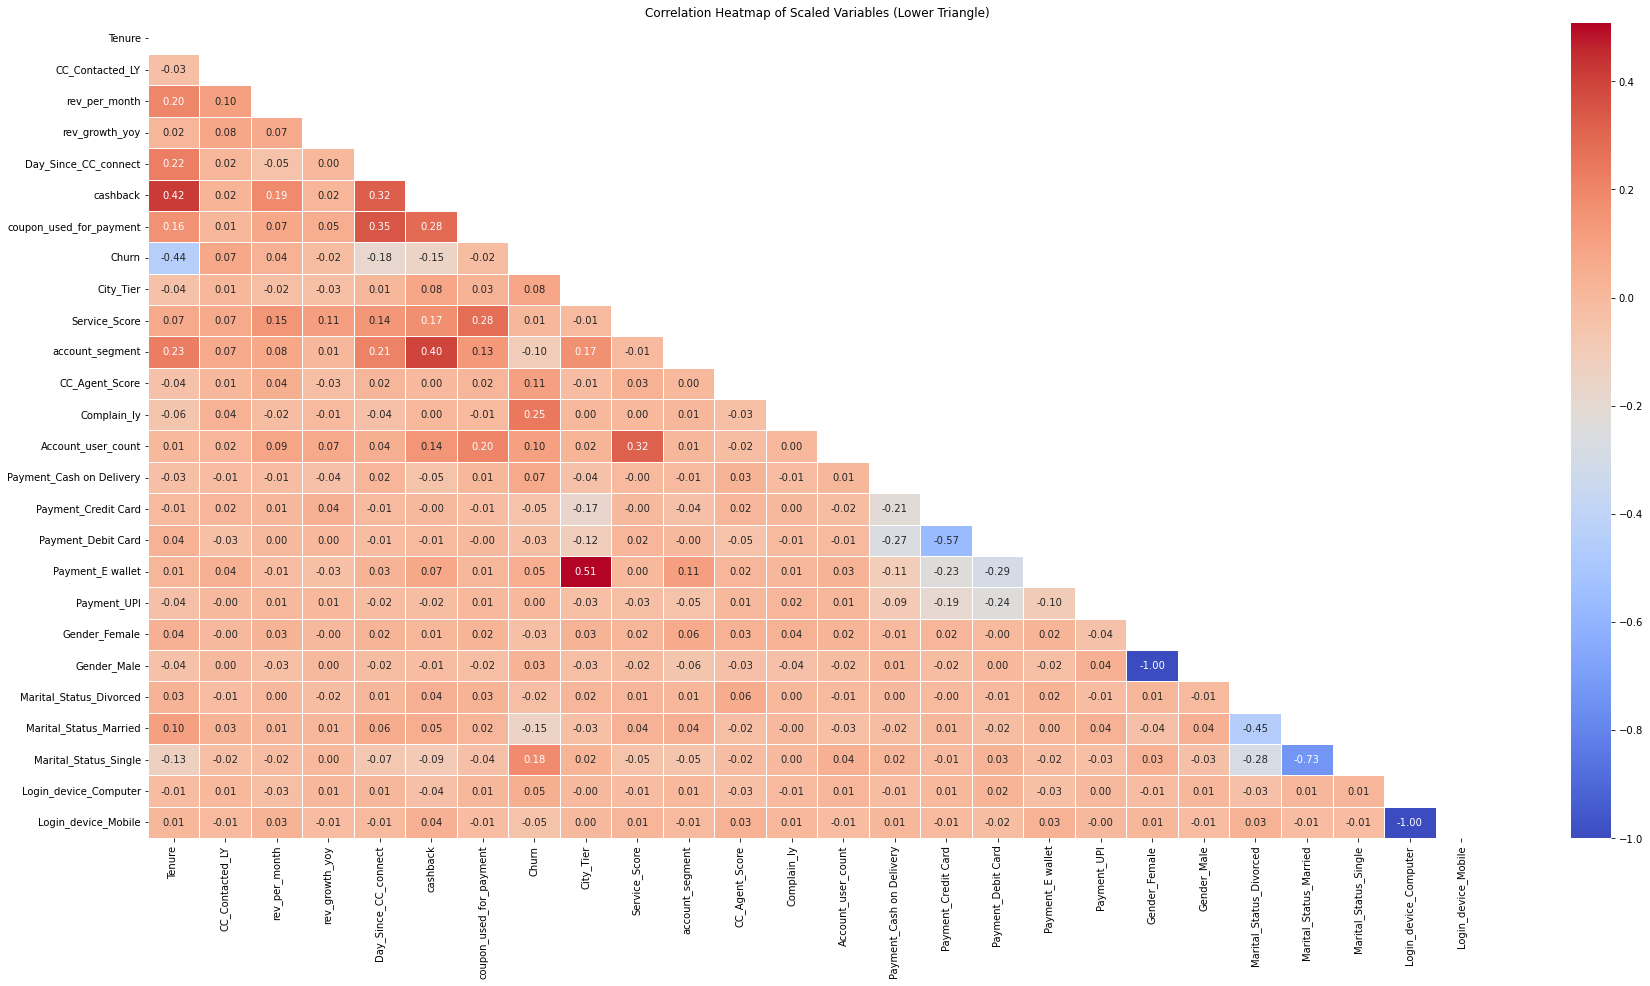

In [144]:

correlation_matrix = df_encoded.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title("Correlation Heatmap of Scaled Variables (Lower Triangle)")
plt.show()


# Standard Scailing 

In [145]:
from sklearn.preprocessing import StandardScaler

# Defining continuous columns
continuous_cols = ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']

df_continuous = df_encoded[continuous_cols]

# Initialize the StandardScaler
scaler = StandardScaler()
df_continuous_scaled = scaler.fit_transform(df_continuous)

df_continuous_scaled = pd.DataFrame(df_continuous_scaled, columns=continuous_cols)
df_scaled = pd.concat([df_continuous_scaled, df_encoded.drop(continuous_cols, axis=1)], axis=1)


In [146]:
df_scaled.head()

Tenure  CC_Contacted_LY  rev_per_month  rev_growth_yoy  \
0 -0.361753        -1.969009       1.189540       -1.609808   
1 -1.854829        -1.411937       0.724124       -0.236250   
2 -1.854829         1.329515       0.445614       -0.544393   
3 -1.854829        -0.136564       0.969787        1.699671   
4 -1.854829        -0.596825      -0.721590       -1.609808   

   coupon_used_for_payment  Day_Since_CC_connect  cashback  Churn  City_Tier  \
0                -0.431239              0.421668 -0.337449    1.0        3.0   
1                -1.338515             -2.081514 -1.473097    1.0        1.0   
2                -1.338515             -0.144788 -0.204479    1.0        1.0   
3                -1.338515             -0.144788 -1.053652    1.0        3.0   
4                -0.431239             -0.144788 -1.191245    1.0        1.0   

   Service_Score  account_segment  CC_Agent_Score  Complain_ly  \
0            3.0              3.0             2.0          1.0   
1            3.0              2.0             3.0          1.0   
2            2.0              2.0             3.0          1.0   
3            2.0              3.0             5.0          0.0   
4            2.0              2.0             5.0          0.0   

   Account_user_count  Payment_Cash on Delivery  Payment_Credit Card  \
0                 3.0                       0.0                  0.0   
1                 4.0                       0.0                  0.0   
2                 4.0                       0.0                  0.0   
3                 4.0                       0.0                  0.0   
4                 3.0                       0.0                  1.0   

   Payment_Debit Card  Payment_E wallet  Payment_UPI  Gender_Female  \
0                 1.0               0.0          0.0            1.0   
1                 0.0               0.0          1.0            0.0   
2                 1.0               0.0          0.0            0.0   
3                 1.0               0.0          0.0            0.0   
4                 0.0               0.0          0.0            0.0   

   Gender_Male  Marital_Status_Divorced  Marital_Status_Married  \
0          0.0                      0.0                     0.0   
1          1.0                      0.0                     0.0   
2          1.0                      0.0                     0.0   
3          1.0                      0.0                     0.0   
4          1.0                      0.0                     0.0   

   Marital_Status_Single  Login_device_Computer  Login_device_Mobile  
0                    1.0                    0.0                  1.0  
1                    1.0                    0.0                  1.0  
2                    1.0                    0.0                  1.0  
3                    1.0                    0.0                  1.0  
4                    1.0                    0.0                  1.0

In [147]:
df_scaled.shape

(11260, 26)

In [148]:
X = df_scaled.drop('Churn', axis=1)
y = df_scaled['Churn']

In [149]:
X.columns

Index(['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy',
       'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback',
       'City_Tier', 'Service_Score', 'account_segment', 'CC_Agent_Score',
       'Complain_ly', 'Account_user_count', 'Payment_Cash on Delivery',
       'Payment_Credit Card', 'Payment_Debit Card', 'Payment_E wallet',
       'Payment_UPI', 'Gender_Female', 'Gender_Male',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Login_device_Computer',
       'Login_device_Mobile'],
      dtype='object')

In [150]:
X.shape

(11260, 25)

In [151]:
# Concatenate the scaled continuous variables with the target variable 'Churn'
df_scaled = pd.concat([X, y], axis=1)

# VIF

In [152]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif


In [153]:
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
24       Login_device_Mobile       inf
14       Payment_Credit Card       inf
23     Login_device_Computer       inf
22     Marital_Status_Single       inf
21    Marital_Status_Married       inf
20   Marital_Status_Divorced       inf
19               Gender_Male       inf
18             Gender_Female       inf
17               Payment_UPI       inf
16          Payment_E wallet       inf
15        Payment_Debit Card       inf
13  Payment_Cash on Delivery       inf
6                   cashback  1.555314
7                  City_Tier  1.395960
0                     Tenure  1.309279
5       Day_Since_CC_connect  1.271953
4    coupon_used_for_payment  1.270187
9            account_segment  1.257874
8              Service_Score  1.222777
12        Account_user_count  1.154175
2              rev_per_month  1.116758
1            CC_Contacted_LY  1.034333
3             rev_growth_yoy  1.028537
10            CC_Agent_Score  1.018709
11               Complain_ly  1.011439

In [154]:
X = X.drop('Login_device_Mobile', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
16          Payment_E wallet       inf
18             Gender_Female       inf
22     Marital_Status_Single       inf
21    Marital_Status_Married       inf
15        Payment_Debit Card       inf
14       Payment_Credit Card       inf
17               Payment_UPI       inf
13  Payment_Cash on Delivery       inf
20   Marital_Status_Divorced       inf
19               Gender_Male       inf
6                   cashback  1.555314
7                  City_Tier  1.395960
0                     Tenure  1.309279
5       Day_Since_CC_connect  1.271953
4    coupon_used_for_payment  1.270187
9            account_segment  1.257874
8              Service_Score  1.222777
12        Account_user_count  1.154175
2              rev_per_month  1.116758
1            CC_Contacted_LY  1.034333
3             rev_growth_yoy  1.028537
10            CC_Agent_Score  1.018709
11               Complain_ly  1.011439
23     Login_device_Computer  1.007782

In [155]:
X = X.drop('Payment_E wallet', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
20    Marital_Status_Married       inf
19   Marital_Status_Divorced       inf
18               Gender_Male       inf
17             Gender_Female       inf
21     Marital_Status_Single       inf
15        Payment_Debit Card  3.705710
14       Payment_Credit Card  3.558149
13  Payment_Cash on Delivery  1.966453
16               Payment_UPI  1.796438
6                   cashback  1.555314
7                  City_Tier  1.395960
0                     Tenure  1.309279
5       Day_Since_CC_connect  1.271953
4    coupon_used_for_payment  1.270187
9            account_segment  1.257874
8              Service_Score  1.222777
12        Account_user_count  1.154175
2              rev_per_month  1.116758
1            CC_Contacted_LY  1.034333
3             rev_growth_yoy  1.028537
10            CC_Agent_Score  1.018709
11               Complain_ly  1.011439
22     Login_device_Computer  1.007782

In [156]:
X = X.drop('Marital_Status_Married', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
18               Gender_Male  41.282831
17             Gender_Female  27.981066
15        Payment_Debit Card   3.705710
14       Payment_Credit Card   3.558149
13  Payment_Cash on Delivery   1.966453
16               Payment_UPI   1.796438
6                   cashback   1.555314
7                  City_Tier   1.395960
0                     Tenure   1.309279
5       Day_Since_CC_connect   1.271953
4    coupon_used_for_payment   1.270187
9            account_segment   1.257874
8              Service_Score   1.222777
12        Account_user_count   1.154175
20     Marital_Status_Single   1.119845
2              rev_per_month   1.116758
19   Marital_Status_Divorced   1.093047
1            CC_Contacted_LY   1.034333
3             rev_growth_yoy   1.028537
10            CC_Agent_Score   1.018709
11               Complain_ly   1.011439
21     Login_device_Computer   1.007782

In [157]:
X = X.drop('Gender_Male', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
8              Service_Score  16.862632
12        Account_user_count  14.700797
9            account_segment   8.540186
10            CC_Agent_Score   5.600790
7                  City_Tier   4.896730
15        Payment_Debit Card   4.599178
14       Payment_Credit Card   3.742355
13  Payment_Cash on Delivery   1.801176
17             Gender_Female   1.672729
19     Marital_Status_Single   1.617405
16               Payment_UPI   1.601717
6                   cashback   1.496675
11               Complain_ly   1.388304
20     Login_device_Computer   1.372596
0                     Tenure   1.302466
18   Marital_Status_Divorced   1.277161
5       Day_Since_CC_connect   1.270927
4    coupon_used_for_payment   1.227877
2              rev_per_month   1.107594
1            CC_Contacted_LY   1.033515
3             rev_growth_yoy   1.024692

In [158]:
X = X.drop('Service_Score', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
11        Account_user_count  11.010555
8            account_segment   8.455667
9             CC_Agent_Score   5.410915
7                  City_Tier   4.659274
14        Payment_Debit Card   4.149955
13       Payment_Credit Card   3.404608
12  Payment_Cash on Delivery   1.717244
16             Gender_Female   1.670915
18     Marital_Status_Single   1.617063
15               Payment_UPI   1.543834
6                   cashback   1.496219
10               Complain_ly   1.384870
19     Login_device_Computer   1.372442
0                     Tenure   1.301901
17   Marital_Status_Divorced   1.276144
5       Day_Since_CC_connect   1.267810
4    coupon_used_for_payment   1.212492
2              rev_per_month   1.102803
1            CC_Contacted_LY   1.031418
3             rev_growth_yoy   1.020877

In [159]:
X = X.drop('Account_user_count', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
8            account_segment  8.107877
9             CC_Agent_Score  5.195283
7                  City_Tier  4.099352
13        Payment_Debit Card  3.325281
12       Payment_Credit Card  2.768449
15             Gender_Female  1.664169
17     Marital_Status_Single  1.601054
11  Payment_Cash on Delivery  1.533839
6                   cashback  1.495057
14               Payment_UPI  1.385052
10               Complain_ly  1.379915
18     Login_device_Computer  1.367703
0                     Tenure  1.300894
16   Marital_Status_Divorced  1.273012
5       Day_Since_CC_connect  1.265533
4    coupon_used_for_payment  1.191430
2              rev_per_month  1.101144
1            CC_Contacted_LY  1.031412
3             rev_growth_yoy  1.018118

In [160]:
X = X.drop('account_segment', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
8             CC_Agent_Score  4.982709
7                  City_Tier  3.130439
12        Payment_Debit Card  2.669670
11       Payment_Credit Card  2.286970
14             Gender_Female  1.647221
16     Marital_Status_Single  1.599126
6                   cashback  1.393368
10  Payment_Cash on Delivery  1.388134
9                Complain_ly  1.373261
17     Login_device_Computer  1.362605
13               Payment_UPI  1.294153
0                     Tenure  1.286842
15   Marital_Status_Divorced  1.272004
5       Day_Since_CC_connect  1.257081
4    coupon_used_for_payment  1.191024
2              rev_per_month  1.101055
1            CC_Contacted_LY  1.026249
3             rev_growth_yoy  1.018076

In [161]:
X = X.drop('CC_Agent_Score', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
7                  City_Tier  2.634244
11        Payment_Debit Card  2.027588
10       Payment_Credit Card  1.713547
13             Gender_Female  1.631843
15     Marital_Status_Single  1.595491
6                   cashback  1.393362
8                Complain_ly  1.372614
16     Login_device_Computer  1.362332
0                     Tenure  1.285722
14   Marital_Status_Divorced  1.259128
5       Day_Since_CC_connect  1.256007
9   Payment_Cash on Delivery  1.220723
4    coupon_used_for_payment  1.191023
12               Payment_UPI  1.166026
2              rev_per_month  1.098425
1            CC_Contacted_LY  1.025961
3             rev_growth_yoy  1.017203

# Class Imbalance 

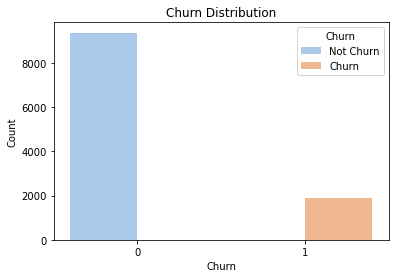

In [162]:
churn_values = [0, 1]

sns.countplot(data=df, x='Churn', palette='pastel', hue='Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.xticks(ticks=[0, 1], labels=churn_values)
plt.legend(title='Churn', labels=['Not Churn', 'Churn'])
plt.show()


In [163]:
df['Churn'].value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

In [164]:
df['Churn'].value_counts(normalize=True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

# Clustering 

# Clustering: Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

In [165]:
model= pd.concat([X,y], axis=1)

In [166]:
model1=pd.concat([X,y], axis=1)

In [167]:
model

Tenure  CC_Contacted_LY  rev_per_month  rev_growth_yoy  \
0     -0.361753        -1.969009       1.189540       -1.609808   
1     -1.854829        -1.411937       0.724124       -0.236250   
2     -1.854829         1.329515       0.445614       -0.544393   
3     -1.854829        -0.136564       0.969787        1.699671   
4     -1.854829        -0.596825      -0.721590       -1.609808   
...         ...              ...            ...             ...   
11255  0.369700         1.598527       1.189540        0.829164   
11256  0.593426         0.358063       0.724124        0.053207   
11257 -1.211796        -0.279623       0.724124        1.496467   
11258  1.093453        -0.774250       0.724124        0.053207   
11259  0.183537         0.667865       0.124098       -0.873805   

       coupon_used_for_payment  Day_Since_CC_connect  cashback  City_Tier  \
0                    -0.431239              0.421668 -0.337449        3.0   
1                    -1.338515             -2.081514 -1.473097        1.0   
2                    -1.338515             -0.144788 -0.204479        1.0   
3                    -1.338515             -0.144788 -1.053652        3.0   
4                    -0.431239             -0.144788 -1.191245        1.0   
...                        ...                   ...       ...        ...   
11255                -0.431239              0.166955 -0.498604        1.0   
11256                -0.431239              0.988123  1.085263        1.0   
11257                -0.431239              0.166955  0.393206        1.0   
11258                 0.476038              1.135318  0.140800        3.0   
11259                 0.476038             -0.144788  0.029458        1.0   

       Complain_ly  Payment_Cash on Delivery  Payment_Credit Card  \
0              1.0                       0.0                  0.0   
1              1.0                       0.0                  0.0   
2              1.0                       0.0                  0.0   
3              0.0                       0.0                  0.0   
4              0.0                       0.0                  1.0   
...            ...                       ...                  ...   
11255          0.0                       0.0                  1.0   
11256          0.0                       0.0                  1.0   
11257          1.0                       0.0                  0.0   
11258          0.0                       0.0                  1.0   
11259          0.0                       0.0                  1.0   

       Payment_Debit Card  Payment_UPI  Gender_Female  \
0                     1.0          0.0            1.0   
1                     0.0          1.0            0.0   
2                     1.0          0.0            0.0   
3                     1.0          0.0            0.0   
4                     0.0          0.0            0.0   
...                   ...          ...            ...   
11255                 0.0          0.0            0.0   
11256                 0.0          0.0            0.0   
11257                 1.0          0.0            0.0   
11258                 0.0          0.0            0.0   
11259                 0.0          0.0            0.0   

       Marital_Status_Divorced  Marital_Status_Single  Login_device_Computer  \
0                          0.0                    1.0                    0.0   
1                          0.0                    1.0                    0.0   
2                          0.0                    1.0                    0.0   
3                          0.0                    1.0                    0.0   
4                          0.0                    1.0                    0.0   
...                        ...                    ...                    ...   
11255                      0.0                    0.0                    1.0   
11256                      0.0                    0.0                    0.0   
11257                      0.0               

In [168]:
from scipy.cluster.hierarchy import dendrogram, linkage 

In [169]:
wardlink = linkage(model, method='ward', metric='euclidean')

# Elbow Plot:

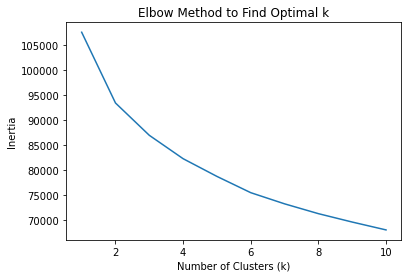

In [170]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(model)  
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal k')
plt.show()

In [171]:
k_means = KMeans(n_clusters = 3)
k_means.fit(model)
labels = k_means.labels_

In [172]:
model['C_kmeans']=labels
model.head()

Tenure  CC_Contacted_LY  rev_per_month  rev_growth_yoy  \
0 -0.361753        -1.969009       1.189540       -1.609808   
1 -1.854829        -1.411937       0.724124       -0.236250   
2 -1.854829         1.329515       0.445614       -0.544393   
3 -1.854829        -0.136564       0.969787        1.699671   
4 -1.854829        -0.596825      -0.721590       -1.609808   

   coupon_used_for_payment  Day_Since_CC_connect  cashback  City_Tier  \
0                -0.431239              0.421668 -0.337449        3.0   
1                -1.338515             -2.081514 -1.473097        1.0   
2                -1.338515             -0.144788 -0.204479        1.0   
3                -1.338515             -0.144788 -1.053652        3.0   
4                -0.431239             -0.144788 -1.191245        1.0   

   Complain_ly  Payment_Cash on Delivery  Payment_Credit Card  \
0          1.0                       0.0                  0.0   
1          1.0                       0.0                  0.0   
2          1.0                       0.0                  0.0   
3          0.0                       0.0                  0.0   
4          0.0                       0.0                  1.0   

   Payment_Debit Card  Payment_UPI  Gender_Female  Marital_Status_Divorced  \
0                 1.0          0.0            1.0                      0.0   
1                 0.0          1.0            0.0                      0.0   
2                 1.0          0.0            0.0                      0.0   
3                 1.0          0.0            0.0                      0.0   
4                 0.0          0.0            0.0                      0.0   

   Marital_Status_Single  Login_device_Computer  Churn  C_kmeans  
0                    1.0                    0.0    1.0         2  
1                    1.0                    0.0    1.0         1  
2                    1.0                    0.0    1.0         1  
3                    1.0                    0.0    1.0         1  
4                    1.0                    0.0    1.0         1

In [173]:
pd.crosstab(model['C_kmeans'],model['Churn'])

Churn      0.0   1.0
C_kmeans            
0         3156   321
1         2477  1234
2         3731   341

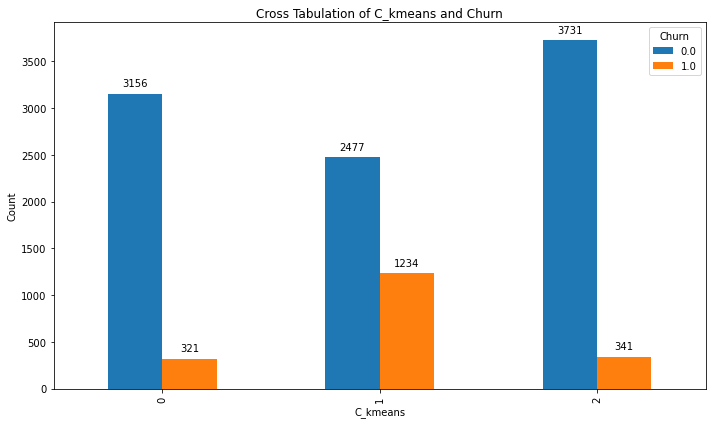

In [174]:
# Create a crosstab of 'C_kmeans' and 'Churn'
crosstab_data = pd.crosstab(model['C_kmeans'], model['Churn'])

# Plot the crosstab data as a bar plot with values on top
ax = crosstab_data.plot(kind='bar', figsize=(10, 6))
ax.set_title('Cross Tabulation of C_kmeans and Churn')
ax.set_xlabel('C_kmeans')
ax.set_ylabel('Count')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


In [175]:
model1.head()

Tenure  CC_Contacted_LY  rev_per_month  rev_growth_yoy  \
0 -0.361753        -1.969009       1.189540       -1.609808   
1 -1.854829        -1.411937       0.724124       -0.236250   
2 -1.854829         1.329515       0.445614       -0.544393   
3 -1.854829        -0.136564       0.969787        1.699671   
4 -1.854829        -0.596825      -0.721590       -1.609808   

   coupon_used_for_payment  Day_Since_CC_connect  cashback  City_Tier  \
0                -0.431239              0.421668 -0.337449        3.0   
1                -1.338515             -2.081514 -1.473097        1.0   
2                -1.338515             -0.144788 -0.204479        1.0   
3                -1.338515             -0.144788 -1.053652        3.0   
4                -0.431239             -0.144788 -1.191245        1.0   

   Complain_ly  Payment_Cash on Delivery  Payment_Credit Card  \
0          1.0                       0.0                  0.0   
1          1.0                       0.0                  0.0   
2          1.0                       0.0                  0.0   
3          0.0                       0.0                  0.0   
4          0.0                       0.0                  1.0   

   Payment_Debit Card  Payment_UPI  Gender_Female  Marital_Status_Divorced  \
0                 1.0          0.0            1.0                      0.0   
1                 0.0          1.0            0.0                      0.0   
2                 1.0          0.0            0.0                      0.0   
3                 1.0          0.0            0.0                      0.0   
4                 0.0          0.0            0.0                      0.0   

   Marital_Status_Single  Login_device_Computer  Churn  
0                    1.0                    0.0    1.0  
1                    1.0                    0.0    1.0  
2                    1.0                    0.0    1.0  
3                    1.0                    0.0    1.0  
4                    1.0                    0.0    1.0

# MILESTONE 2:

## Train and spilt 

In [176]:
from sklearn.model_selection import train_test_split

X = model1.drop('Churn', axis=1)
y = model1['Churn']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Verify the shape of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (7882, 17)
Shape of X_test: (3378, 17)
Shape of y_train: (7882,)
Shape of y_test: (3378,)


In [177]:
X_train.head()

Tenure  CC_Contacted_LY  rev_per_month  rev_growth_yoy  \
7580  0.450420         0.667865       0.724124       -0.236250   
5198  1.053971        -0.279623       0.445614       -1.227638   
1929  0.717303        -0.279623      -1.321615       -0.873805   
3427  0.717303        -0.279623       0.969787       -0.236250   
6249 -1.854829         0.667865       0.445614       -0.236250   

      coupon_used_for_payment  Day_Since_CC_connect  cashback  City_Tier  \
7580                -0.431239             -0.546695 -0.238310        1.0   
5198                -0.431239             -0.144788  0.139896        3.0   
1929                 1.836954              1.135318  2.003494        1.0   
3427                 0.476038             -0.546695  0.029226        1.0   
6249                -0.431239             -2.081514 -0.604074        1.0   

      Complain_ly  Payment_Cash on Delivery  Payment_Credit Card  \
7580          0.0                       0.0                  0.0   
5198          0.0                       0.0                  0.0   
1929          0.0                       0.0                  0.0   
3427          0.0                       0.0                  1.0   
6249          0.0                       0.0                  1.0   

      Payment_Debit Card  Payment_UPI  Gender_Female  Marital_Status_Divorced  \
7580                 1.0          0.0            0.0                      0.0   
5198                 0.0          0.0            0.0                      0.0   
1929                 1.0          0.0            0.0                      0.0   
3427                 0.0          0.0            1.0                      0.0   
6249                 0.0          0.0            1.0                      1.0   

      Marital_Status_Single  Login_device_Computer  
7580                    0.0                    0.0  
5198                    0.0                    0.0  
1929                    0.0                    1.0  
3427                    1.0                    0.0  
6249                    0.0                    0.0

In [178]:
X_test.head()

Tenure  CC_Contacted_LY  rev_per_month  rev_growth_yoy  \
784  -1.854829         1.399890      -1.321615       -1.227638   
6943 -1.854829         0.667865       0.124098        1.062116   
3709  0.369700         0.762204       0.445614       -0.544393   
6439 -1.854829        -0.967123      -0.256174        0.829164   
5310  0.281281         0.939629      -0.721590       -1.227638   

      coupon_used_for_payment  Day_Since_CC_connect  cashback  City_Tier  \
784                 -0.431239             -1.113151 -1.180615        1.0   
6943                -0.431239             -2.081514 -1.506775        3.0   
3709                 0.476038             -0.144788  0.176130        3.0   
6439                -0.431239             -1.113151 -1.471085        1.0   
5310                 0.476038              1.390030  0.076564        1.0   

      Complain_ly  Payment_Cash on Delivery  Payment_Credit Card  \
784           1.0                       0.0                  0.0   
6943          0.0                       0.0                  0.0   
3709          0.0                       0.0                  0.0   
6439          0.0                       0.0                  1.0   
5310          0.0                       0.0                  0.0   

      Payment_Debit Card  Payment_UPI  Gender_Female  Marital_Status_Divorced  \
784                  1.0          0.0            1.0                      0.0   
6943                 0.0          0.0            0.0                      0.0   
3709                 0.0          0.0            1.0                      1.0   
6439                 0.0          0.0            1.0                      0.0   
5310                 1.0          0.0            0.0                      0.0   

      Marital_Status_Single  Login_device_Computer  
784                     1.0                    0.0  
6943                    0.0                    1.0  
3709                    0.0                    0.0  
6439                    1.0                    0.0  
5310                    0.0                    0.0

# Logistic Regression Model: 

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
model1= LogisticRegression(random_state=1)


In [180]:
# Fit the model on the training data
model1.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [181]:
# Make predictions on the test data
y_pred = model1.predict(X_test)

In [182]:
ytest_predict_prob = model1.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.184364  0.815636
1  0.237914  0.762086
2  0.920824  0.079176
3  0.627640  0.372360
4  0.985926  0.014074

In [183]:
coef=model1.coef_
coef

array([[-1.41858302,  0.20635163,  0.45724909, -0.06701631,  0.33545997,
        -0.39408264,  0.07385134,  0.15696549,  1.60093743,  0.22986134,
        -0.7817163 , -0.53405212, -0.65190515, -0.25194872,  0.26153787,
         0.94718247,  0.41120939]])

In [184]:
feature_names=X_train.columns
feature_names

Index(['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy',
       'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback',
       'City_Tier', 'Complain_ly', 'Payment_Cash on Delivery',
       'Payment_Credit Card', 'Payment_Debit Card', 'Payment_UPI',
       'Gender_Female', 'Marital_Status_Divorced', 'Marital_Status_Single',
       'Login_device_Computer'],
      dtype='object')

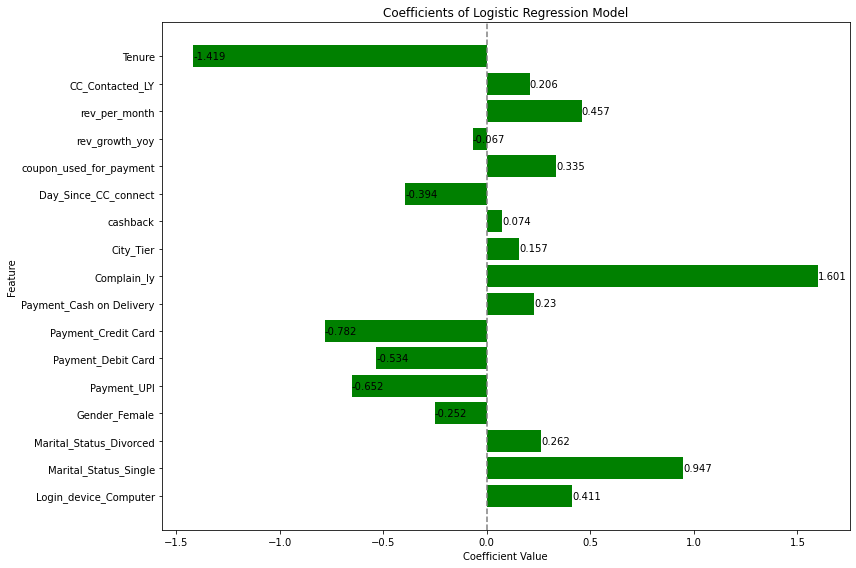

In [185]:
coef = model1.coef_[0]

# Get the feature names from X_train.columns
feature_names = X_train.columns

# Plot the important features using a bar plot
plt.figure(figsize=(12, 8))
bars = plt.barh(feature_names, coef, color='green')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Coefficients of Logistic Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()

# Add coefficient values on top of the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(bar.get_width(), 3), va='center')

plt.tight_layout()
plt.show()


In [186]:
# Make predictions on the training data
y_train_pred = model1.predict(X_train)

# Classification report for training data
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred))

Classification Report for Training Data:
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93      6556
         1.0       0.73      0.48      0.58      1326

    accuracy                           0.88      7882
   macro avg       0.82      0.72      0.76      7882
weighted avg       0.87      0.88      0.87      7882



In [187]:
# Make predictions on the test data
y_test_pred = model1.predict(X_test)

# Classification report for test data
print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_pred))

Classification Report for Test Data:
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      2808
         1.0       0.74      0.51      0.61       570

    accuracy                           0.89      3378
   macro avg       0.82      0.74      0.77      3378
weighted avg       0.88      0.89      0.88      3378



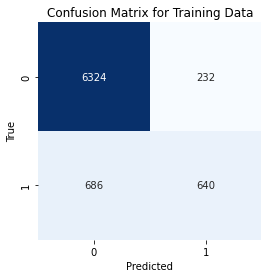

In [188]:
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Training Data')
plt.show()

In [189]:
cm_train 

array([[6324,  232],
       [ 686,  640]])

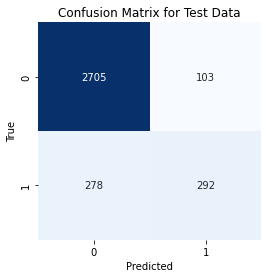

In [190]:
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix for the test data as a heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Test Data')
plt.show()

In [191]:
cm_test

array([[2705,  103],
       [ 278,  292]])

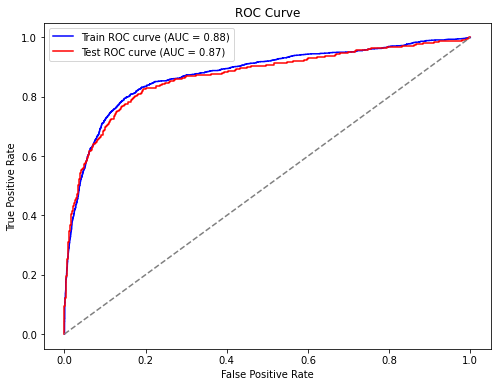

In [192]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the probabilities for positive class for both train and test data
y_train_prob = model1.predict_proba(X_train)[:, 1]
y_test_prob = model1.predict_proba(X_test)[:, 1]

# Calculate the ROC curve values for both train and test data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)

# Calculate the AUC score for both train and test data
auc_train = roc_auc_score(y_train, y_train_prob)
auc_test = roc_auc_score(y_test, y_test_prob)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Train ROC curve (AUC = {:.2f})'.format(auc_train), color='blue')
plt.plot(fpr_test, tpr_test, label='Test ROC curve (AUC = {:.2f})'.format(auc_test), color='red')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Logistic Regression with Hypertuning Parameter:

In [193]:
model2 = LogisticRegression(random_state=1)
model2

LogisticRegression(random_state=1)

In [194]:
# Define the hyperparameters and their potential values for tuning
hyperparameters = {
    'penalty': ['l1', 'l2'], 
    'C': [0.01, 0.1, 1.0, 10.0],  
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'saga'], 
    'class_weight': [None, 'balanced'],  
    'max_iter': [100, 200, 500],  
    'dual': [False, True]}

In [195]:
from sklearn.model_selection import GridSearchCV
# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(model2, hyperparameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=1),
             param_grid={'C': [0.01, 0.1, 1.0, 10.0],
                         'class_weight': [None, 'balanced'],
                         'dual': [False, True], 'max_iter': [100, 200, 500],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg', 'saga']},
             scoring='accuracy')

In [196]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'C': 0.1, 'class_weight': None, 'dual': False, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'} 

LogisticRegression(C=0.1, penalty='l1', random_state=1, solver='saga')


In [197]:
best_logreg = grid_search.best_estimator_

In [198]:
# Fit the best model on the training data
best_logreg.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', random_state=1, solver='saga')

In [199]:
y_pred_train = best_logreg.predict(X_train)
y_pred_test = best_logreg.predict(X_test)

In [200]:
y_pred_test 

array([1., 1., 0., ..., 1., 1., 0.])

In [201]:
coef1=best_logreg.coef_
coef1

array([[-1.36709238,  0.1872001 ,  0.43037009, -0.05271397,  0.3066026 ,
        -0.35962222,  0.04657324,  0.19466976,  1.51512801,  0.38115905,
        -0.44458697, -0.20978886, -0.20707328, -0.17762643,  0.10504587,
         0.83352813,  0.32069712]])

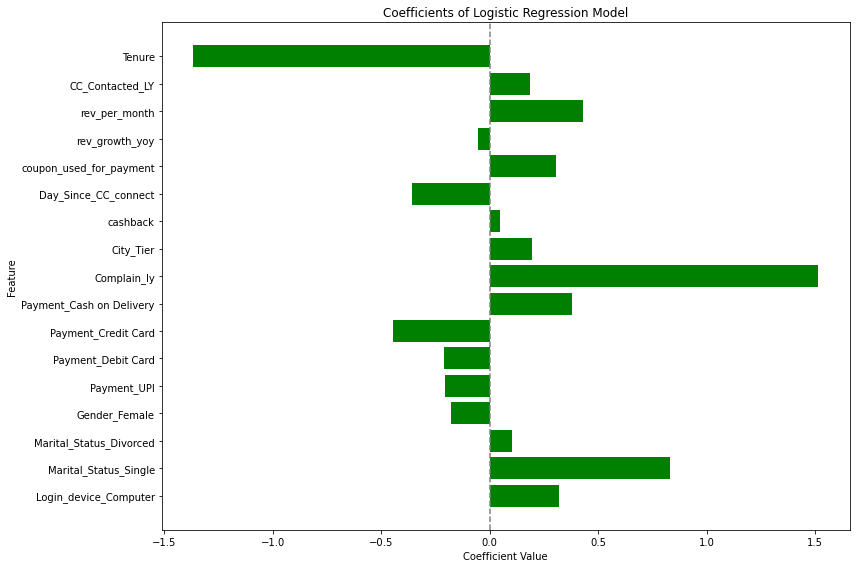

In [202]:
import matplotlib.pyplot as plt

coef = coef1[0]

# Get the feature names from X_train.columns
feature_names = X_train.columns

# Plot the important features using a bar plot
plt.figure(figsize=(12, 8))
plt.barh(feature_names, coef, color='green')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Coefficients of Logistic Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

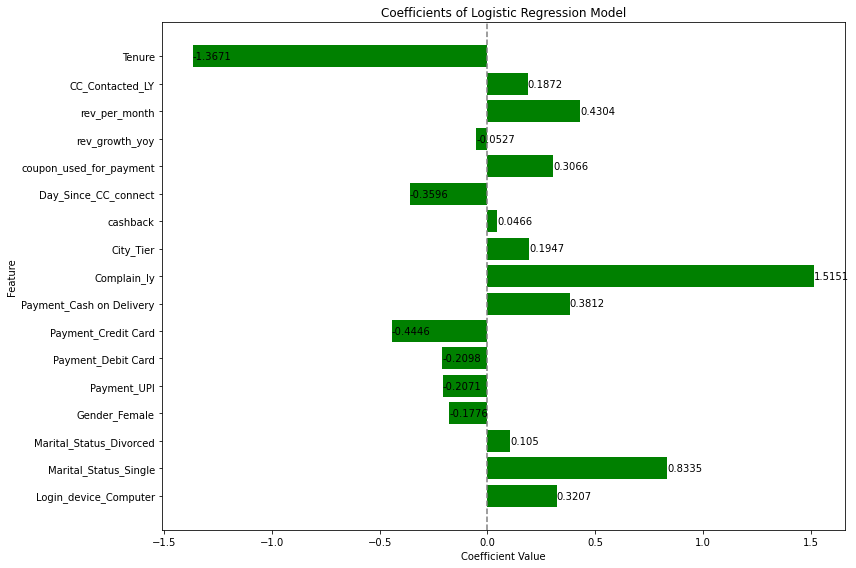

In [203]:
import matplotlib.pyplot as plt

coef = coef1[0]
feature_names = X_train.columns

plt.figure(figsize=(12, 8))
bars = plt.barh(feature_names, coef, color='green')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Coefficients of Logistic Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(bar.get_width(), 4), va='center')

plt.tight_layout()
plt.show()


In [204]:
print("Classification report for training data:")
print(classification_report(y_train, y_pred_train))

Classification report for training data:
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      6556
         1.0       0.74      0.48      0.58      1326

    accuracy                           0.88      7882
   macro avg       0.82      0.72      0.76      7882
weighted avg       0.88      0.88      0.87      7882



In [205]:
print("Classification report for test data:")
print(classification_report(y_test, y_pred_test))

Classification report for test data:
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      2808
         1.0       0.75      0.51      0.61       570

    accuracy                           0.89      3378
   macro avg       0.83      0.74      0.77      3378
weighted avg       0.88      0.89      0.88      3378



In [206]:
# Compute the confusion matrices
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

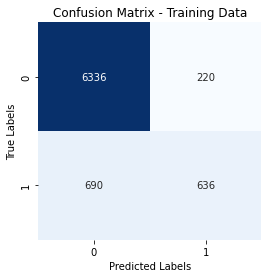

In [207]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

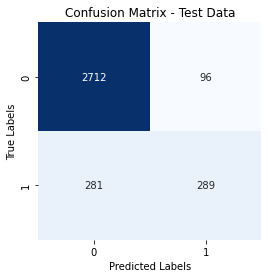

In [208]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

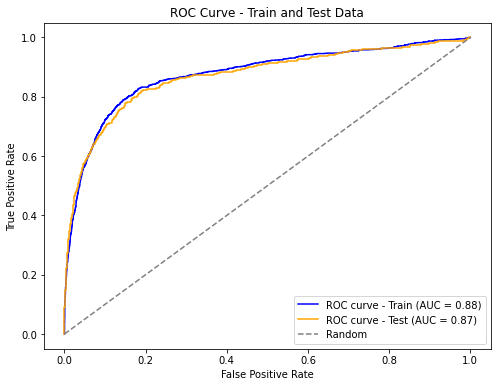

In [209]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the positive class (class 1)
y_pred_prob_train = best_logreg.predict_proba(X_train)[:, 1]
y_pred_prob_test = best_logreg.predict_proba(X_test)[:, 1]

# Compute the ROC curve and AUC for the training data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_prob_train)
roc_auc_train = roc_auc_score(y_train, y_pred_prob_train)

# Compute the ROC curve and AUC for the test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_prob_test)
roc_auc_test = roc_auc_score(y_test, y_pred_prob_test)

# Plot the ROC curves for both training and test data
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='ROC curve - Train (AUC = {:.2f})'.format(roc_auc_train), color='blue')
plt.plot(fpr_test, tpr_test, label='ROC curve - Test (AUC = {:.2f})'.format(roc_auc_test), color='orange')
plt.plot([0, 1], [0, 1], 'k--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Train and Test Data')
plt.legend(loc='lower right')
plt.show()

# Logistic Regression: with SMOTE

In [210]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [211]:
#Build and fit the Logistic Regression model on the oversampled training data
model3 = LogisticRegression(random_state=1)
model3.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=1)

In [212]:
X_train_resampled.shape

(13112, 17)

In [213]:
y_pred_test = model3.predict(X_test)
y_pred_test

array([1., 1., 0., ..., 1., 1., 1.])

In [214]:
coef2=best_logreg.coef_
coef2

array([[-1.36709238,  0.1872001 ,  0.43037009, -0.05271397,  0.3066026 ,
        -0.35962222,  0.04657324,  0.19466976,  1.51512801,  0.38115905,
        -0.44458697, -0.20978886, -0.20707328, -0.17762643,  0.10504587,
         0.83352813,  0.32069712]])

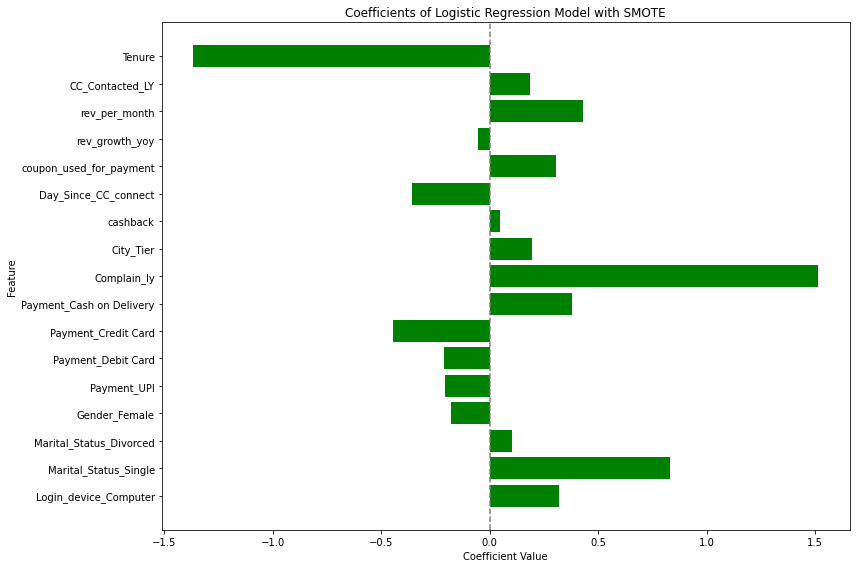

In [215]:
coef = coef2[0]

# Get the feature names from X_train.columns
feature_names = X_train.columns

# Plot the important features using a bar plot
plt.figure(figsize=(12, 8))
plt.barh(feature_names, coef, color='green')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Coefficients of Logistic Regression Model with SMOTE')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

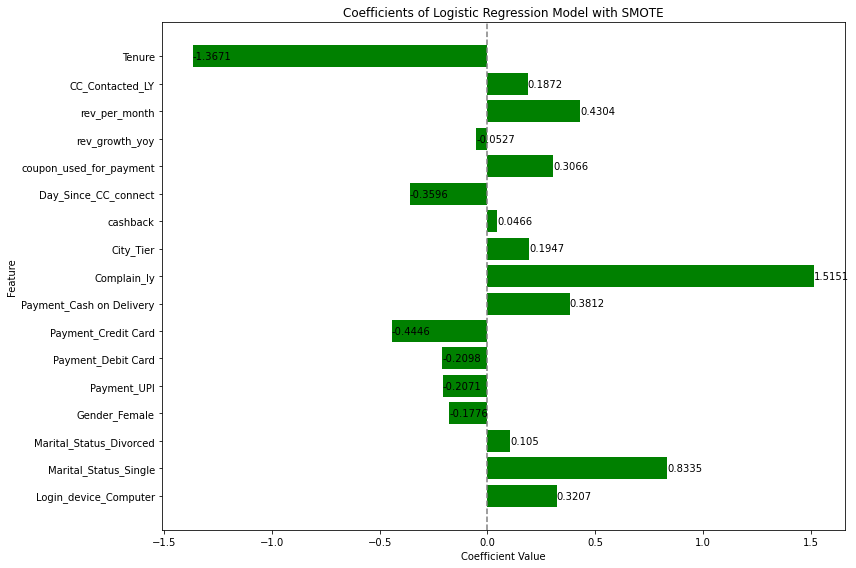

In [216]:

coef = coef2[0]
feature_names = X_train.columns

plt.figure(figsize=(12, 8))
bars = plt.barh(feature_names, coef, color='green')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Coefficients of Logistic Regression Model with SMOTE')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(bar.get_width(), 4), va='center')

plt.tight_layout()
plt.show()


In [217]:
y_pred_train = model3.predict(X_train_resampled)
y_pred_test = model3.predict(X_test)

In [218]:
# Classification Report-Train
print("Classification Report (Train Data):\n", classification_report(y_train_resampled, y_pred_train))

Classification Report (Train Data):
               precision    recall  f1-score   support

         0.0       0.83      0.82      0.83      6556
         1.0       0.82      0.84      0.83      6556

    accuracy                           0.83     13112
   macro avg       0.83      0.83      0.83     13112
weighted avg       0.83      0.83      0.83     13112



In [219]:
# Classification Report-Test
print("Classification Report (Test Data):\n", classification_report(y_test, y_pred_test))

Classification Report (Test Data):
               precision    recall  f1-score   support

         0.0       0.95      0.83      0.89      2808
         1.0       0.49      0.80      0.60       570

    accuracy                           0.82      3378
   macro avg       0.72      0.81      0.75      3378
weighted avg       0.87      0.82      0.84      3378



Confusion Matrix (Train Data):
 [[5366 1190]
 [1081 5475]]


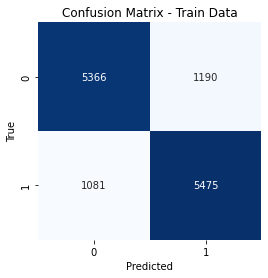

In [220]:

conf_matrix_train = confusion_matrix(y_train_resampled, y_pred_train)
print("Confusion Matrix (Train Data):\n", conf_matrix_train)

# Plot confusion matrix for train data
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Train Data')
plt.show()



Confusion Matrix (Test Data):
 [[2325  483]
 [ 114  456]]


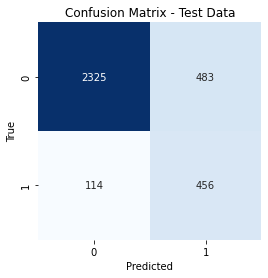

In [221]:

conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix (Test Data):\n", conf_matrix_test)

# Plot confusion matrix for test data
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Data')
plt.show()


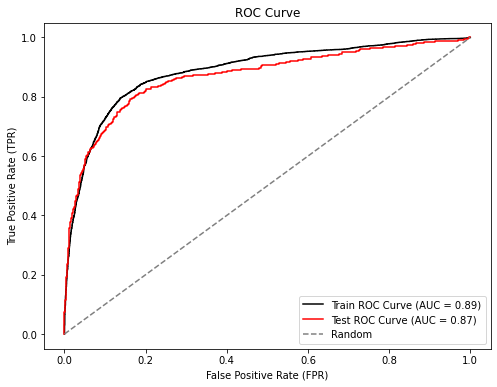

In [222]:

y_prob_train = model3.predict_proba(X_train_resampled)[:, 1]
y_prob_test = model3.predict_proba(X_test)[:, 1]


fpr_train, tpr_train, thresholds_train = roc_curve(y_train_resampled, y_prob_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_prob_test)


auc_train = roc_auc_score(y_train_resampled, y_prob_train)
auc_test = roc_auc_score(y_test, y_prob_test)


plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {auc_train:.2f})', color='black')
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {auc_test:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--', color='gray', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# Linear Discriminant Analysis Model (LDA):

In [223]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [224]:
model4= LinearDiscriminantAnalysis()
model4

LinearDiscriminantAnalysis()

In [225]:
model4.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [226]:
y_pred_test = model4.predict(X_test)
y_pred_train = model4.predict(X_train)

In [227]:
ytest_predict_prob = model4.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.115998  0.884002
1  0.205959  0.794041
2  0.945248  0.054752
3  0.544789  0.455211
4  0.991496  0.008504

In [228]:
coef=model4.coef_
coef

array([[-1.64548132,  0.16426714,  0.44861915, -0.05023306,  0.25305415,
        -0.40455082,  0.1074673 ,  0.14055764,  1.9117646 ,  0.32940228,
        -0.89720464, -0.64382783, -0.79050549, -0.20180981,  0.24059533,
         1.11024639,  0.44382469]])

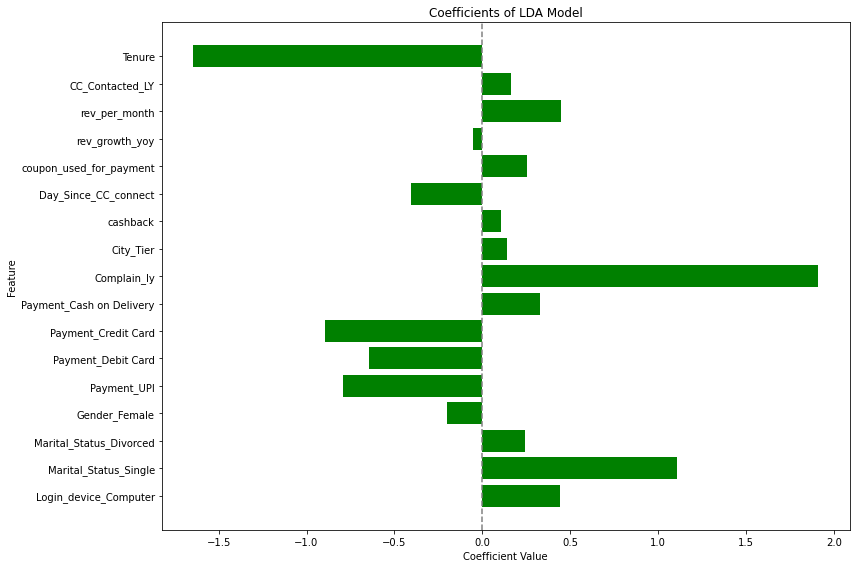

In [229]:
coef = model4.coef_[0]

# Get the feature names from X_train.columns
feature_names = X_train.columns

# Plot the important features using a bar plot
plt.figure(figsize=(12, 8))
plt.barh(feature_names, coef, color='green')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Coefficients of LDA Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

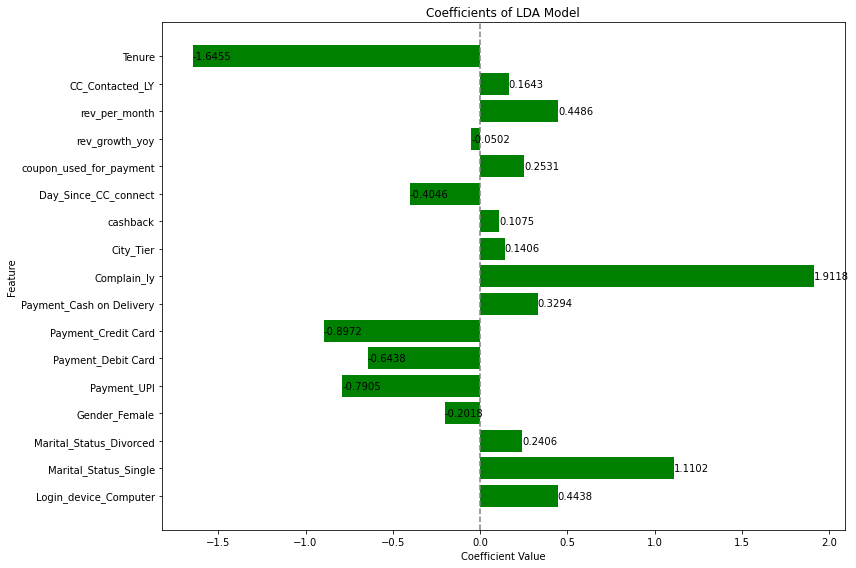

In [230]:
coef = model4.coef_[0]
feature_names = X_train.columns

plt.figure(figsize=(12, 8))
bars = plt.barh(feature_names, coef, color='green')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Coefficients of LDA Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(bar.get_width(), 4), va='center')

plt.tight_layout()
plt.show()


In [231]:
print("Classification Report for Train Data:")
print(classification_report(y_train, y_pred_train))

Classification Report for Train Data:
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      6556
         1.0       0.71      0.53      0.61      1326

    accuracy                           0.88      7882
   macro avg       0.81      0.74      0.77      7882
weighted avg       0.88      0.88      0.88      7882



In [232]:
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_pred_test))


Classification Report for Test Data:
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      2808
         1.0       0.72      0.56      0.63       570

    accuracy                           0.89      3378
   macro avg       0.82      0.76      0.78      3378
weighted avg       0.88      0.89      0.88      3378



In [233]:
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

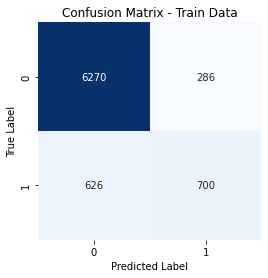

In [234]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Train Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

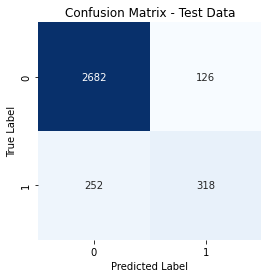

In [235]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

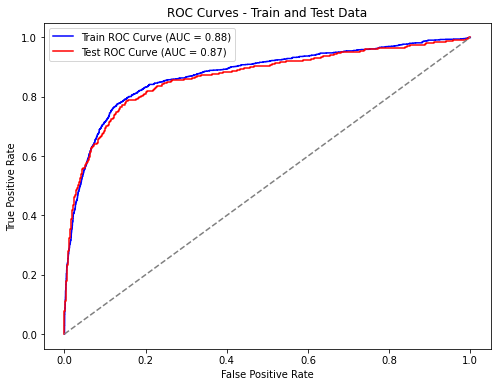

AUC Score - Train Data: 0.8758868943926188
AUC Score - Test Data: 0.867137127005548


In [236]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob_train = model4.predict_proba(X_train)[:, 1]
y_prob_test = model4.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_prob_train)
auc_train = roc_auc_score(y_train, y_prob_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_prob_test)
auc_test = roc_auc_score(y_test, y_prob_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {auc_train:.2f})', color='b')
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {auc_test:.2f})', color='r')
plt.plot([0, 1], [0, 1], 'k--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Train and Test Data')
plt.legend()
plt.show()

print("AUC Score - Train Data:", auc_train)
print("AUC Score - Test Data:", auc_test)

# Linear Discriminant Analysis Model (LDA): with Hyper tuning

In [237]:
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model5 = LinearDiscriminantAnalysis()

In [238]:
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],  
    'shrinkage': [None, 'auto', 0.0, 0.5, 1.0]  
}

In [239]:
grid_search = GridSearchCV(model5, param_grid, cv=5, scoring='accuracy')

In [240]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(),
             param_grid={'shrinkage': [None, 'auto', 0.0, 0.5, 1.0],
                         'solver': ['svd', 'lsqr', 'eigen']},
             scoring='accuracy')

In [241]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'shrinkage': 'auto', 'solver': 'lsqr'}


In [242]:
best_lda_model = grid_search.best_estimator_
best_lda_model

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')

In [243]:
coef=best_lda_model.coef_
coef

array([[-1.63039511,  0.167478  ,  0.43923446, -0.04852105,  0.24679449,
        -0.40272453,  0.09298358,  0.15942558,  1.90499229,  0.41792106,
        -0.80618489, -0.55547512, -0.68754865, -0.19859111,  0.23036282,
         1.10677276,  0.43750471]])

In [244]:
X_train.columns

Index(['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy',
       'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback',
       'City_Tier', 'Complain_ly', 'Payment_Cash on Delivery',
       'Payment_Credit Card', 'Payment_Debit Card', 'Payment_UPI',
       'Gender_Female', 'Marital_Status_Divorced', 'Marital_Status_Single',
       'Login_device_Computer'],
      dtype='object')

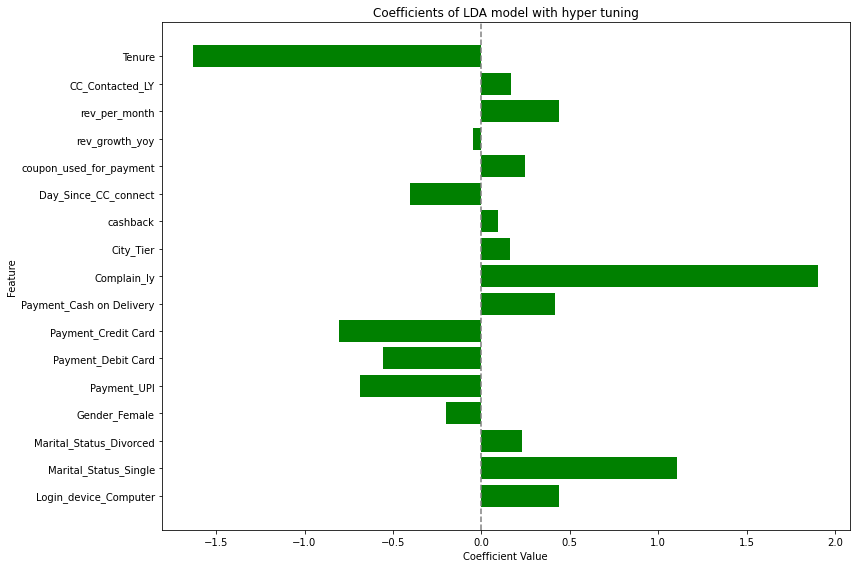

In [245]:
coef = best_lda_model.coef_[0]

# Get the feature names from X_train.columns
feature_names = X_train.columns

# Plot the important features using a bar plot
plt.figure(figsize=(12, 8))
plt.barh(feature_names, coef, color='green')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Coefficients of LDA model with hyper tuning')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

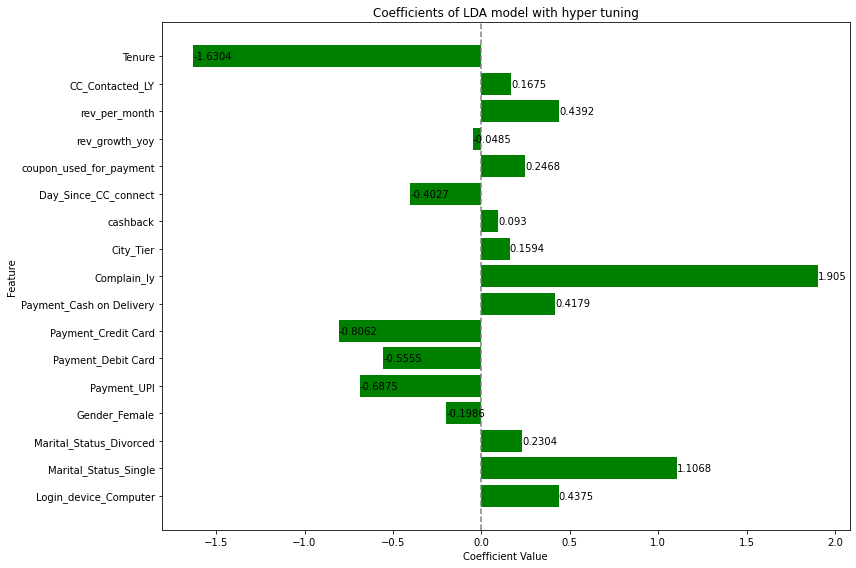

In [246]:
coef = best_lda_model.coef_[0]
feature_names = X_train.columns

plt.figure(figsize=(12, 8))
bars = plt.barh(feature_names, coef, color='green')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Coefficients of LDA model with hyper tuning')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(bar.get_width(), 4), va='center')

plt.tight_layout()
plt.show()


In [247]:
y_train_pred = best_lda_model.predict(X_train)

print("Classification Report for Train Data:")
print(classification_report(y_train, y_train_pred))

Classification Report for Train Data:
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      6556
         1.0       0.71      0.53      0.61      1326

    accuracy                           0.88      7882
   macro avg       0.81      0.74      0.77      7882
weighted avg       0.88      0.88      0.88      7882



In [248]:
y_test_pred = best_lda_model.predict(X_test)

print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_pred))

Classification Report for Test Data:
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      2808
         1.0       0.71      0.55      0.62       570

    accuracy                           0.89      3378
   macro avg       0.81      0.75      0.78      3378
weighted avg       0.88      0.89      0.88      3378



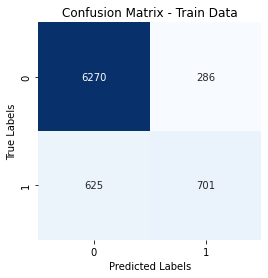

In [249]:
confusion_train = confusion_matrix(y_train, y_train_pred)

# Plot the confusion matrix for the training data
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Train Data')
plt.show()

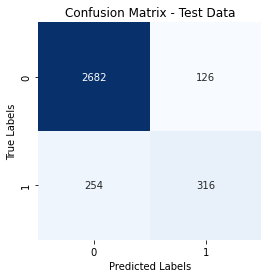

In [250]:
confusion_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(confusion_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Test Data')
plt.show()

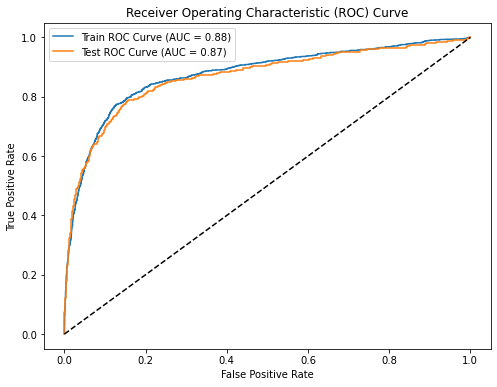

In [251]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_train_prob = best_lda_model.predict_proba(X_train)[:, 1]

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
roc_auc_train = roc_auc_score(y_train, y_train_prob)

y_test_prob = best_lda_model.predict_proba(X_test)[:, 1]

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)
roc_auc_test = roc_auc_score(y_test, y_test_prob)

# Plot the ROC curve for both train and test data on a single graph
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Linear Discriminant Analysis Model (LDA): with SMOTE

In [252]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [253]:
#Build and fit the Logistic Regression model on the oversampled training data
model6 = LinearDiscriminantAnalysis()
model6.fit(X_train_resampled, y_train_resampled)

LinearDiscriminantAnalysis()

In [254]:
X_train_resampled.shape

(13112, 17)

In [255]:
X_train.shape

(7882, 17)

In [256]:
y_pred_test = model6.predict(X_test)
y_pred_test

array([1., 1., 0., ..., 1., 1., 1.])

In [257]:
coef = model6.coef_
coef

array([[-1.67776333,  0.19679976,  0.49036024, -0.10873441,  0.34124973,
        -0.38584937,  0.09516193,  0.135903  ,  1.64741547,  0.27344334,
        -0.81845485, -0.60621099, -1.00371809, -0.23556464,  0.2683208 ,
         0.96539364,  0.30853475]])

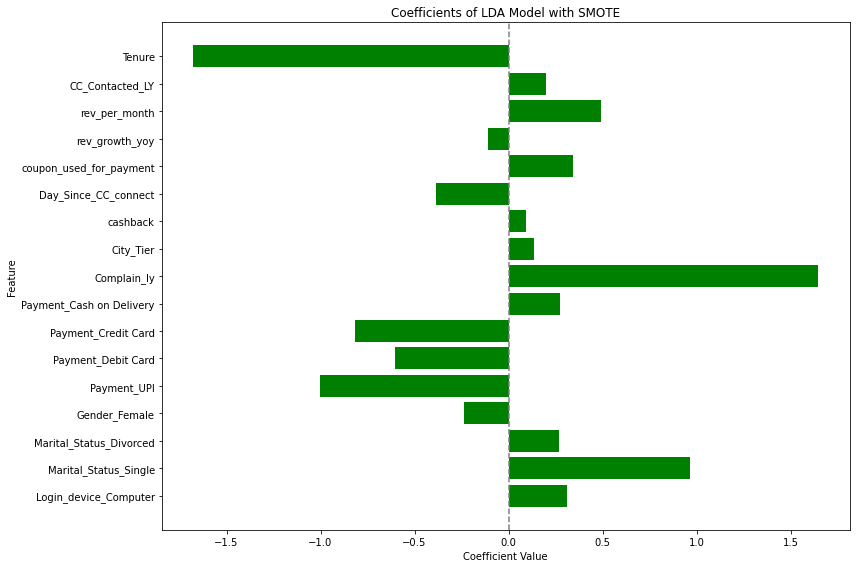

In [258]:
coef = coef[0]

# Get the feature names from X_train.columns
feature_names = X_train.columns

# Plot the important features using a bar plot
plt.figure(figsize=(12, 8))
plt.barh(feature_names, coef, color='green')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Coefficients of LDA Model with SMOTE')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [259]:
coef = model6.coef_
coef

array([[-1.67776333,  0.19679976,  0.49036024, -0.10873441,  0.34124973,
        -0.38584937,  0.09516193,  0.135903  ,  1.64741547,  0.27344334,
        -0.81845485, -0.60621099, -1.00371809, -0.23556464,  0.2683208 ,
         0.96539364,  0.30853475]])

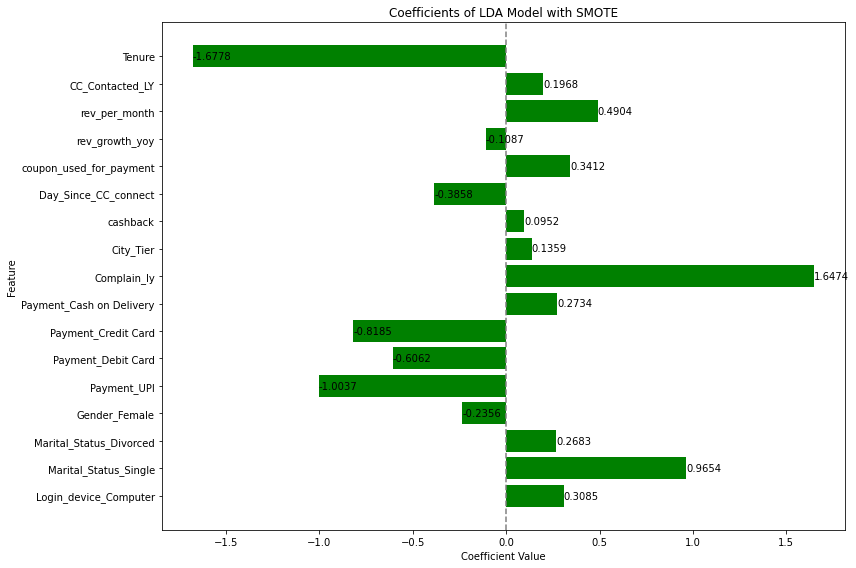

In [260]:
coef = coef[0]

# Get the feature names from X_train.columns
feature_names = X_train.columns

# Plot the important features using a bar plot
plt.figure(figsize=(12, 8))
bars = plt.barh(feature_names, coef, color='green')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Coefficients of LDA Model with SMOTE')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(bar.get_width(), 4), va='center')

plt.tight_layout()
plt.show()

In [261]:
y_pred_train = model6.predict(X_train_resampled)
y_pred_test = model6.predict(X_test)

In [262]:
# Classification Report-Train
print("Classification Report (Train Data):\n", classification_report(y_train_resampled, y_pred_train))

Classification Report (Train Data):
               precision    recall  f1-score   support

         0.0       0.84      0.82      0.83      6556
         1.0       0.82      0.84      0.83      6556

    accuracy                           0.83     13112
   macro avg       0.83      0.83      0.83     13112
weighted avg       0.83      0.83      0.83     13112



In [263]:
# Classification Report-Test
print("Classification Report (Test Data):\n", classification_report(y_test, y_pred_test))

Classification Report (Test Data):
               precision    recall  f1-score   support

         0.0       0.95      0.82      0.88      2808
         1.0       0.48      0.80      0.60       570

    accuracy                           0.82      3378
   macro avg       0.72      0.81      0.74      3378
weighted avg       0.87      0.82      0.83      3378



Confusion Matrix (Train Data):
 [[5383 1173]
 [1058 5498]]


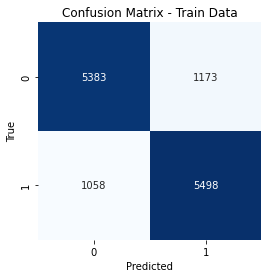

In [264]:
conf_matrix_train = confusion_matrix(y_train_resampled, y_pred_train)
print("Confusion Matrix (Train Data):\n", conf_matrix_train)

# Plot confusion matrix for train data
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Train Data')
plt.show()

Confusion Matrix (Test Data):
 [[2307  501]
 [ 113  457]]


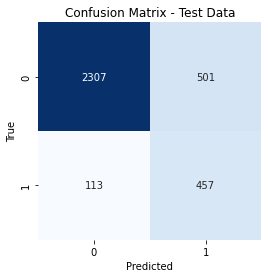

In [265]:
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix (Test Data):\n", conf_matrix_test)

# Plot confusion matrix for test data
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Data')
plt.show()


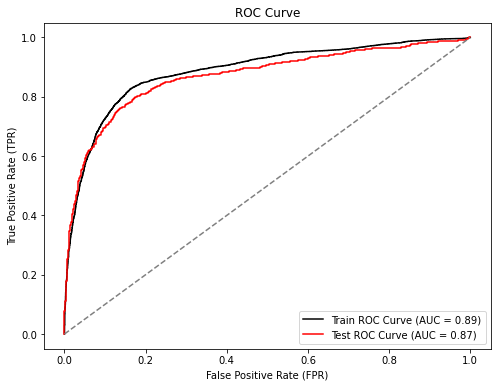

In [266]:
y_prob_train = model6.predict_proba(X_train_resampled)[:, 1]
y_prob_test = model6.predict_proba(X_test)[:, 1]


fpr_train, tpr_train, thresholds_train = roc_curve(y_train_resampled, y_prob_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_prob_test)


auc_train = roc_auc_score(y_train_resampled, y_prob_train)
auc_test = roc_auc_score(y_test, y_prob_test)


plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {auc_train:.2f})', color='black')
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {auc_test:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--', color='gray')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# KNN Model:

In [267]:
from sklearn.neighbors import KNeighborsClassifier

In [268]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [269]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9704389748794722
[[6494   62]
 [ 171 1155]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      6556
         1.0       0.95      0.87      0.91      1326

    accuracy                           0.97      7882
   macro avg       0.96      0.93      0.95      7882
weighted avg       0.97      0.97      0.97      7882



In [270]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9422735346358793
[[2764   44]
 [ 151  419]]
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      2808
         1.0       0.90      0.74      0.81       570

    accuracy                           0.94      3378
   macro avg       0.93      0.86      0.89      3378
weighted avg       0.94      0.94      0.94      3378



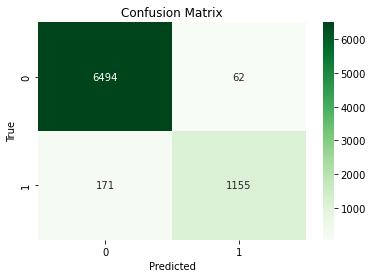

In [271]:
cm = metrics.confusion_matrix(y_train, y_train_predict)

sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

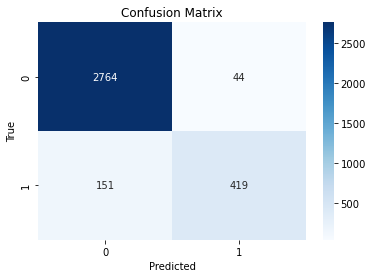

In [272]:
cm = metrics.confusion_matrix(y_test, y_test_predict)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [273]:
pred_prob_train = KNN_model.predict_proba(X_train)
pred_prob_test = KNN_model.predict_proba(X_test)

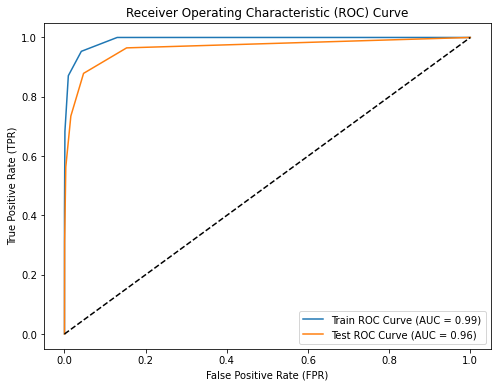

In [274]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the predicted probabilities for both train and test data
pred_prob_train = KNN_model.predict_proba(X_train)[:, 1]
pred_prob_test = KNN_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
roc_auc_train = roc_auc_score(y_train, pred_prob_train)

# Calculate the ROC curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
roc_auc_test = roc_auc_score(y_test, pred_prob_test)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Train ROC Curve (AUC = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC Curve (AUC = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# KNN Model:with hyper tuning

In [275]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': [3, 5, 7, 9,11,13,15],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto','ball_tree', 'kd_tree', 'brute']}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [276]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [277]:
best_model

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [278]:
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}


In [279]:
y_pred_train = best_model.predict(X_train)
classification_report_train = classification_report(y_train, y_pred_train)
print("Classification Report (Train):\n", classification_report_train)

Classification Report (Train):
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6556
         1.0       1.00      1.00      1.00      1326

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [280]:
y_pred_test = best_model.predict(X_test)
classification_report_test = classification_report(y_test, y_pred_test)

print("Classification Report (Test):\n", classification_report_test)

Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2808
         1.0       0.92      0.82      0.87       570

    accuracy                           0.96      3378
   macro avg       0.94      0.91      0.92      3378
weighted avg       0.96      0.96      0.96      3378



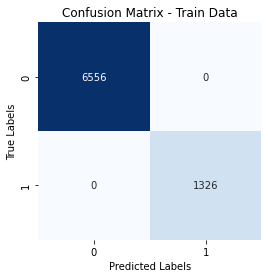

In [281]:
cm_train = confusion_matrix(y_train, y_pred_train)

# Plot the confusion matrix for the train data using a heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Train Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

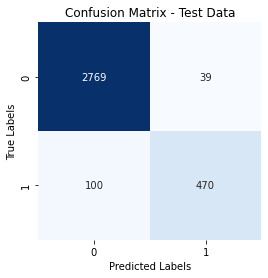

In [282]:
cm_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(4, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

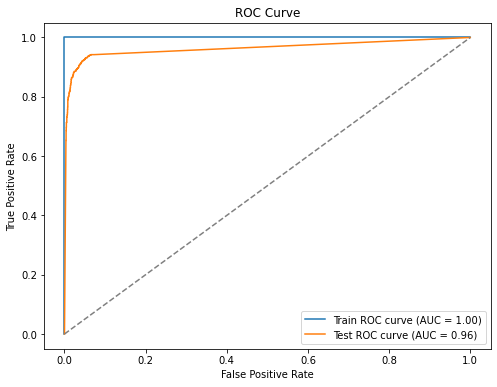

In [283]:
from sklearn.metrics import roc_curve, roc_auc_score


y_pred_prob_train = best_model.predict_proba(X_train)[:, 1]
y_pred_prob_test = best_model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (fpr) and true positive rate (tpr) for the train set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_prob_train)

# Calculate the false positive rate (fpr) and true positive rate (tpr) for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_prob_test)

auc_train = roc_auc_score(y_train, y_pred_prob_train)

auc_test = roc_auc_score(y_test, y_pred_prob_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Train ROC curve (AUC = {:.2f})'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC curve (AUC = {:.2f})'.format(auc_test))
plt.plot([0, 1], [0, 1], 'k--', color='gray')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# KNN With SMOTE

In [284]:
from imblearn.over_sampling import SMOTE

In [285]:
sm = SMOTE(random_state=1)
X_train_res , y_train_res = sm.fit_resample(X_train,y_train)

In [286]:
X_train_res.shape

(13112, 17)

In [287]:
from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [288]:
## Performance Matrix on train data set
y_train_predict = KNN_SM_model.predict(X_train_res)
model_score = KNN_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.973306894447834
[[6214  342]
 [   8 6548]]
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      6556
         1.0       0.95      1.00      0.97      6556

    accuracy                           0.97     13112
   macro avg       0.97      0.97      0.97     13112
weighted avg       0.97      0.97      0.97     13112



In [289]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9271758436944938
[[2601  207]
 [  39  531]]
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.95      2808
         1.0       0.72      0.93      0.81       570

    accuracy                           0.93      3378
   macro avg       0.85      0.93      0.88      3378
weighted avg       0.94      0.93      0.93      3378



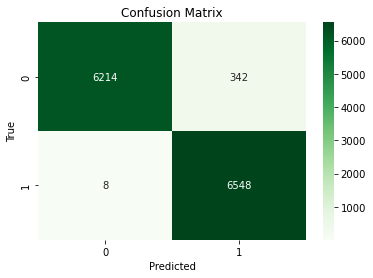

In [290]:
y_train_predict = KNN_SM_model.predict(X_train_res)

cm = metrics.confusion_matrix(y_train_res, y_train_predict)

sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

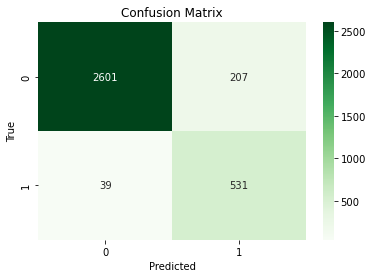

In [291]:
y_test_predict = KNN_SM_model.predict(X_test)


cm = metrics.confusion_matrix(y_test, y_test_predict)


sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [292]:
pred_prob_train = KNN_SM_model.predict_proba(X_train)
pred_prob_test= KNN_SM_model.predict_proba(X_test)

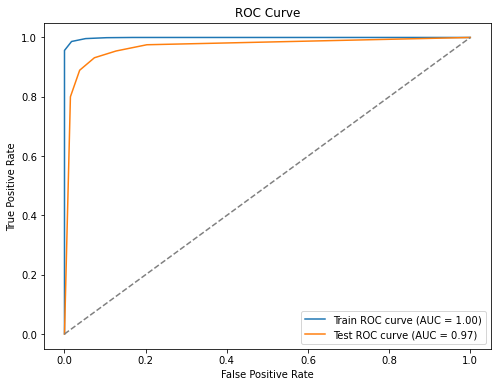

In [293]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the predicted probabilities for both train and test sets
y_pred_prob_train = KNN_SM_model.predict_proba(X_train)[:, 1]
y_pred_prob_test = KNN_SM_model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (fpr) and true positive rate (tpr) for the train set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_prob_train)

# Calculate the false positive rate (fpr) and true positive rate (tpr) for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_prob_test)

# Calculate the AUC for the train set
auc_train = roc_auc_score(y_train, y_pred_prob_train)

# Calculate the AUC for the test set
auc_test = roc_auc_score(y_test, y_pred_prob_test)

# Plot the ROC curve for both train and test sets
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Train ROC curve (AUC = {:.2f})'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC curve (AUC = {:.2f})'.format(auc_test))
plt.plot([0, 1], [0, 1], 'k--', color='gray')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# Naïve Bayes Model

In [294]:
from sklearn.naive_bayes import GaussianNB

In [295]:
NB_model = GaussianNB()
NB_model.fit(X_train,y_train)

GaussianNB()

In [296]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          
print(metrics.classification_report(y_train, y_train_predict))

0.8599340268967267
[[6048  508]
 [ 596  730]]
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92      6556
         1.0       0.59      0.55      0.57      1326

    accuracy                           0.86      7882
   macro avg       0.75      0.74      0.74      7882
weighted avg       0.86      0.86      0.86      7882



In [297]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)          
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         
print(metrics.classification_report(y_test, y_test_predict))

0.857312018946122
[[2586  222]
 [ 260  310]]
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91      2808
         1.0       0.58      0.54      0.56       570

    accuracy                           0.86      3378
   macro avg       0.75      0.73      0.74      3378
weighted avg       0.85      0.86      0.86      3378



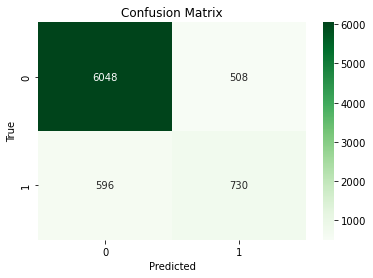

In [298]:
cm = metrics.confusion_matrix(y_train, y_train_predict)

sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

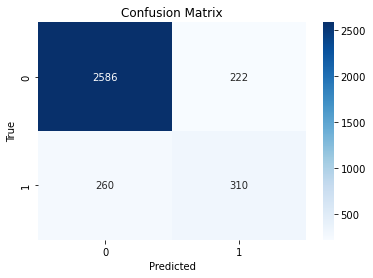

In [299]:
cm = metrics.confusion_matrix(y_test, y_test_predict)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [300]:
pred_prob_train = NB_model.predict_proba(X_train)
pred_prob_test = NB_model.predict_proba(X_test)

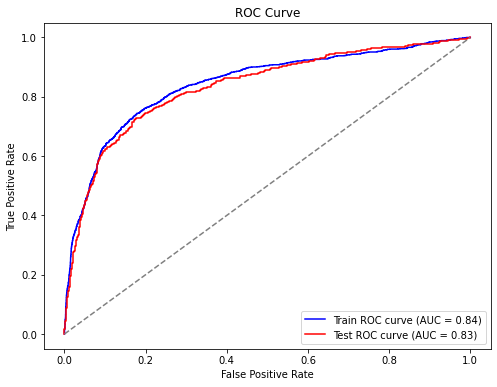

In [301]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have already trained the Naïve Bayes model and stored it in 'NB_model'

# Get predicted probabilities for both train and test data
pred_prob_train = NB_model.predict_proba(X_train)
pred_prob_test = NB_model.predict_proba(X_test)

# Calculate ROC curve for train data
fpr_train, tpr_train, _ = roc_curve(y_train, pred_prob_train[:, 1])
roc_auc_train = roc_auc_score(y_train, pred_prob_train[:, 1])

# Calculate ROC curve for test data
fpr_test, tpr_test, _ = roc_curve(y_test, pred_prob_test[:, 1])
roc_auc_test = roc_auc_score(y_test, pred_prob_test[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='b', label='Train ROC curve (AUC = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, color='r', label='Test ROC curve (AUC = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# Naive Bayes with Hyper tuning parameter

In [302]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# define the model
gnb = GaussianNB()

# define the parameter grid
param_grid = {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}

# perform grid search cross-validation
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')

In [303]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'var_smoothing': 1e-09} 

GaussianNB()


In [304]:
# Get the best Naive Bayes model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the training data using the best model
y_pred_train = best_model.predict(X_train)

# Print the classification report for the training data
print("Classification Report (Train):\n", classification_report(y_train, y_pred_train))

Classification Report (Train):
               precision    recall  f1-score   support

         0.0       0.91      0.92      0.92      6556
         1.0       0.59      0.55      0.57      1326

    accuracy                           0.86      7882
   macro avg       0.75      0.74      0.74      7882
weighted avg       0.86      0.86      0.86      7882



In [305]:
# Make predictions on the test data using the best model
y_pred_test = best_model.predict(X_test)

# Print the classification report for the test data
print("Classification Report (Test):\n", classification_report(y_test, y_pred_test))

Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.91      0.92      0.91      2808
         1.0       0.58      0.54      0.56       570

    accuracy                           0.86      3378
   macro avg       0.75      0.73      0.74      3378
weighted avg       0.85      0.86      0.86      3378



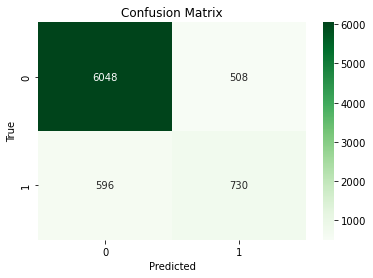

In [306]:
cm = metrics.confusion_matrix(y_train, y_pred_train)

sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

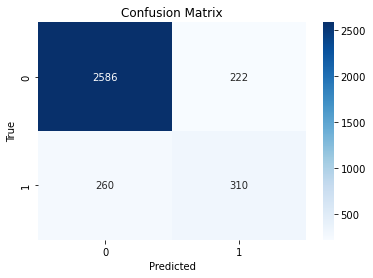

In [307]:
cm = metrics.confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

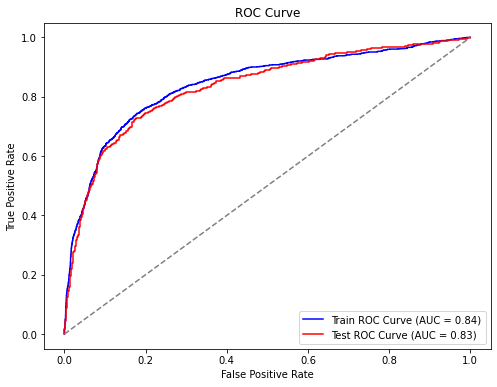

In [308]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the positive class (churn = 1) from the best model
y_pred_prob_train = best_model.predict_proba(X_train)[:, 1]
y_pred_prob_test = best_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve for the training data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_prob_train)

# Compute the ROC curve for the test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_prob_test)

# Calculate the AUC score for the training data
auc_train = roc_auc_score(y_train, y_pred_prob_train)

# Calculate the AUC score for the test data
auc_test = roc_auc_score(y_test, y_pred_prob_test)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Train ROC Curve (AUC = {:.2f})'.format(auc_train), color='blue')
plt.plot(fpr_test, tpr_test, label='Test ROC Curve (AUC = {:.2f})'.format(auc_test), color='red')
plt.plot([0, 1], [0, 1], 'k--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# Naïve Bayes Model with SMOTE: 

In [309]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [310]:
X_train_res.shape

(13112, 17)

In [311]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.7862263575350824
[[5133 1423]
 [1380 5176]]
              precision    recall  f1-score   support

         0.0       0.79      0.78      0.79      6556
         1.0       0.78      0.79      0.79      6556

    accuracy                           0.79     13112
   macro avg       0.79      0.79      0.79     13112
weighted avg       0.79      0.79      0.79     13112



In [312]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7761989342806395
[[2198  610]
 [ 146  424]]
              precision    recall  f1-score   support

         0.0       0.94      0.78      0.85      2808
         1.0       0.41      0.74      0.53       570

    accuracy                           0.78      3378
   macro avg       0.67      0.76      0.69      3378
weighted avg       0.85      0.78      0.80      3378



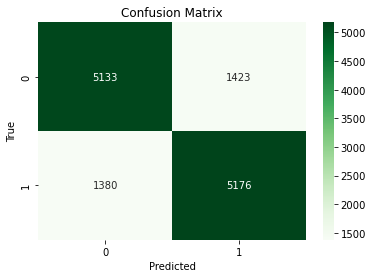

In [313]:
y_train_predict = NB_SM_model.predict(X_train_res)

cm = metrics.confusion_matrix(y_train_res, y_train_predict)

sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

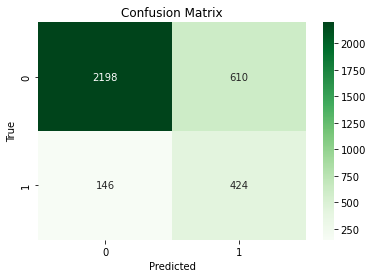

In [314]:
y_test_predict = NB_SM_model.predict(X_test)


cm = metrics.confusion_matrix(y_test, y_test_predict)


sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [315]:
pred_prob_train = NB_SM_model.predict_proba(X_train)
pred_prob_test= NB_SM_model.predict_proba(X_test)

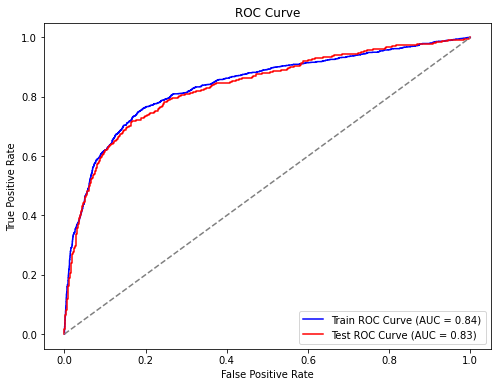

In [316]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the positive class (churn = 1) from the Naive Bayes model with SMOTE
y_pred_prob_train = NB_SM_model.predict_proba(X_train)[:, 1]
y_pred_prob_test = NB_SM_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve for the training data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_prob_train)

# Compute the ROC curve for the test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_prob_test)

# Calculate the AUC score for the training data
auc_train = roc_auc_score(y_train, y_pred_prob_train)

# Calculate the AUC score for the test data
auc_test = roc_auc_score(y_test, y_pred_prob_test)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Train ROC Curve (AUC = {:.2f})'.format(auc_train), color='blue')
plt.plot(fpr_test, tpr_test, label='Test ROC Curve (AUC = {:.2f})'.format(auc_test), color='red')
plt.plot([0, 1], [0, 1], 'k--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# RandomForestClassifier

In [317]:

from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier()
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [318]:
importances = RF_model.feature_importances_
feature_names = X_train.columns

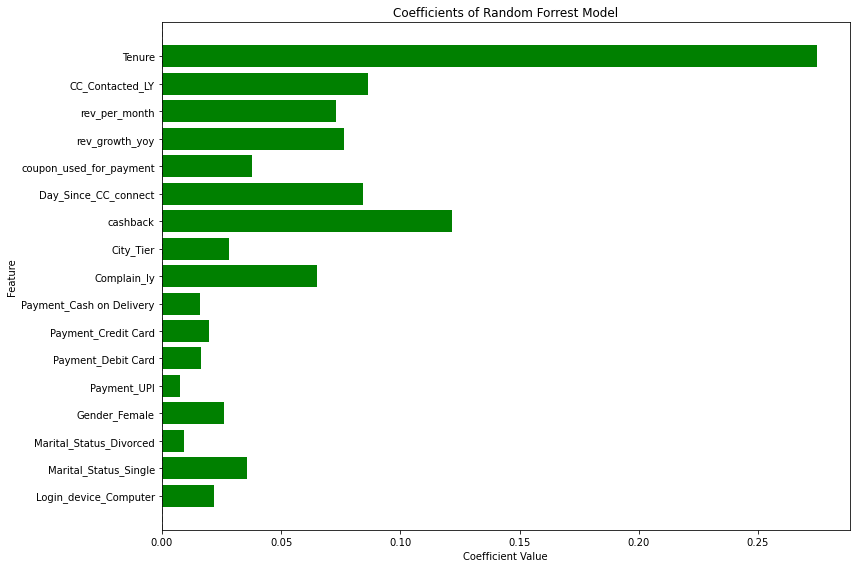

In [319]:
coef = importances

# Get the feature names from X_train.columns
feature_names = X_train.columns

# Plot the important features using a bar plot
plt.figure(figsize=(12, 8))
plt.barh(feature_names, coef, color='green')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Coefficients of Random Forrest Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

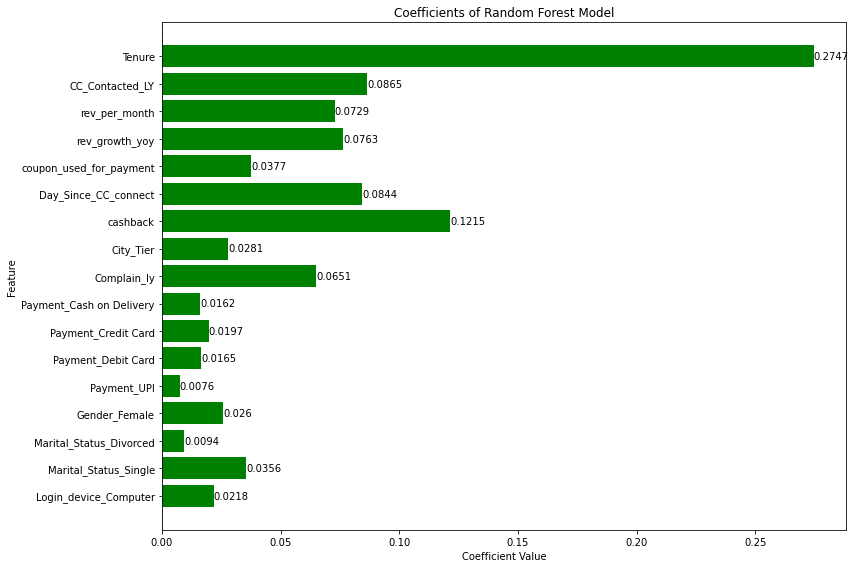

In [320]:
coef = importances
feature_names = X_train.columns

plt.figure(figsize=(12, 8))
bars = plt.barh(feature_names, coef, color='green')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Coefficients of Random Forest Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(bar.get_width(), 4), va='center')

plt.tight_layout()
plt.show()


In [321]:
y_pred_train = RF_model.predict(X_train)
y_pred_test = RF_model.predict(X_test)

In [322]:
# Classification report for train data
print("Classification Report for Train Data:")
print(classification_report(y_train, y_pred_train))

Classification Report for Train Data:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6556
         1.0       1.00      1.00      1.00      1326

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [323]:
# Classification report for test data
print("Classification Report for Test Data:")
print(classification_report(y_test, y_pred_test))

Classification Report for Test Data:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      2808
         1.0       0.96      0.80      0.87       570

    accuracy                           0.96      3378
   macro avg       0.96      0.90      0.92      3378
weighted avg       0.96      0.96      0.96      3378



In [324]:
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

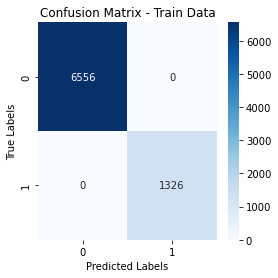

In [325]:
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Train Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [326]:
print(conf_matrix_train )

[[6556    0]
 [   0 1326]]


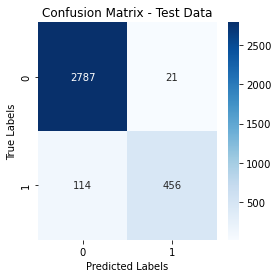

In [327]:
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

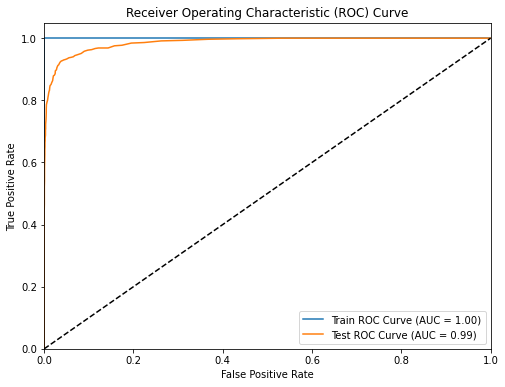

In [328]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for both train and test data
pred_prob_train = RF_model.predict_proba(X_train)
pred_prob_test = RF_model.predict_proba(X_test)

# Calculate ROC curve and AUC score for the test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test[:, 1])
auc_score_test = roc_auc_score(y_test, pred_prob_test[:, 1])

# Calculate ROC curve and AUC score for the train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train[:, 1])
auc_score_train = roc_auc_score(y_train, pred_prob_train[:, 1])

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {auc_score_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {auc_score_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Random Forrest - Hyper tuning 

In [329]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [330]:
param_grid = {'max_depth': [5,6,7,8,9,10],
              'min_samples_split': [8,9,10],
              'n_estimators': [100,200,300],
              'criterion': ['gini', 'entropy'],
              'random_state': [1]}

In [331]:
# Create Random Forest Classifier model
rf = RandomForestClassifier()

In [332]:
# Create GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

In [333]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_split': [8, 9, 10],
                         'n_estimators': [100, 200, 300], 'random_state': [1]},
             scoring='accuracy')

In [334]:
print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 8, 'n_estimators': 300, 'random_state': 1}
Best Estimator: RandomForestClassifier(max_depth=10, min_samples_split=8, n_estimators=300,
                       random_state=1)


In [335]:
best_rf_model = grid_search.best_estimator_

In [336]:
importances = best_rf_model.feature_importances_
feature_names = X_train.columns

In [337]:
best_rf_model.feature_importances_

array([0.36217549, 0.062662  , 0.05959643, 0.05494269, 0.0264649 ,
       0.08063762, 0.09395806, 0.02611923, 0.09155016, 0.01819097,
       0.01863998, 0.01218577, 0.00801507, 0.01871209, 0.00568164,
       0.04355073, 0.01691718])

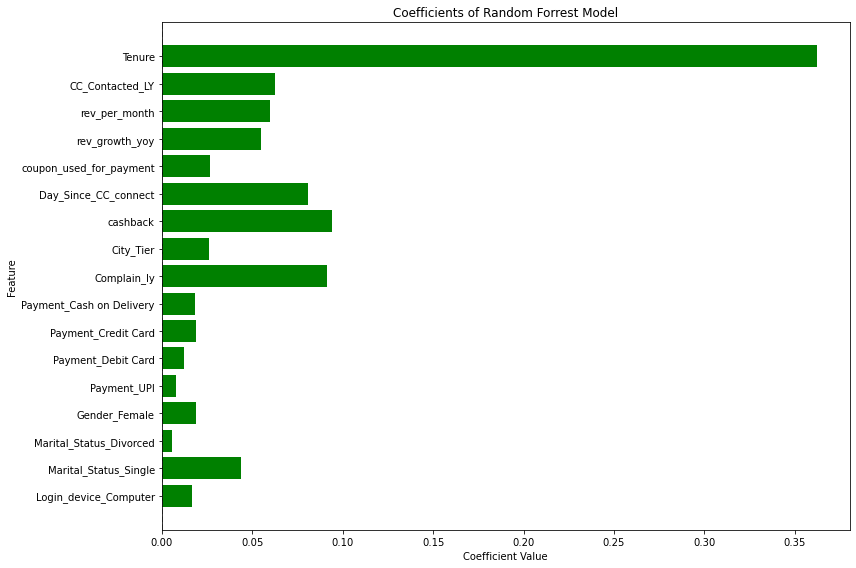

In [338]:
coef = importances

# Get the feature names from X_train.columns
feature_names = X_train.columns

# Plot the important features using a bar plot
plt.figure(figsize=(12, 8))
plt.barh(feature_names, coef, color='green')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Coefficients of Random Forrest Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

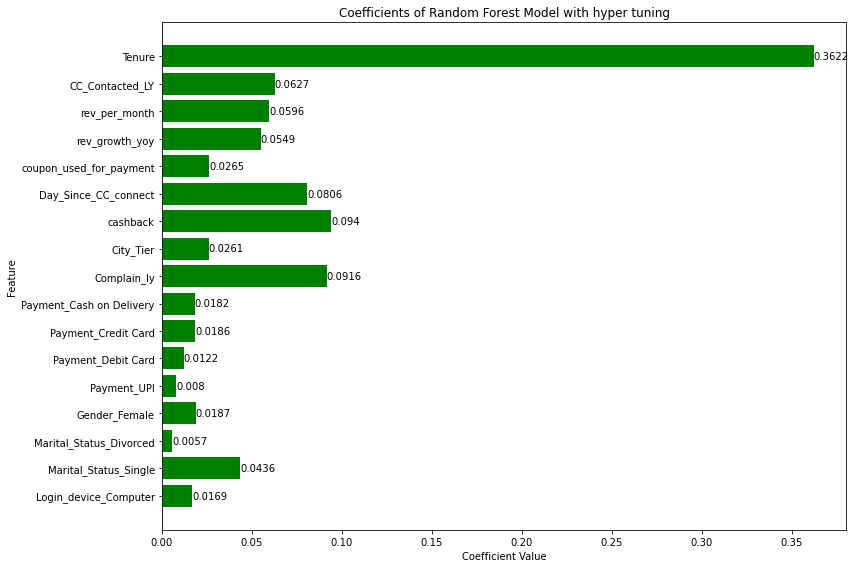

In [339]:
import matplotlib.pyplot as plt

coef = importances
feature_names = X_train.columns

plt.figure(figsize=(12, 8))
bars = plt.barh(feature_names, coef, color='green')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Coefficients of Random Forest Model with hyper tuning')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(bar.get_width(), 4), va='center')

plt.tight_layout()
plt.show()


In [340]:
y_pred_train = best_rf_model.predict(X_train)
y_pred_test = best_rf_model.predict(X_test)

In [341]:
print("Classification Report for Training Data:")
print(classification_report(y_train, y_pred_train))

Classification Report for Training Data:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      6556
         1.0       0.98      0.75      0.85      1326

    accuracy                           0.96      7882
   macro avg       0.97      0.87      0.91      7882
weighted avg       0.96      0.96      0.95      7882



In [342]:
print("Classification Report for Test Data:")
print(classification_report(y_test, y_pred_test))

Classification Report for Test Data:
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      2808
         1.0       0.92      0.65      0.76       570

    accuracy                           0.93      3378
   macro avg       0.92      0.82      0.86      3378
weighted avg       0.93      0.93      0.93      3378



In [343]:
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

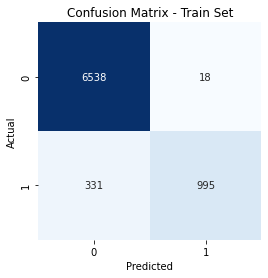

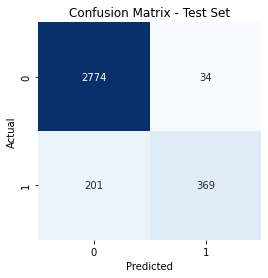

In [344]:
# Plot confusion matrix for train set
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Train Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for test set
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

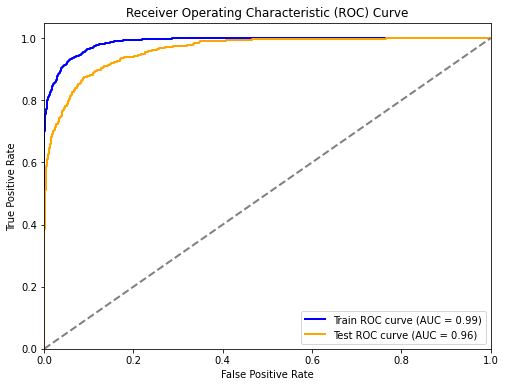

In [345]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for training and test data
train_pred_prob = best_rf_model.predict_proba(X_train)[:, 1]
test_pred_prob = best_rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for training data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_pred_prob)
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate ROC curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='Train ROC curve (AUC = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label='Test ROC curve (AUC = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Random Forrest - SMOTE:

In [346]:
RF_SM_model = RandomForestClassifier(random_state=1)
RF_SM_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=1)

In [347]:
X_train_resampled.shape

(13112, 17)

In [348]:
pred_prob_train = RF_SM_model.predict_proba(X_train)
pred_prob_test = RF_SM_model.predict_proba(X_test)

In [349]:
RF_SM_model.feature_importances_

array([0.32233731, 0.06285564, 0.06788213, 0.0644165 , 0.04395422,
       0.08334452, 0.08062329, 0.02339351, 0.08743138, 0.01374846,
       0.01853658, 0.01593497, 0.00607096, 0.02267977, 0.01924049,
       0.04796866, 0.01958161])

In [350]:
importances=RF_SM_model.feature_importances_

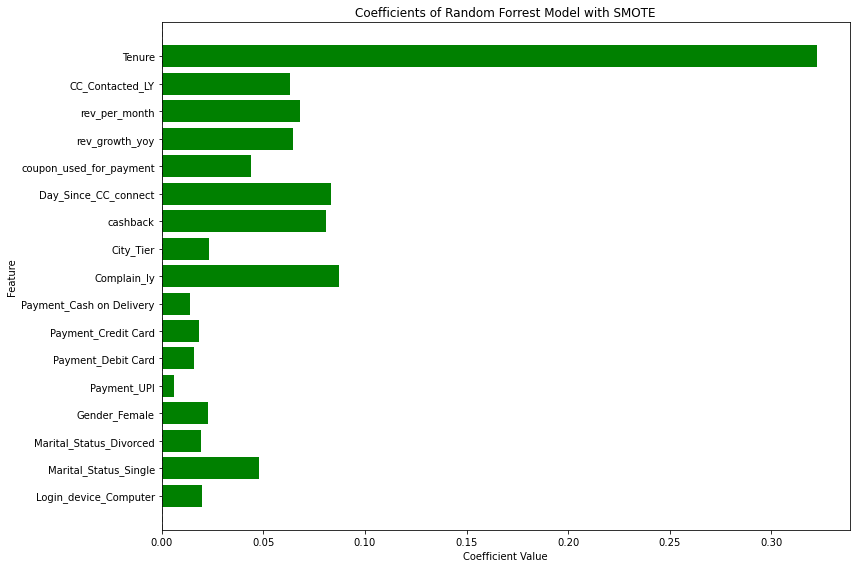

In [351]:
coef = importances

# Get the feature names from X_train.columns
feature_names = X_train.columns

# Plot the important features using a bar plot
plt.figure(figsize=(12, 8))
plt.barh(feature_names, coef, color='green')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Coefficients of Random Forrest Model with SMOTE')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

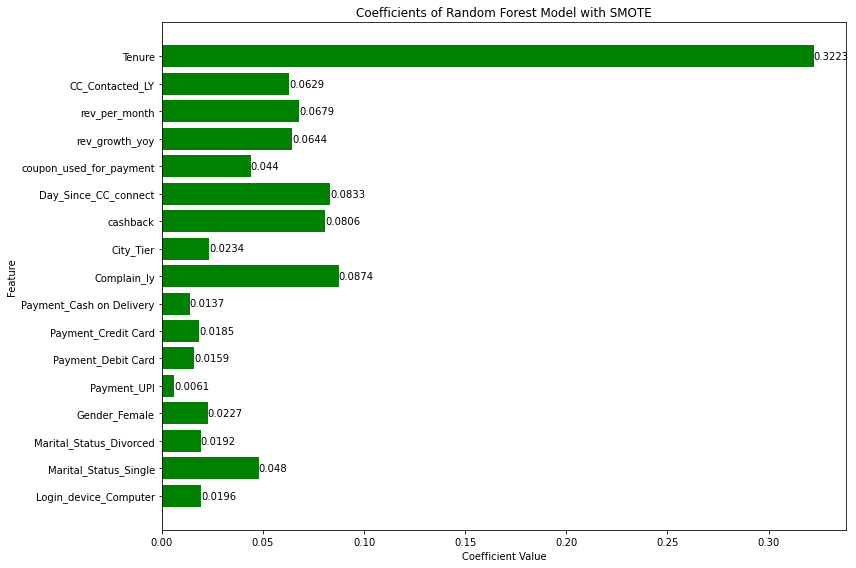

In [352]:
coef = importances
feature_names = X_train.columns

plt.figure(figsize=(12, 8))
bars = plt.barh(feature_names, coef, color='green')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Coefficients of Random Forest Model with SMOTE')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(bar.get_width(), 4), va='center')

plt.tight_layout()
plt.show()

In [353]:
# Get predicted classes
y_pred_train = RF_SM_model.predict(X_train)
y_pred_test = RF_SM_model.predict(X_test)

In [354]:
from sklearn.metrics import classification_report

# Predict probabilities for train and test data
pred_prob_train = RF_SM_model.predict_proba(X_train_resampled)
pred_prob_test = RF_SM_model.predict_proba(X_test)

# Get predicted classes
y_pred_train = RF_SM_model.predict(X_train_resampled)
y_pred_test = RF_SM_model.predict(X_test)

# Generate classification report for train data
print("Classification Report - Train Data:")
print(classification_report(y_train_resampled, y_pred_train))

# Generate classification report for test data
print("Classification Report - Test Data:")
print(classification_report(y_test, y_pred_test))


Classification Report - Train Data:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6556
         1.0       1.00      1.00      1.00      6556

    accuracy                           1.00     13112
   macro avg       1.00      1.00      1.00     13112
weighted avg       1.00      1.00      1.00     13112

Classification Report - Test Data:
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      2808
         1.0       0.90      0.85      0.88       570

    accuracy                           0.96      3378
   macro avg       0.94      0.92      0.93      3378
weighted avg       0.96      0.96      0.96      3378



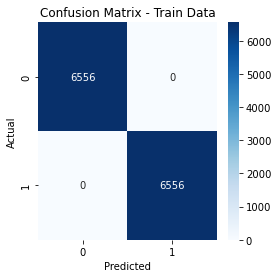

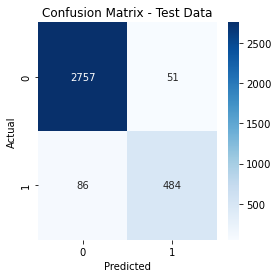

In [355]:

# Calculate confusion matrix for train data
cm_train = confusion_matrix(y_train_resampled, y_pred_train)

# Calculate confusion matrix for test data
cm_test = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix heat map for train data
plt.figure(figsize=(4, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Train Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix heat map for test data
plt.figure(figsize=(4, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


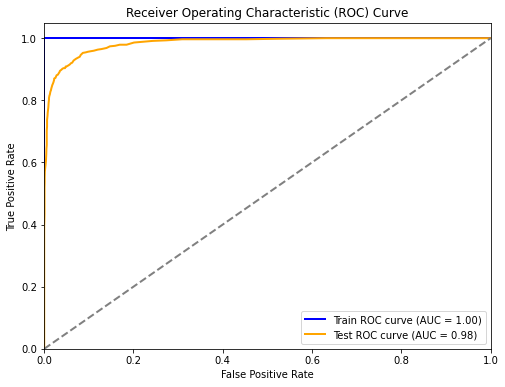

In [356]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC score for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_resampled, pred_prob_train[:, 1])
roc_auc_train = roc_auc_score(y_train_resampled, pred_prob_train[:, 1])

# Calculate ROC curve and AUC score for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test[:, 1])
roc_auc_test = roc_auc_score(y_test, pred_prob_test[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='Train ROC curve (AUC = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label='Test ROC curve (AUC = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Bagging

In [357]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

# Create a BaggingClassifier with DecisionTreeClassifier as base estimator
base_estimator = DecisionTreeClassifier()
bagging_model = BaggingClassifier(base_estimator=base_estimator)

# Fit the BaggingClassifier to the data
bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [358]:
feature_importances = np.mean([tree.feature_importances_ for tree in bagging_model.estimators_], axis=0)
feature_importances 

array([0.31170771, 0.07835535, 0.07141044, 0.07641112, 0.02818149,
       0.09425507, 0.1138439 , 0.03197029, 0.05914523, 0.01670713,
       0.01872729, 0.01245323, 0.00768277, 0.02476222, 0.00684936,
       0.02826742, 0.01926998])

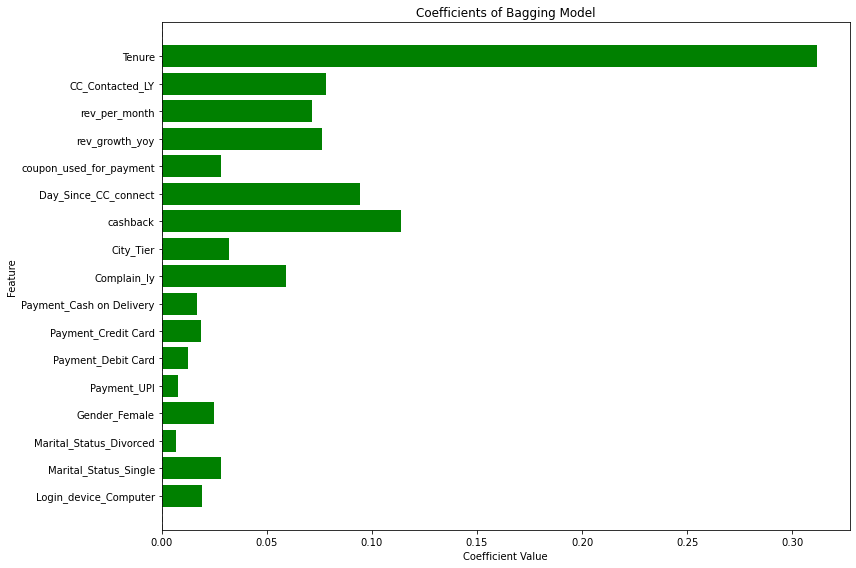

In [359]:
coef = feature_importances 

# Get the feature names from X_train.columns
feature_names = X_train.columns

# Plot the important features using a bar plot
plt.figure(figsize=(12, 8))
plt.barh(feature_names, coef, color='green')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Coefficients of Bagging Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

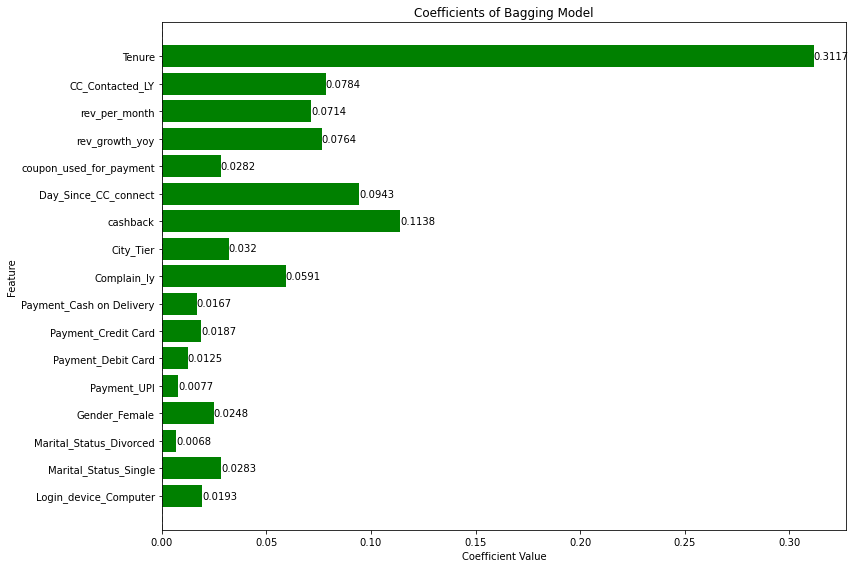

In [360]:
coef = feature_importances
feature_names = X_train.columns

plt.figure(figsize=(12, 8))
bars = plt.barh(feature_names, coef, color='green')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Coefficients of Bagging Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(bar.get_width(), 4), va='center')

plt.tight_layout()
plt.show()

In [361]:
y_pred_train = bagging_model.predict(X_train)
y_pred_test = bagging_model.predict(X_test)

#Classification report for train data
print("Classification Report - Train Data:")
print(classification_report(y_train, y_pred_train))

#Classification report for test data
print("Classification Report - Test Data:")
print(classification_report(y_test, y_pred_test))


Classification Report - Train Data:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6556
         1.0       1.00      0.98      0.99      1326

    accuracy                           1.00      7882
   macro avg       1.00      0.99      0.99      7882
weighted avg       1.00      1.00      1.00      7882

Classification Report - Test Data:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2808
         1.0       0.92      0.77      0.84       570

    accuracy                           0.95      3378
   macro avg       0.94      0.88      0.91      3378
weighted avg       0.95      0.95      0.95      3378



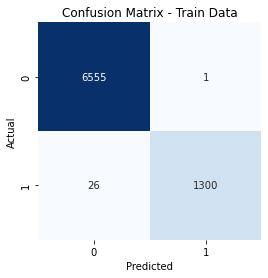

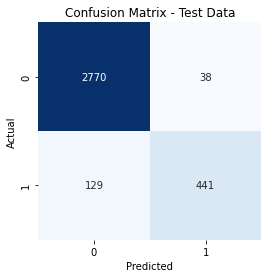

In [362]:

# Calculate confusion matrices for train and test data
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix for train data
plt.figure(figsize=(4, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Train Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for test data
plt.figure(figsize=(4, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


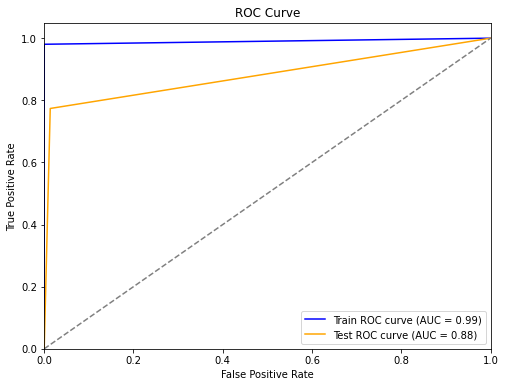

In [363]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC score for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)
roc_auc_train = roc_auc_score(y_train, y_pred_train)

# Calculate ROC curve and AUC score for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_test)

# Plot ROC curves and AUC scores for both train and test data on a single plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='orange', label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# Bagging with Hypertuning: 

In [364]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a BaggingClassifier with DecisionTreeClassifier as base estimator
base_estimator = DecisionTreeClassifier()
bagging_model = BaggingClassifier(base_estimator=base_estimator)

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_samples': [0.5, 0.6, 0.7, 0.8],
    'max_features': [0.3, 0.4, 0.5, 0.6],
    'n_estimators': [10,20,30, 40, 50, 100],
    'random_state': [1]
}


In [365]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best estimator
print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)


Best Parameters: {'max_features': 0.6, 'max_samples': 0.7, 'n_estimators': 30, 'random_state': 1}
Best Estimator: BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.6,
                  max_samples=0.7, n_estimators=30, random_state=1)


In [366]:
Bagging_modell = grid_search.best_estimator_

In [367]:
feature_importances=np.mean([tree.feature_importances_ for tree in Bagging_modell.estimators_], axis=0)

In [368]:
feature_importances

array([0.08525697, 0.11964341, 0.0709591 , 0.10359291, 0.10907653,
       0.08473507, 0.12751639, 0.13977664, 0.06721018, 0.09223279])

In [369]:
feature_names = X_train.columns
feature_names

Index(['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy',
       'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback',
       'City_Tier', 'Complain_ly', 'Payment_Cash on Delivery',
       'Payment_Credit Card', 'Payment_Debit Card', 'Payment_UPI',
       'Gender_Female', 'Marital_Status_Divorced', 'Marital_Status_Single',
       'Login_device_Computer'],
      dtype='object')

In [370]:
y_train_pred = Bagging_modell.predict(X_train)
y_test_pred = Bagging_modell.predict(X_test)

In [371]:
# Generate the classification report for the training set
print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred))
# Generate the classification report for the test set
print("Classification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

Classification Report for Training Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6556
         1.0       1.00      0.98      0.99      1326

    accuracy                           1.00      7882
   macro avg       1.00      0.99      1.00      7882
weighted avg       1.00      1.00      1.00      7882

Classification Report for Test Set:
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      2808
         1.0       0.95      0.68      0.80       570

    accuracy                           0.94      3378
   macro avg       0.95      0.84      0.88      3378
weighted avg       0.94      0.94      0.94      3378



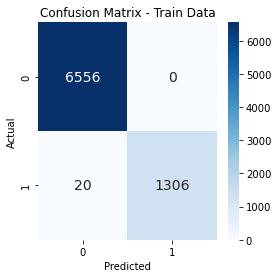

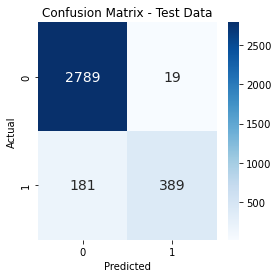

In [372]:
# Calculate confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for train data
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14})
plt.title("Confusion Matrix - Train Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot confusion matrix for test data
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14})
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

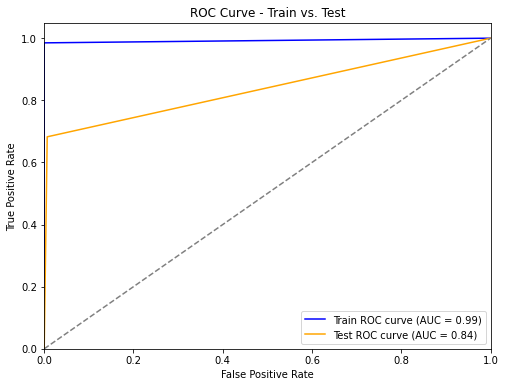

In [373]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC curve and AUC score for train data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
roc_auc_train = roc_auc_score(y_train, y_train_pred)

# Calculate ROC curve and AUC score for test data
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)

# Plot ROC curves and AUC scores for both train and test data
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='orange', label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Train vs. Test')
plt.legend(loc='lower right')
plt.show()


# Bagging with SMOTE:

In [374]:
smote = SMOTE(random_state=1)

In [375]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create the BaggingClassifier with SMOTE
bagging_smote_model = BaggingClassifier(base_estimator=base_estimator)

In [376]:
# Fit the BaggingClassifier to the resampled data
bagging_smote_model.fit(X_train_resampled, y_train_resampled)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [377]:
X_train_resampled.shape

(13112, 17)

In [378]:
# Predict on train and test data
y_train_pred = bagging_smote_model.predict(X_train)
y_test_pred = bagging_smote_model.predict(X_test)

# Print classification report for train and test data
print("Classification Report - Train Data:")
print(classification_report(y_train, y_train_pred))

print("Classification Report - Test Data:")
print(classification_report(y_test, y_test_pred))


Classification Report - Train Data:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6556
         1.0       1.00      0.99      0.99      1326

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882

Classification Report - Test Data:
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      2808
         1.0       0.86      0.81      0.84       570

    accuracy                           0.95      3378
   macro avg       0.91      0.89      0.90      3378
weighted avg       0.95      0.95      0.95      3378



In [379]:
# Plot confusion matrix for train and test data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

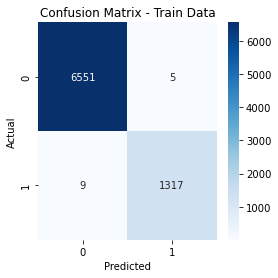

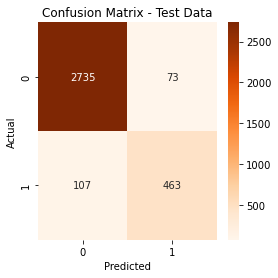

In [380]:
# Plot confusion matrix for train data
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Train Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for test data
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

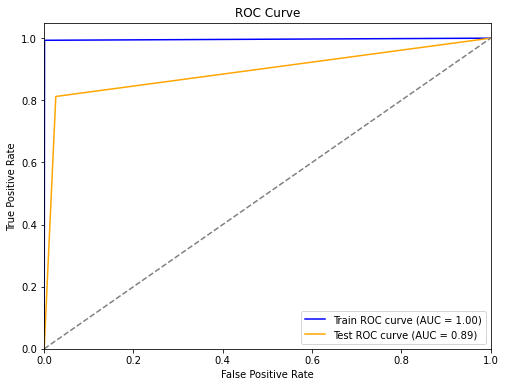

In [381]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC score for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
roc_auc_train = roc_auc_score(y_train, y_train_pred)

# Calculate ROC curve and AUC score for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)

# Plot ROC curves and AUC scores for both train and test data
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='orange', label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# Ada Boost:

In [382]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier()
ADB_model.fit(X_train,y_train)

AdaBoostClassifier()

In [383]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8879725957878711
[[6285  271]
 [ 612  714]]
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      6556
         1.0       0.72      0.54      0.62      1326

    accuracy                           0.89      7882
   macro avg       0.82      0.75      0.78      7882
weighted avg       0.88      0.89      0.88      7882



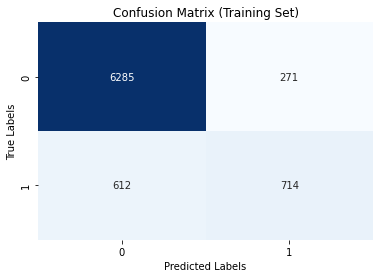

In [384]:
y_train_predict = ADB_model.predict(X_train)

conf_matrix = metrics.confusion_matrix(y_train, y_train_predict)

sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix (Training Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [385]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8878034339846063
[[2694  114]
 [ 265  305]]
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      2808
         1.0       0.73      0.54      0.62       570

    accuracy                           0.89      3378
   macro avg       0.82      0.75      0.78      3378
weighted avg       0.88      0.89      0.88      3378



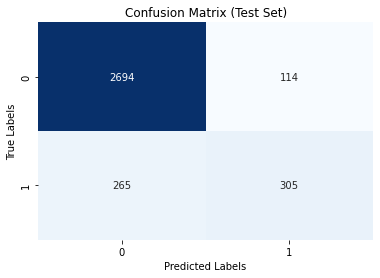

In [386]:
y_test_predict = ADB_model.predict(X_test)


conf_matrix = metrics.confusion_matrix(y_test, y_test_predict)

sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [387]:
pred_prob_train = ADB_model.predict_proba(X_train)
pred_prob_test = ADB_model.predict_proba(X_test)

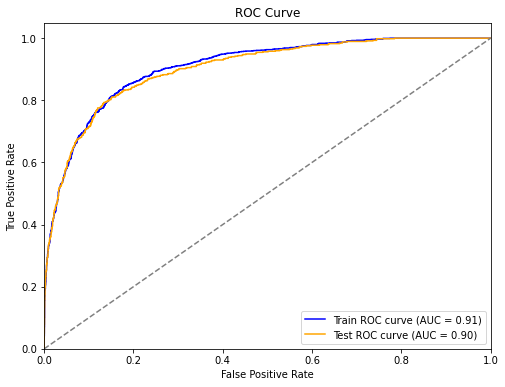

In [388]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for training and test data
pred_prob_train = ADB_model.predict_proba(X_train)[:, 1]
pred_prob_test = ADB_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC score for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
roc_auc_train = roc_auc_score(y_train, pred_prob_train)

# Calculate ROC curve and AUC score for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
roc_auc_test = roc_auc_score(y_test, pred_prob_test)

# Plot ROC curves and AUC scores for both train and test data
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='orange', label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


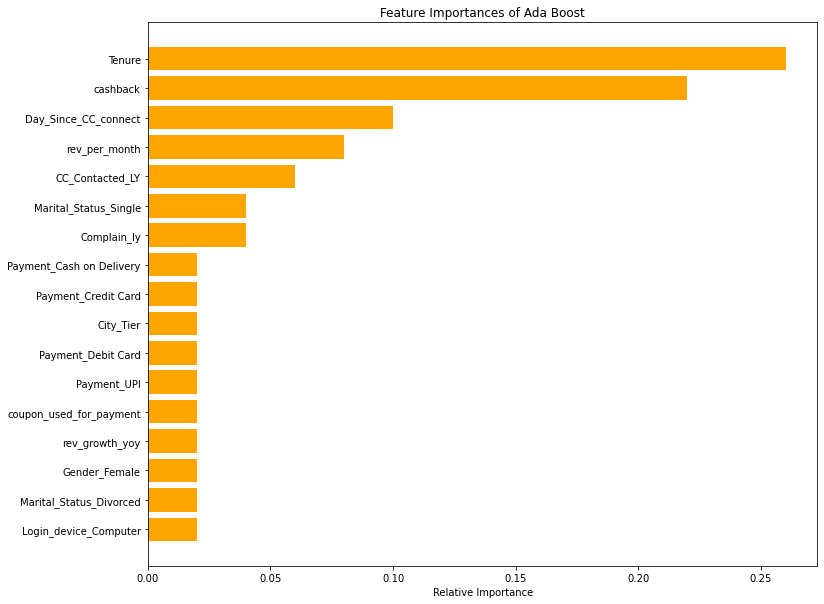

In [389]:
importances = ADB_model.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_train.columns)

plt.figure(figsize=(12,10))
plt.title('Feature Importances of Ada Boost')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

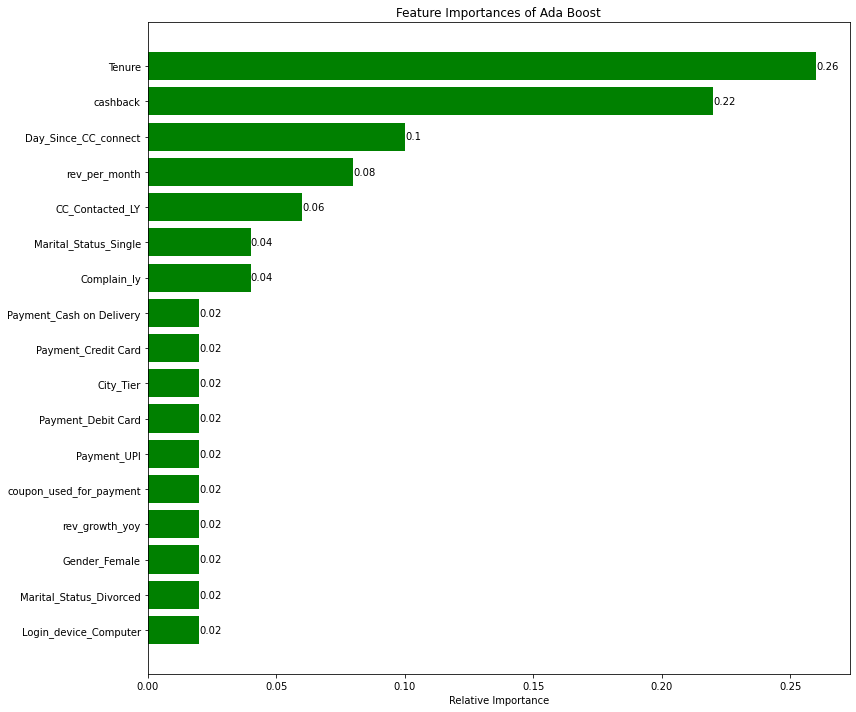

In [390]:
importances = ADB_model.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_train.columns)

plt.figure(figsize=(12, 10))
plt.title('Feature Importances of Ada Boost')
bars = plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(bar.get_width(), 4), va='center')

plt.tight_layout()
plt.show()

# Ada Boost:with Hypertuning 

In [391]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Define the AdaBoost model
ADB_model1 = AdaBoostClassifier(random_state=1)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Perform the GridSearchCV
grid_search = GridSearchCV(estimator=ADB_model1, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and best estimator
print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)


Best Parameters: {'learning_rate': 1.0, 'n_estimators': 100}
Best Estimator: AdaBoostClassifier(n_estimators=100, random_state=1)


In [392]:
from sklearn.metrics import classification_report

# Get the best AdaBoost model from GridSearchCV
ADB_model1 = grid_search.best_estimator_

In [393]:
y_train_predict = ADB_model1.predict(X_train)
model_score = ADB_model1.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8901294087794976
[[6291  265]
 [ 601  725]]
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94      6556
         1.0       0.73      0.55      0.63      1326

    accuracy                           0.89      7882
   macro avg       0.82      0.75      0.78      7882
weighted avg       0.88      0.89      0.88      7882



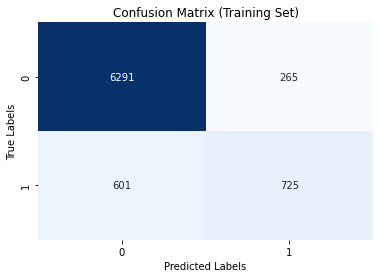

In [394]:
y_train_predict = ADB_model1.predict(X_train)

conf_matrix = metrics.confusion_matrix(y_train, y_train_predict)

sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix (Training Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [395]:
## Performance Matrix on test data set
y_test_predict = ADB_model1.predict(X_test)
model_score = ADB_model1.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8922439313203079
[[2699  109]
 [ 255  315]]
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94      2808
         1.0       0.74      0.55      0.63       570

    accuracy                           0.89      3378
   macro avg       0.83      0.76      0.79      3378
weighted avg       0.88      0.89      0.89      3378



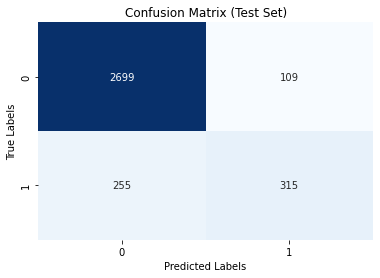

In [396]:
y_test_predict = ADB_model1.predict(X_test)


conf_matrix = metrics.confusion_matrix(y_test, y_test_predict)

sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [397]:
pred_prob_train = ADB_model1.predict_proba(X_train)
pred_prob_test = ADB_model1.predict_proba(X_test)

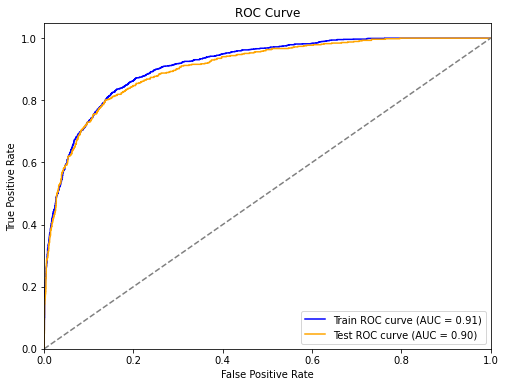

In [398]:

# Calculate ROC curve and AUC score for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train[:, 1])
roc_auc_train = roc_auc_score(y_train, pred_prob_train[:, 1])

# Calculate ROC curve and AUC score for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test[:, 1])
roc_auc_test = roc_auc_score(y_test, pred_prob_test[:, 1])

# Plot ROC curves and AUC scores for both train and test data
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='orange', label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


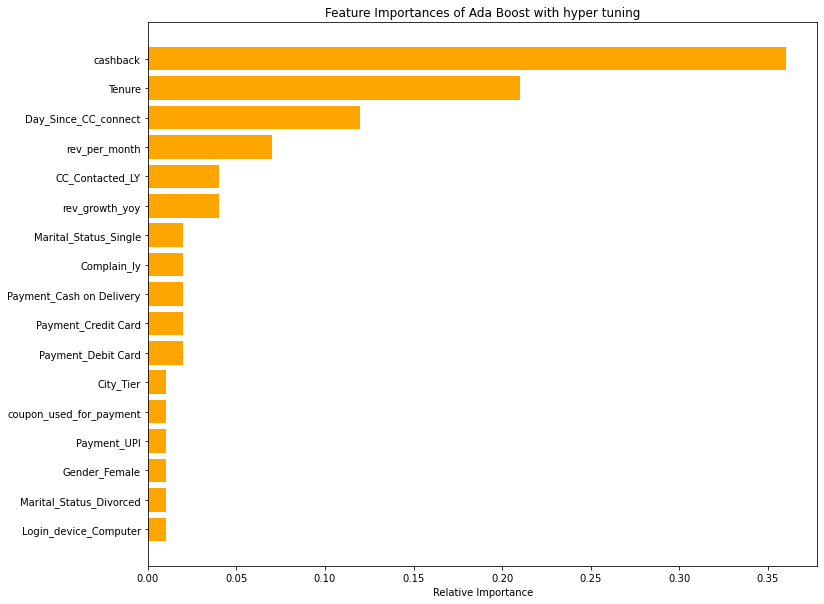

In [399]:
importances = ADB_model1.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_train.columns)

plt.figure(figsize=(12,10))
plt.title('Feature Importances of Ada Boost with hyper tuning')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

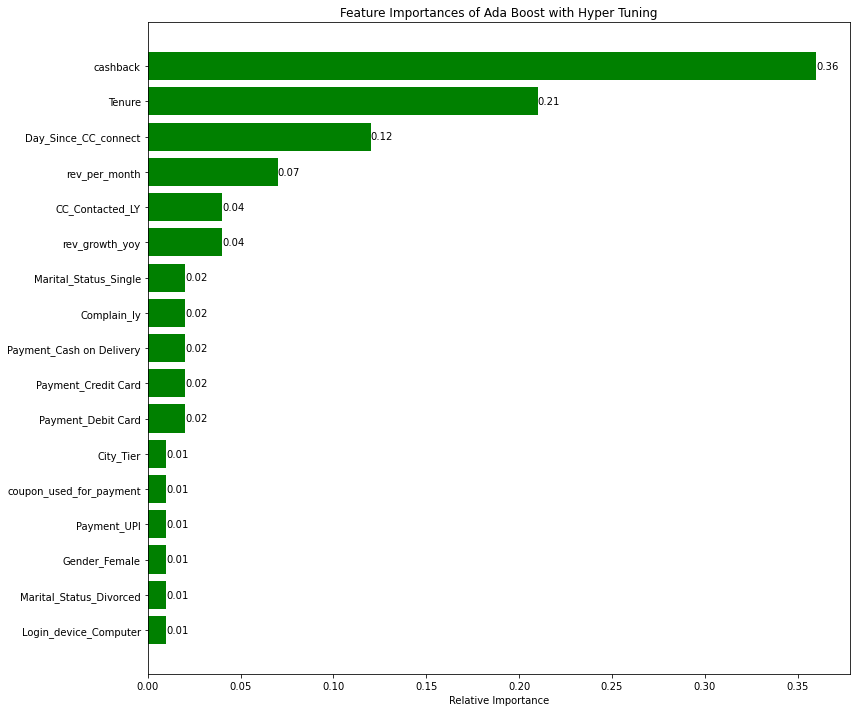

In [400]:
importances = ADB_model1.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_train.columns)

plt.figure(figsize=(12, 10))
plt.title('Feature Importances of Ada Boost with Hyper Tuning')
bars = plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(bar.get_width(), 4), va='center')

plt.tight_layout()
plt.show()

# ADA Boost with SMOTE:

In [401]:
smote = SMOTE(random_state=1)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the AdaBoostClassifier
ADB_SM_model = AdaBoostClassifier(random_state=1)

# Fit the AdaBoost model to the resampled training data
ADB_SM_model.fit(X_train_resampled, y_train_resampled)

# Predict on train and test data
y_train_pred = ADB_SM_model.predict(X_train_resampled)
y_test_pred = ADB_SM_model.predict(X_test)


In [402]:
# Print classification reports
print("Classification Report - Train Data:")
print(classification_report(y_train_resampled, y_train_pred))

print("\nClassification Report - Test Data:")
print(classification_report(y_test, y_test_pred))

Classification Report - Train Data:
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      6556
         1.0       0.88      0.88      0.88      6556

    accuracy                           0.88     13112
   macro avg       0.88      0.88      0.88     13112
weighted avg       0.88      0.88      0.88     13112


Classification Report - Test Data:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92      2808
         1.0       0.58      0.74      0.65       570

    accuracy                           0.87      3378
   macro avg       0.76      0.81      0.78      3378
weighted avg       0.88      0.87      0.87      3378



In [403]:
conf_matrix_train = confusion_matrix(y_train_resampled, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

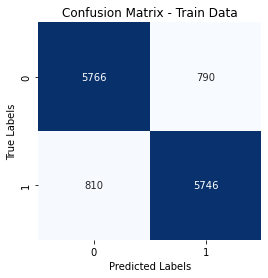

In [404]:
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Train Data")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

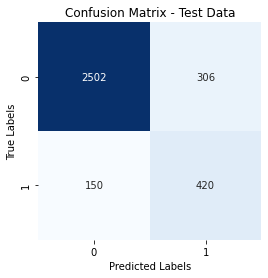

In [405]:
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

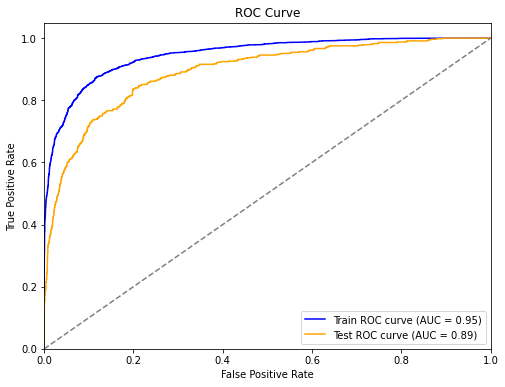

In [406]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for training and test data
pred_prob_train = ADB_SM_model.predict_proba(X_train_resampled)[:, 1]
pred_prob_test = ADB_SM_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for training data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_resampled, pred_prob_train)
roc_auc_train = roc_auc_score(y_train_resampled, pred_prob_train)

# Calculate ROC curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
roc_auc_test = roc_auc_score(y_test, pred_prob_test)

# Plot ROC curves and AUC scores for both train and test data
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='orange', label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


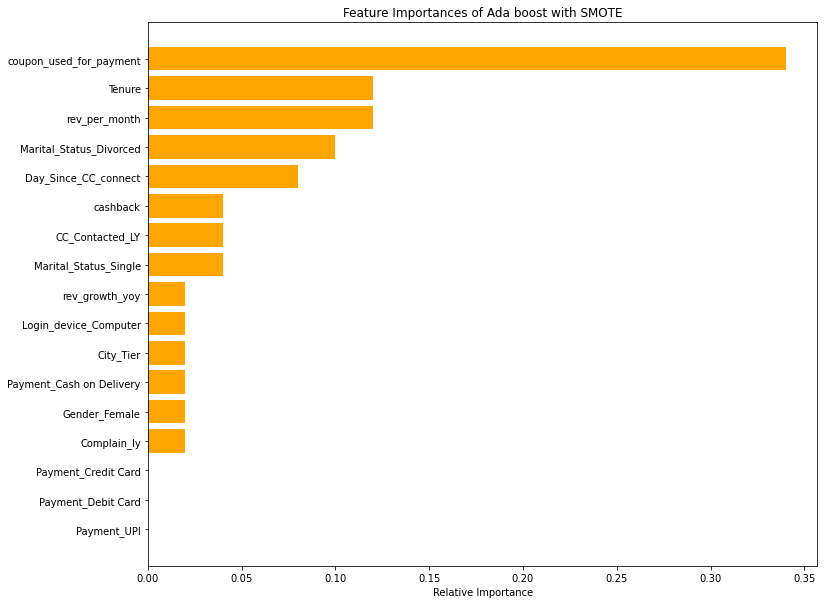

In [407]:
importances = ADB_SM_model.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_train.columns)

plt.figure(figsize=(12,10))
plt.title('Feature Importances of Ada boost with SMOTE')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

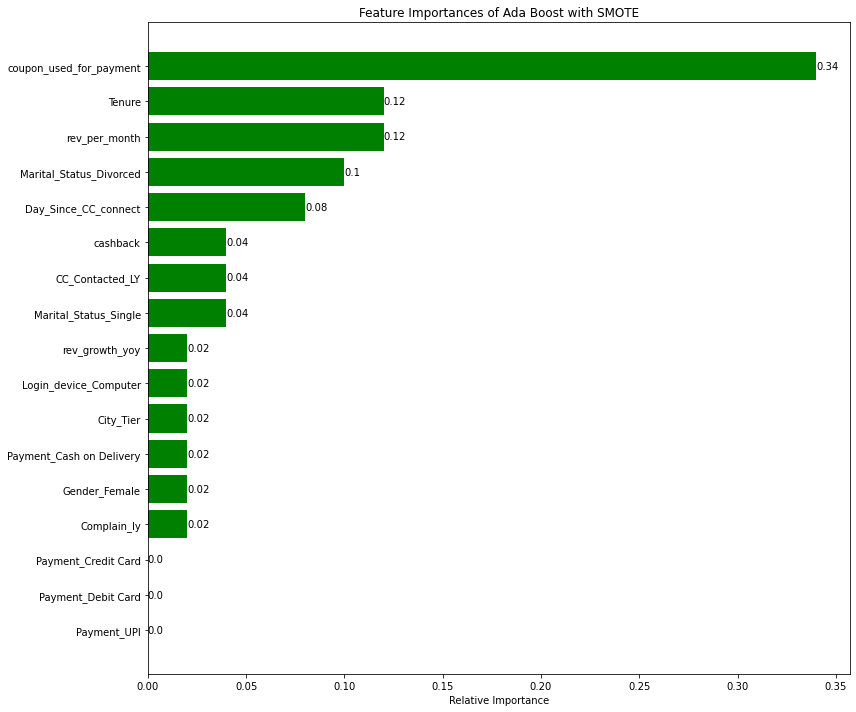

In [408]:
importances = ADB_SM_model.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_train.columns)

plt.figure(figsize=(12, 10))
plt.title('Feature Importances of Ada Boost with SMOTE')
bars = plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(bar.get_width(), 4), va='center')

plt.tight_layout()
plt.show()

# Gradient Boosting

In [409]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train,y_train)

In [410]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9087794975894443
[[6368  188]
 [ 531  795]]
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      6556
         1.0       0.81      0.60      0.69      1326

    accuracy                           0.91      7882
   macro avg       0.87      0.79      0.82      7882
weighted avg       0.90      0.91      0.90      7882



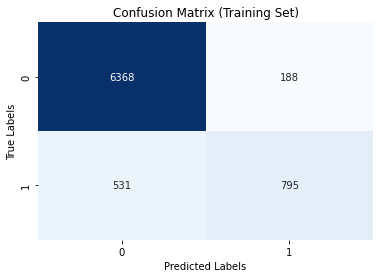

In [411]:
y_train_predict = gbcl.predict(X_train)

conf_matrix = metrics.confusion_matrix(y_train, y_train_predict)

sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix (Training Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [412]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9040852575488455
[[2722   86]
 [ 238  332]]
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      2808
         1.0       0.79      0.58      0.67       570

    accuracy                           0.90      3378
   macro avg       0.86      0.78      0.81      3378
weighted avg       0.90      0.90      0.90      3378



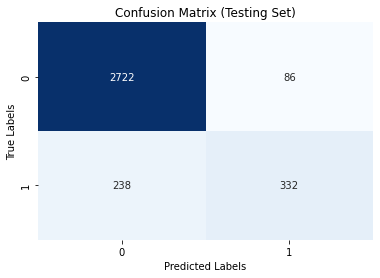

In [413]:
y_test_predict = gbcl.predict(X_test)


conf_matrix = metrics.confusion_matrix(y_test, y_test_predict)

sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix (Testing Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [414]:
pred_prob_train = gbcl.predict_proba(X_train)
pred_prob_test = gbcl.predict_proba(X_test)

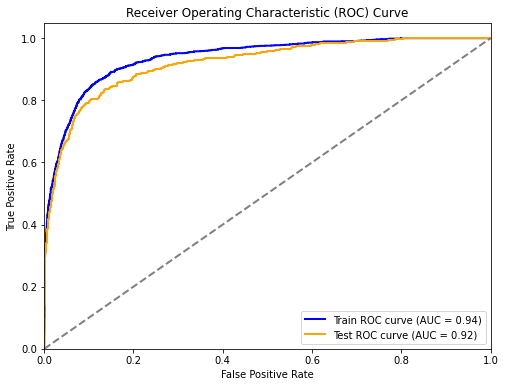

In [415]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for training and test data
pred_prob_train = gbcl.predict_proba(X_train)[:, 1]
pred_prob_test = gbcl.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score for training and test data
roc_auc_train = roc_auc_score(y_train, pred_prob_train)
roc_auc_test = roc_auc_score(y_test, pred_prob_test)

# Calculate ROC curve for training and test data
fpr_train, tpr_train, _ = roc_curve(y_train, pred_prob_train)
fpr_test, tpr_test, _ = roc_curve(y_test, pred_prob_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


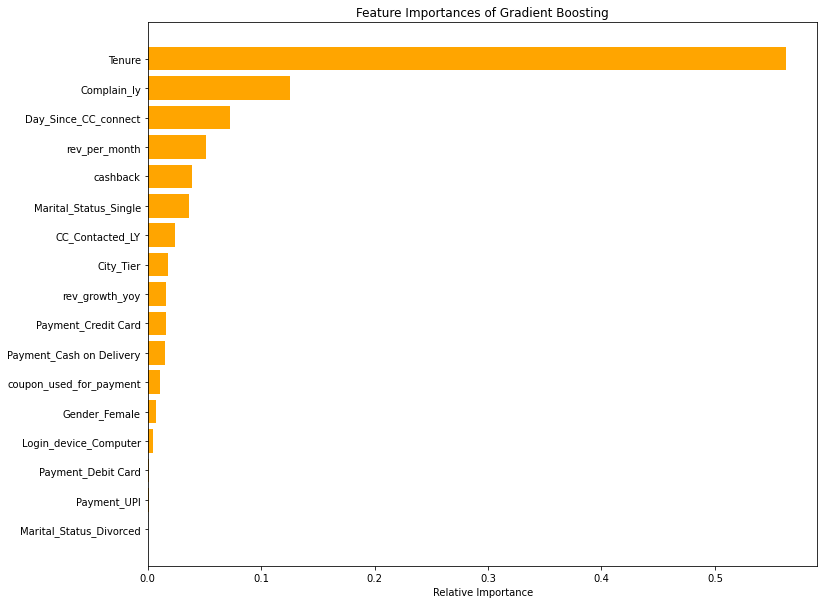

In [416]:
importances = gbcl.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_train.columns)

plt.figure(figsize=(12,10))
plt.title('Feature Importances of Gradient Boosting')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

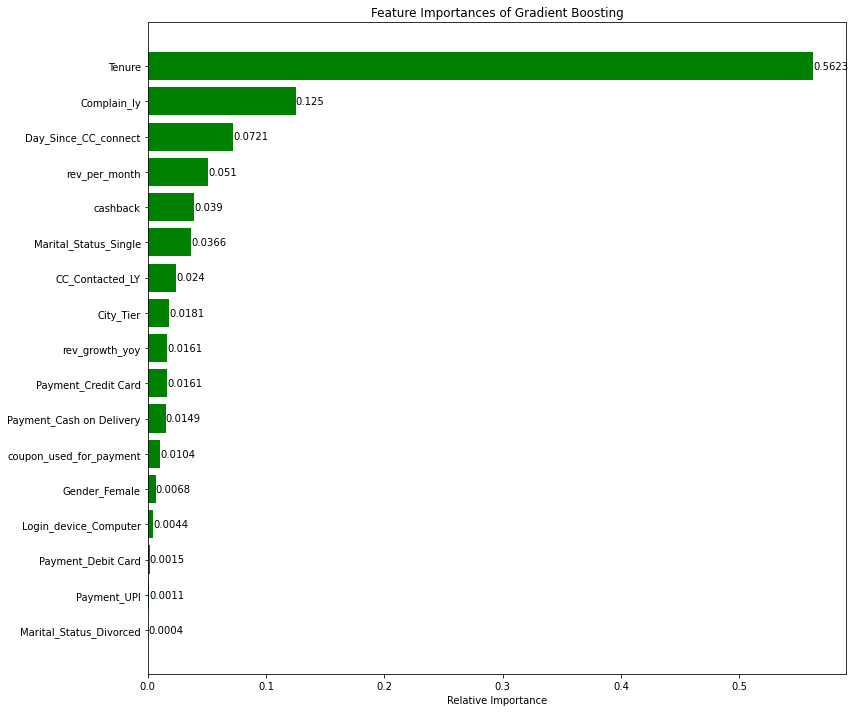

In [417]:
importances = gbcl.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_train.columns)

plt.figure(figsize=(12, 10))
plt.title('Feature Importances of Gradient Boosting')
bars = plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(bar.get_width(), 4), va='center')

plt.tight_layout()
plt.show()

# Gradient Boosting - hyper tuning 

In [418]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

GB_model = GradientBoostingClassifier()

param_dist = {'learning_rate': [0.05, 0.1, 0.2],
              'max_depth': [5, 6, 7],
              'min_samples_split': [5, 7, 10],
              'n_estimators': [50, 75],
              'random_state': [1]}

# Use RandomizedSearchCV with fewer iterations
random_search = RandomizedSearchCV(estimator=GB_model, param_distributions=param_dist, n_iter=20, cv=3, scoring='accuracy', random_state=1)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Print the best parameters and best estimator
print("Best Parameters:", random_search.best_params_)
print("Best Estimator:", random_search.best_estimator_)


Best Parameters: {'random_state': 1, 'n_estimators': 50, 'min_samples_split': 10, 'max_depth': 7, 'learning_rate': 0.2}
Best Estimator: GradientBoostingClassifier(learning_rate=0.2, max_depth=7, min_samples_split=10,
                           n_estimators=50, random_state=1)


In [419]:
GB_model1=random_search.best_estimator_
GB_model1

GradientBoostingClassifier(learning_rate=0.2, max_depth=7, min_samples_split=10,
                           n_estimators=50, random_state=1)

In [420]:
from sklearn.metrics import classification_report

# Predicted labels on the training set
y_train_pred = GB_model1.predict(X_train)

# Predicted labels on the test set
y_test_pred = GB_model1.predict(X_test)

# Generate classification reports for both sets
print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred))

print("Classification Report for Test Set:")
print(classification_report(y_test, y_test_pred))


Classification Report for Training Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6556
         1.0       1.00      0.98      0.99      1326

    accuracy                           1.00      7882
   macro avg       1.00      0.99      0.99      7882
weighted avg       1.00      1.00      1.00      7882

Classification Report for Test Set:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2808
         1.0       0.93      0.79      0.85       570

    accuracy                           0.95      3378
   macro avg       0.95      0.89      0.91      3378
weighted avg       0.95      0.95      0.95      3378



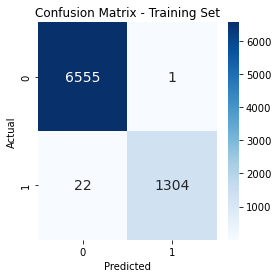

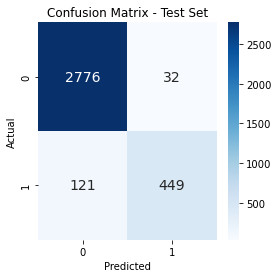

In [421]:
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for training set
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14})
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot confusion matrix for test set
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14})
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


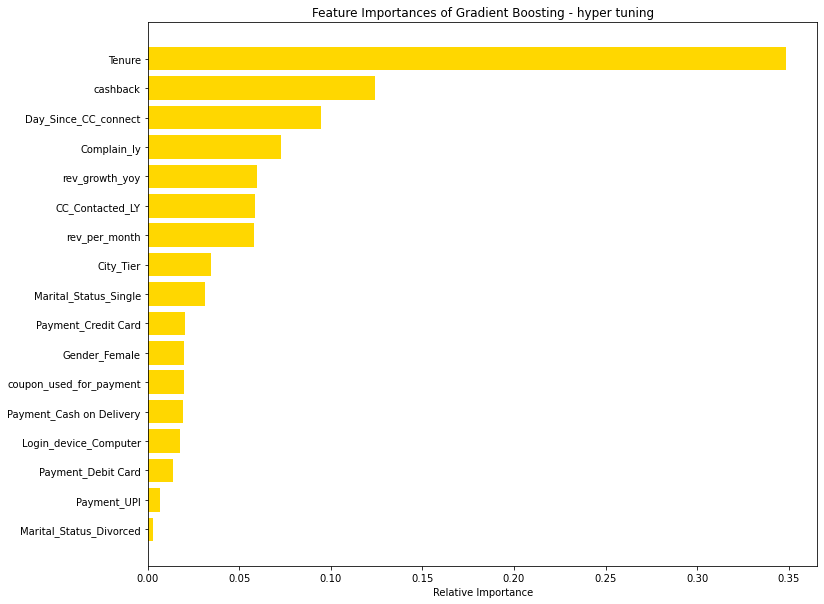

In [422]:
importances = GB_model1.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,10))
plt.title('Feature Importances of Gradient Boosting - hyper tuning')
plt.barh(range(len(indices)), importances[indices], color='gold', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

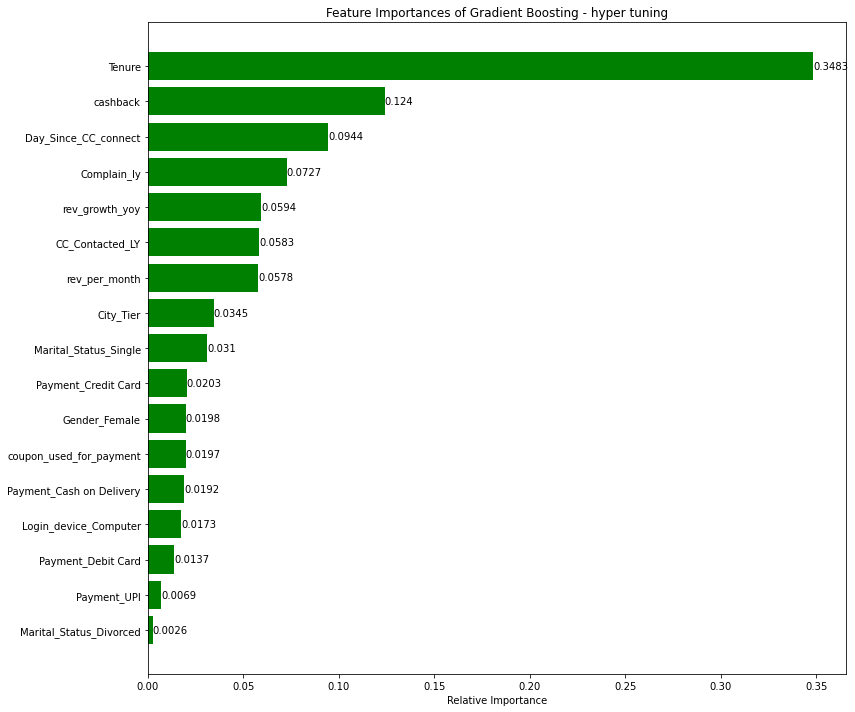

In [423]:
importances = GB_model1.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 10))
plt.title('Feature Importances of Gradient Boosting - hyper tuning')
bars = plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(bar.get_width(), 4), va='center')

plt.tight_layout()
plt.show()

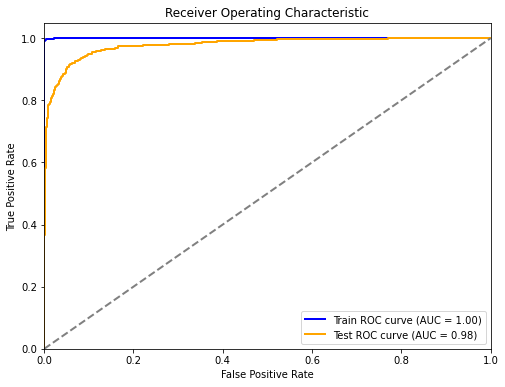

In [424]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Predicted probabilities on the training set
y_train_prob = GB_model1.predict_proba(X_train)[:, 1]

# Predicted probabilities on the test set
y_test_prob = GB_model1.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC score for training set
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate ROC curve and AUC score for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='Train ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label='Test ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()



# Gradient Boosting - SMOTE 

In [425]:
GB_SM_model = GradientBoostingClassifier()


smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


GB_SM_model.fit(X_train_resampled, y_train_resampled)


GradientBoostingClassifier()

In [426]:
X_train_resampled.shape

(13112, 17)

In [427]:
y_train_pred = GB_SM_model.predict(X_train_resampled)
y_test_pred = GB_SM_model.predict(X_test)

In [428]:
print("Classification Report for Training Set:")
print(classification_report(y_train_resampled, y_train_pred))

print("Classification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

Classification Report for Training Set:
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      6556
         1.0       0.92      0.92      0.92      6556

    accuracy                           0.92     13112
   macro avg       0.92      0.92      0.92     13112
weighted avg       0.92      0.92      0.92     13112

Classification Report for Test Set:
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94      2808
         1.0       0.67      0.71      0.69       570

    accuracy                           0.89      3378
   macro avg       0.81      0.82      0.81      3378
weighted avg       0.90      0.89      0.89      3378



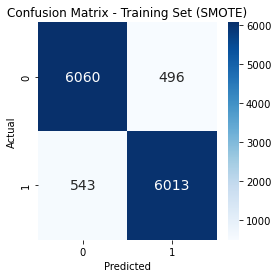

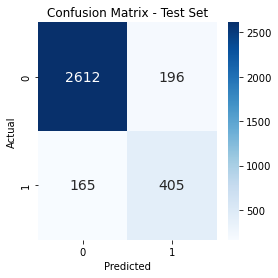

In [429]:
conf_matrix_train = confusion_matrix(y_train_resampled, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)


plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14})
plt.title("Confusion Matrix - Training Set (SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14})
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

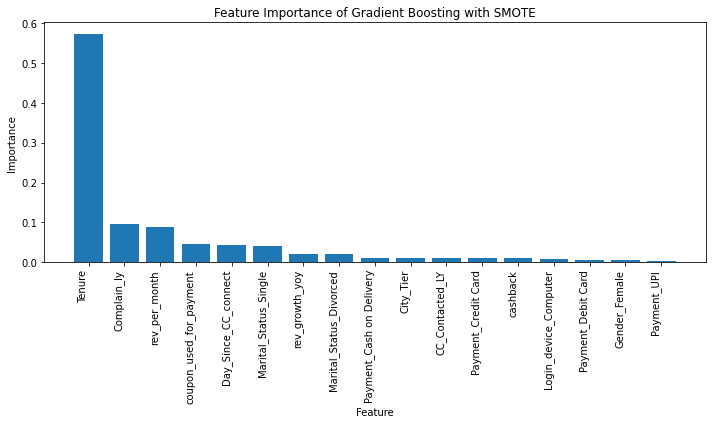

In [430]:

feature_importance = GB_SM_model.feature_importances_
feature_names = X_train.columns
sorted_idx = feature_importance.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importance[sorted_idx], align="center")
plt.xticks(range(X_train.shape[1]), np.array(feature_names)[sorted_idx], rotation=90, ha="right")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance of Gradient Boosting with SMOTE")
plt.tight_layout()
plt.show()


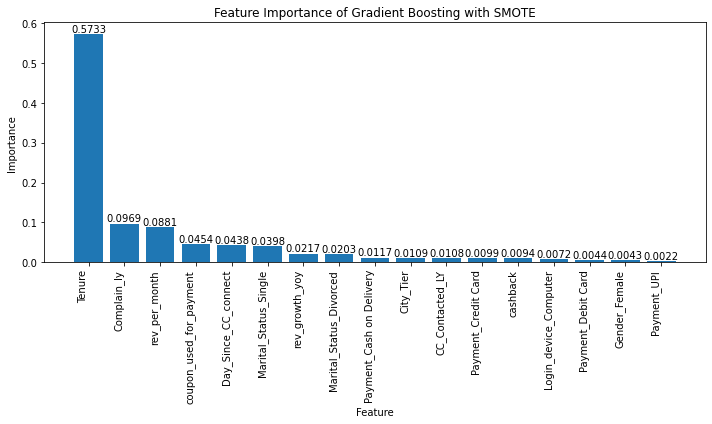

In [431]:
feature_importance = GB_SM_model.feature_importances_
feature_names = X_train.columns
sorted_idx = feature_importance.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
bars = plt.bar(range(X_train.shape[1]), feature_importance[sorted_idx], align="center")
plt.xticks(range(X_train.shape[1]), np.array(feature_names)[sorted_idx], rotation=90, ha="right")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance of Gradient Boosting with SMOTE")

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 4), ha='center', va='bottom')

plt.tight_layout()
plt.show()


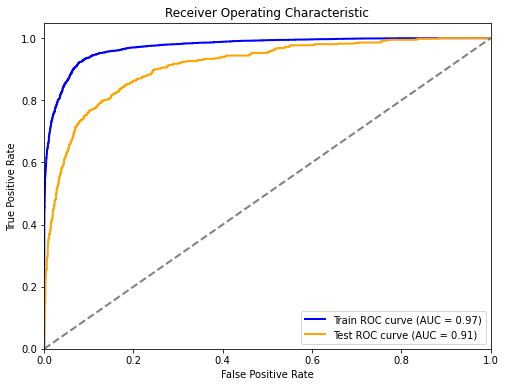

Train AUC Score: 0.97297829680444
Test AUC Score: 0.9106500224921277


In [432]:
# Predicted probabilities on the training set
y_train_prob = GB_SM_model.predict_proba(X_train_resampled)[:, 1]

# Predicted probabilities on the test set
y_test_prob = GB_SM_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC score for training set
fpr_train, tpr_train, _ = roc_curve(y_train_resampled, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate ROC curve and AUC score for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='Train ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label='Test ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print AUC scores
print("Train AUC Score:", roc_auc_train)
print("Test AUC Score:", roc_auc_test)

# Support Vector Machines (SVM)

In [433]:
from sklearn.svm import SVC
svm_model = SVC(random_state=1)

In [434]:
svm_model.fit(X_train, y_train)

y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

In [435]:
print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred))

print("Classification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

Classification Report for Training Set:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      6556
         1.0       0.86      0.60      0.71      1326

    accuracy                           0.92      7882
   macro avg       0.89      0.79      0.83      7882
weighted avg       0.91      0.92      0.91      7882

Classification Report for Test Set:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      2808
         1.0       0.85      0.58      0.69       570

    accuracy                           0.91      3378
   macro avg       0.88      0.78      0.82      3378
weighted avg       0.91      0.91      0.90      3378



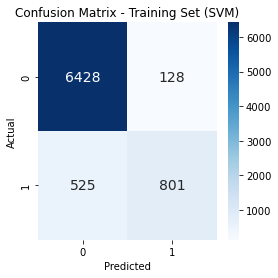

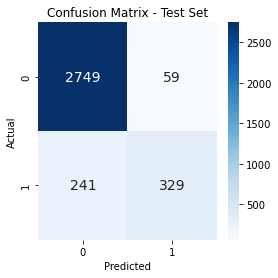

In [436]:
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for training set
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14})
plt.title("Confusion Matrix - Training Set (SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot confusion matrix for test set
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14})
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

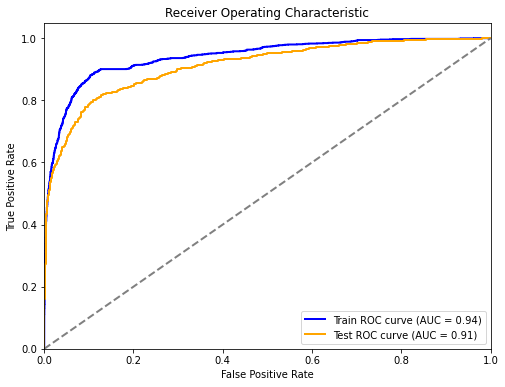

Train AUC Score: 0.9404507356047032
Test AUC Score: 0.9109480431848853


In [437]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_train_prob = svm_model.decision_function(X_train)
y_test_prob = svm_model.decision_function(X_test)

# Calculate ROC curve and AUC score for training set
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate ROC curve and AUC score for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='Train ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label='Test ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print AUC scores
print("Train AUC Score:", roc_auc_train)
print("Test AUC Score:", roc_auc_test)


# Support Vector Machines (SVM)- Hyper tuning 

In [438]:
svm_model = SVC()

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_svm_model = grid_search.best_estimator_

In [439]:
grid_search 

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [440]:
grid_search.best_estimator_

SVC(C=10, degree=2)

In [441]:
grid_search.best_params_

{'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

In [442]:
y_train_pred = best_svm_model.predict(X_train)

y_test_pred = best_svm_model.predict(X_test)

# Generate classification reports for both sets
print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred))

print("Classification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

Classification Report for Training Set:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      6556
         1.0       0.96      0.81      0.88      1326

    accuracy                           0.96      7882
   macro avg       0.96      0.90      0.93      7882
weighted avg       0.96      0.96      0.96      7882

Classification Report for Test Set:
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      2808
         1.0       0.90      0.71      0.79       570

    accuracy                           0.94      3378
   macro avg       0.92      0.85      0.88      3378
weighted avg       0.94      0.94      0.93      3378



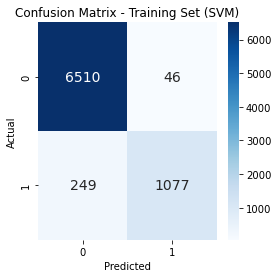

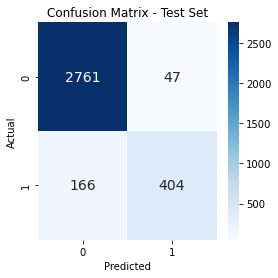

In [443]:
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for training set
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14})
plt.title("Confusion Matrix - Training Set (SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot confusion matrix for test set
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14})
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

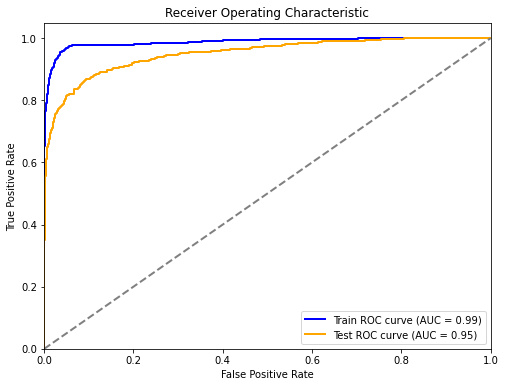

Train AUC Score: 0.9875263077493635
Test AUC Score: 0.9499700104963262


In [444]:
# Predicted probabilities on the training set
y_train_prob = best_svm_model.decision_function(X_train)

# Predicted probabilities on the test set
y_test_prob = best_svm_model.decision_function(X_test)

# Calculate ROC curve and AUC score for training set
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate ROC curve and AUC score for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='Train ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label='Test ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print AUC scores
print("Train AUC Score:", roc_auc_train)
print("Test AUC Score:", roc_auc_test)

# Support Vector Machines (SVM) - SMOTE

In [445]:
# Apply SMOTE to balance the training set
smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Instantiate the SVM model
svm_model = SVC()

# Train the SVM model on the resampled training set
svm_model.fit(X_train_resampled, y_train_resampled)


SVC()

In [446]:
# Predicted labels on the training set
y_train_pred = svm_model.predict(X_train_resampled)

# Predicted labels on the test set
y_test_pred = svm_model.predict(X_test)

In [447]:
print("Classification Report for Training Set:")
print(classification_report(y_train_resampled, y_train_pred))

# Generate classification report for the test set
print("Classification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

Classification Report for Training Set:
              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92      6556
         1.0       0.91      0.94      0.92      6556

    accuracy                           0.92     13112
   macro avg       0.92      0.92      0.92     13112
weighted avg       0.92      0.92      0.92     13112

Classification Report for Test Set:
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93      2808
         1.0       0.62      0.83      0.71       570

    accuracy                           0.88      3378
   macro avg       0.79      0.86      0.82      3378
weighted avg       0.90      0.88      0.89      3378



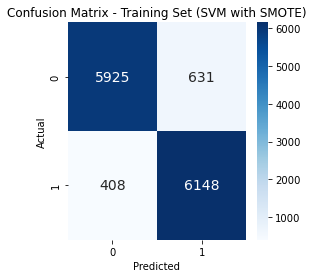

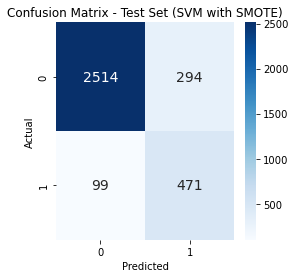

In [448]:
conf_matrix_train = confusion_matrix(y_train_resampled, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for training set
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14})
plt.title("Confusion Matrix - Training Set (SVM with SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot confusion matrix for test set
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14})
plt.title("Confusion Matrix - Test Set (SVM with SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

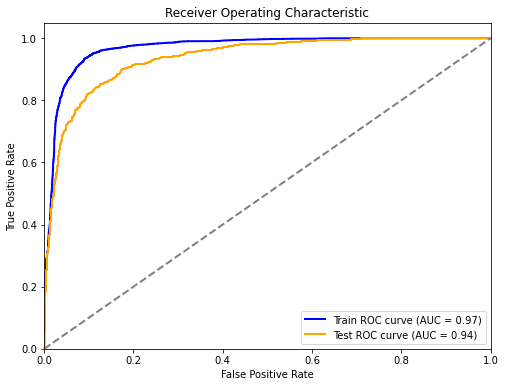

Train AUC Score: 0.9687658790591296
Test AUC Score: 0.9357549857549857


In [449]:
# Predicted probabilities on the training set
y_train_prob = svm_model.decision_function(X_train_resampled)

# Predicted probabilities on the test set
y_test_prob = svm_model.decision_function(X_test)

# Calculate ROC curve and AUC score for training set
fpr_train, tpr_train, _ = roc_curve(y_train_resampled, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate ROC curve and AUC score for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='Train ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label='Test ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print AUC scores
print("Train AUC Score:", roc_auc_train)
print("Test AUC Score:", roc_auc_test)

In [450]:
# Bagging Model with SMOTE - Train Data
bagging_smote_train_data = {
    'Model': ['Bagging with SMOTE'],
    'Precision': [0.99],
    'Recall': [0.99],
    'F1-score': [0.99],
    'Accuracy': [1.00],
    'AUC Score': [0.99]
}
df_bagging_smote_train = pd.DataFrame(bagging_smote_train_data)

# Bagging Model with SMOTE - Test Data
bagging_smote_test_data = {
    'Model': ['Bagging with SMOTE'],
    'Precision': [0.84],
    'Recall': [0.81],
    'F1-score': [0.82],
    'Accuracy': [0.94],
    'AUC Score': [0.89]
}
df_bagging_smote_test = pd.DataFrame(bagging_smote_test_data)

# KNN Model with Hyper Tuning - Train Data
knn_hyper_train_data = {
    'Model': ['KNN with Hyper Tuning'],
    'Precision': [1.00],
    'Recall': [1.00],
    'F1-score': [1.00],
    'Accuracy': [1.00],
    'AUC Score': [1.00]
}
df_knn_hyper_train = pd.DataFrame(knn_hyper_train_data)

# KNN Model with Hyper Tuning - Test Data
knn_hyper_test_data = {
    'Model': ['KNN with Hyper Tuning'],
    'Precision': [0.92],
    'Recall': [0.82],
    'F1-score': [0.87],
    'Accuracy': [0.96],
    'AUC Score': [0.96]
}
df_knn_hyper_test = pd.DataFrame(knn_hyper_test_data)

# Random Forest Model with SMOTE - Train Data
random_forest_smote_train_data = {
    'Model': ['Random Forest with SMOTE'],
    'Precision': [1.00],
    'Recall': [1.00],
    'F1-score': [1.00],
    'Accuracy': [1.00],
    'AUC Score': [1.00]
}
df_random_forest_smote_train = pd.DataFrame(random_forest_smote_train_data)

# Random Forest Model with SMOTE - Test Data
random_forest_smote_test_data = {
    'Model': ['Random Forest with SMOTE'],
    'Precision': [0.90],
    'Recall': [0.85],
    'F1-score': [0.88],
    'Accuracy': [0.96],
    'AUC Score': [1.00]
}
df_random_forest_smote_test = pd.DataFrame(random_forest_smote_test_data)

# Concatenate the dataframes
df_train = pd.concat([df_bagging_smote_train, df_knn_hyper_train, df_random_forest_smote_train], ignore_index=True)
df_test = pd.concat([df_bagging_smote_test, df_knn_hyper_test, df_random_forest_smote_test], ignore_index=True)

# Display the dataframes
print("Train Data Metrics:")
print(df_train)
print("\nTest Data Metrics:")
print(df_test)


Train Data Metrics:
                      Model  Precision  Recall  F1-score  Accuracy  AUC Score
0        Bagging with SMOTE       0.99    0.99      0.99       1.0       0.99
1     KNN with Hyper Tuning       1.00    1.00      1.00       1.0       1.00
2  Random Forest with SMOTE       1.00    1.00      1.00       1.0       1.00

Test Data Metrics:
                      Model  Precision  Recall  F1-score  Accuracy  AUC Score
0        Bagging with SMOTE       0.84    0.81      0.82      0.94       0.89
1     KNN with Hyper Tuning       0.92    0.82      0.87      0.96       0.96
2  Random Forest with SMOTE       0.90    0.85      0.88      0.96       1.00
